In [505]:
# Import required packages for this project.
from pathlib import Path

import math
import statistics

import os
import calendar
import numpy as np
import networkx as nx
import pandas as pd
from pandas.plotting import scatter_matrix, parallel_coordinates

import seaborn as sns

from sklearn import preprocessing

import scipy.stats
from scipy.stats import anderson
from scipy.stats import ttest_ind


import matplotlib.pyplot as plt
import matplotlib as mpl
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.graphics.gofplots import qqplot

%matplotlib inline


In [506]:
# Established path to access data for this project.
DATA = Path("C:\\Users\\rcc_0\\OneDrive\\Documents\\ANA 620\\Assignment_2")

In [507]:
# Load the required data for this assignemt.
BGA_df = pd.read_csv(DATA / 'HW2_BGALL.csv')

# View some initial records.
BGA_df.head()

Sex   WT2   HT2   WT9    HT9   LG9  ST9   WT18   HT18  LG18  ST18  Soma
0    0  13.6  90.2  41.5  139.4  31.6   74  110.2  179.0  44.1   226   7.0
1    0  12.7  91.4  31.0  144.3  26.0   73   79.4  195.1  36.1   252   4.0
2    0  12.6  86.4  30.1  136.5  26.6   64   76.3  183.7  36.9   216   6.0
3    0  14.8  87.6  34.1  135.4  28.2   75   74.5  178.7  37.3   220   2.0
4    0  12.7  86.7  24.5  128.9  24.2   63   55.7  171.5  31.0   200   1.5

In [508]:
# Generate dataframe dimensions.
BGA_df.shape

(136, 12)

In [509]:
# Generate variable data types.
BGA_df.dtypes

Sex       int64
WT2     float64
HT2     float64
WT9     float64
HT9     float64
LG9     float64
ST9       int64
WT18    float64
HT18    float64
LG18    float64
ST18      int64
Soma    float64
dtype: object

In [510]:
# Generate number of missing values.
BGA_df.isna().sum()

Sex     0
WT2     0
HT2     0
WT9     0
HT9     0
LG9     0
ST9     0
WT18    0
HT18    0
LG18    0
ST18    0
Soma    0
dtype: int64

Specific Evaluation and Preparation of Dataset Variables

In [511]:
# Evaluate the 'Sex' binary variable.
BGA_df['Sex'].value_counts()

Sex
1    70
0    66
Name: count, dtype: int64

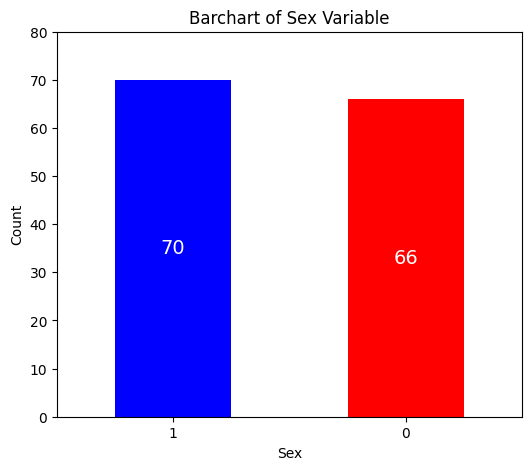

In [512]:
# Barchart for the 'Sex' binary variable (0 = male, 1 = female).
dfg = BGA_df['Sex'].value_counts()
ax = dfg.plot(kind='bar', title='Barchart of Sex Variable', ylabel='Count', xlabel='Sex', color= ['b','r'], rot=0, figsize=(6,5))
ax.bar_label(ax.containers[0], label_type='center', color='w', fontsize=14)
plt.yticks(np.arange(0,81,step=10)) 
plt.show()

In [513]:
BGA_df.describe().map('{:,.3f}'.format)

Sex      WT2      HT2      WT9      HT9      LG9      ST9     WT18  \
count  136.000  136.000  136.000  136.000  136.000  136.000  136.000  136.000   
mean     0.515   13.209   87.796   31.626  135.493   27.675   64.566   64.871   
std      0.502    1.607    3.360    5.969    5.496    2.461   15.448   10.674   
min      0.000   10.100   80.900   19.900  121.400   21.800   22.000   42.900   
25%      0.000   12.200   85.975   27.875  132.500   26.300   57.000   56.875   
50%      1.000   13.200   87.700   30.900  135.700   27.300   64.000   65.100   
75%      1.000   14.100   89.700   34.125  139.400   28.650   73.000   70.850   
max      1.000   18.600   98.200   66.800  152.500   40.400  121.000  110.200   

          HT18     LG18     ST18     Soma  
count  136.000  136.000  136.000  136.000  
mean   172.579   35.840  167.132    3.960  
std      8.844    2.567   49.719    1.435  
min    153.600   30.000   77.000    1.000  
25%    166.150   34.175  124.000    3.000  
50%    172.500   35.750  150.500    4.000  
75%    179.225   37.225  214.000    5.000  
max    195.100   44.100  260.000    7.000

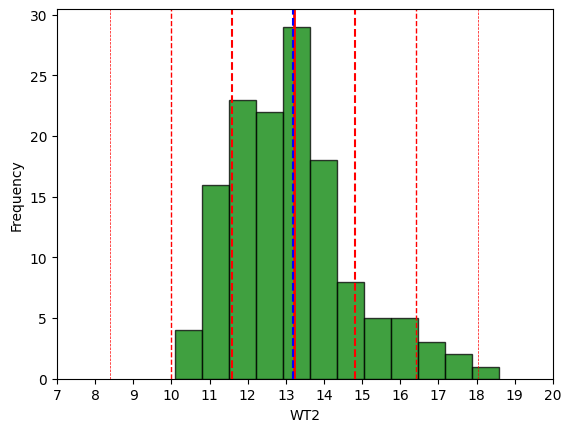

In [514]:
# Histogram for the 'WT2' numerical variable.
plt.hist(BGA_df['WT2'], bins = 12, alpha = 0.75, color = 'green', edgecolor = 'black')
plt.xlabel('WT2')
plt.ylabel('Frequency')
plt.xticks(np.arange(7,21,step=1))
plt.yticks(np.arange(0,31,step=5))

mean_value = BGA_df['WT2'].mean()
median_value = BGA_df['WT2'].median()
std_value = BGA_df['WT2'].std()

plt.axvline(mean_value, color='red', linewidth=2, label=f'Mean: {mean_value: .2f}')
plt.axvline(median_value, color='blue', linestyle='dashed', linewidth=1.5, label=f'Median: {median_value: .2f}')
plt.axvline(mean_value+std_value, color='red', linestyle='dashed', linewidth=1.5, label=f'1 SD')
plt.axvline(mean_value-std_value, color='red', linestyle='dashed', linewidth=1.5)
plt.axvline(mean_value+2*std_value, color='red', linestyle='dashed', linewidth=1, label=f'2 SD')
plt.axvline(mean_value-2*std_value, color='red', linestyle='dashed', linewidth=1)
plt.axvline(mean_value+3*std_value, color='red', linestyle='dashed', linewidth=0.5, label=f'3 SD')
plt.axvline(mean_value-3*std_value, color='red', linestyle='dashed', linewidth=0.5)

plt.show()

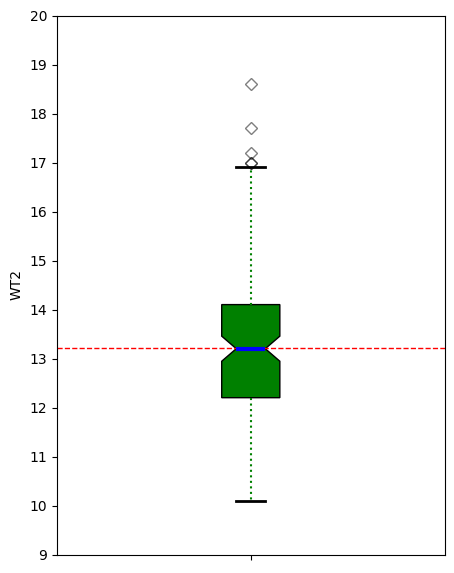

In [515]:
# Boxplot for the 'WT2' numeric variable.
fig = plt.figure(figsize =(5, 7))
ax = fig.add_subplot(111)

# Creating axes instance
bp = ax.boxplot(BGA_df['WT2'], patch_artist = True,
                notch ='True')

for patch, color in zip(bp['boxes'], 'green'):
    patch.set_facecolor('green')

# Changing color and linewidth of whiskers.
for whisker in bp['whiskers']:
    whisker.set(color ='green',
                linewidth = 1.5,
                linestyle =":")

# Changing color and linewidth of caps.
for cap in bp['caps']:
    cap.set(color ='black',
            linewidth = 2)

# Changing color and linewidth of median.
for median in bp['medians']:
    median.set(color ='blue',
               linewidth = 3)
    
# Changing style of fliers.
for flier in bp['fliers']:
    flier.set(marker ='D',
              alpha = 0.5)
    
# Set axis labels.
ax.set_ylabel('WT2')  
ax.set_xticklabels('')

# Set axis limits.
plt.yticks(np.arange(9,21,step=1)) 

# Display the mean.
plt.axhline(mean_value, color='red', linewidth=1, linestyle='dashed', label=f'Mean: {mean_value: .2f}')

plt.show()

In [516]:
# 'WT2' Anderson-Darling Normality Test
result = anderson(BGA_df['WT2'])
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < result.critical_values[i]:
		print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
	else:
		print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 1.215
15.000: 0.560, data does not look normal (reject H0)
10.000: 0.638, data does not look normal (reject H0)
5.000: 0.766, data does not look normal (reject H0)
2.500: 0.893, data does not look normal (reject H0)
1.000: 1.062, data does not look normal (reject H0)


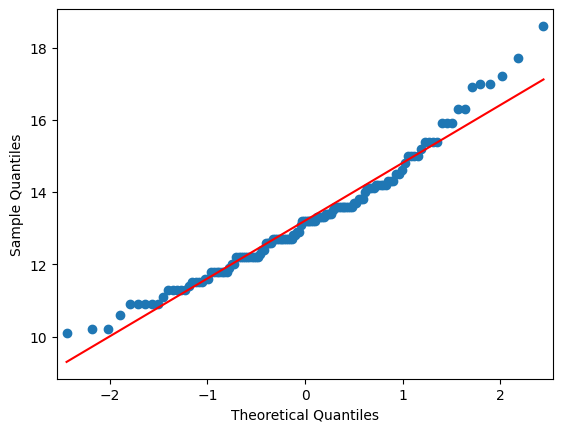

In [517]:
# 'WT2' QQ plot
qqplot(BGA_df['WT2'], line='s')
plt.show()

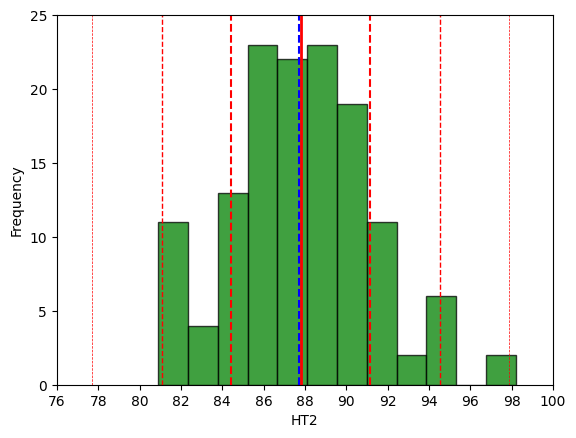

In [518]:
# Histogram for the 'HT2' numerical variable.
plt.hist(BGA_df['HT2'], bins = 12, alpha = 0.75, color = 'green', edgecolor = 'black')
plt.xlabel('HT2')
plt.ylabel('Frequency')
plt.xticks(np.arange(76,101,step=2))
plt.yticks(np.arange(0,26,step=5))

mean_value = BGA_df['HT2'].mean()
median_value = BGA_df['HT2'].median()
std_value = BGA_df['HT2'].std()

plt.axvline(mean_value, color='red', linewidth=2, label=f'Mean: {mean_value: .2f}')
plt.axvline(median_value, color='blue', linestyle='dashed', linewidth=1.5, label=f'Median: {median_value: .2f}')
plt.axvline(mean_value+std_value, color='red', linestyle='dashed', linewidth=1.5, label=f'1 SD')
plt.axvline(mean_value-std_value, color='red', linestyle='dashed', linewidth=1.5)
plt.axvline(mean_value+2*std_value, color='red', linestyle='dashed', linewidth=1, label=f'2 SD')
plt.axvline(mean_value-2*std_value, color='red', linestyle='dashed', linewidth=1)
plt.axvline(mean_value+3*std_value, color='red', linestyle='dashed', linewidth=0.5, label=f'3 SD')
plt.axvline(mean_value-3*std_value, color='red', linestyle='dashed', linewidth=0.5)

plt.show()

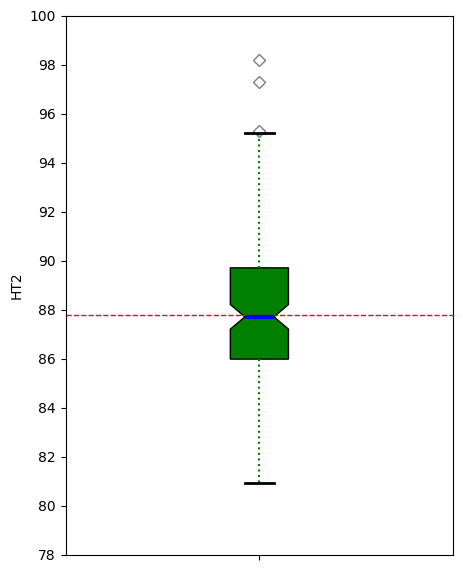

In [519]:
# Boxplot for the 'HT2' numeric variable.
fig = plt.figure(figsize =(5, 7))
ax = fig.add_subplot(111)

# Creating axes instance
bp = ax.boxplot(BGA_df['HT2'], patch_artist = True,
                notch ='True')

for patch, color in zip(bp['boxes'], 'green'):
    patch.set_facecolor('green')

# Changing color and linewidth of whiskers.
for whisker in bp['whiskers']:
    whisker.set(color ='green',
                linewidth = 1.5,
                linestyle =":")

# Changing color and linewidth of caps.
for cap in bp['caps']:
    cap.set(color ='black',
            linewidth = 2)

# Changing color and linewidth of median.
for median in bp['medians']:
    median.set(color ='blue',
               linewidth = 3)
    
# Changing style of fliers.
for flier in bp['fliers']:
    flier.set(marker ='D',
              alpha = 0.5)
    
# Set axis labels.
ax.set_ylabel('HT2')  
ax.set_xticklabels('')

# Set axis limits.
plt.yticks(np.arange(78,101,step=2)) 

# Display the mean.
plt.axhline(mean_value, color='red', linewidth=1, linestyle='dashed', label=f'Mean: {mean_value: .2f}')

plt.show()

In [520]:
# 'HT2' Anderson-Darling Normality Test
result = anderson(BGA_df['HT2'])
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < result.critical_values[i]:
		print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
	else:
		print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 0.524
15.000: 0.560, data looks normal (fail to reject H0)
10.000: 0.638, data looks normal (fail to reject H0)
5.000: 0.766, data looks normal (fail to reject H0)
2.500: 0.893, data looks normal (fail to reject H0)
1.000: 1.062, data looks normal (fail to reject H0)


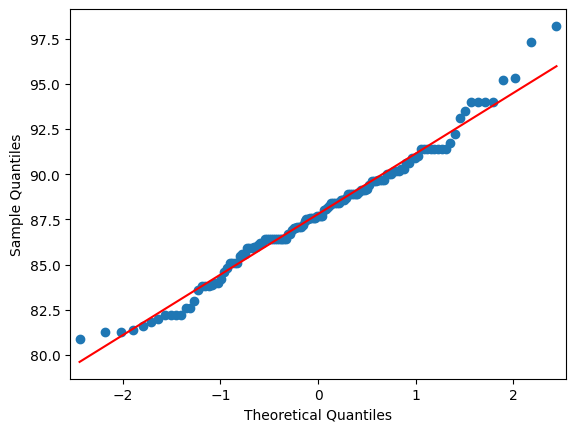

In [521]:
# 'HT2' QQ plot
qqplot(BGA_df['HT2'], line='s')
plt.show()

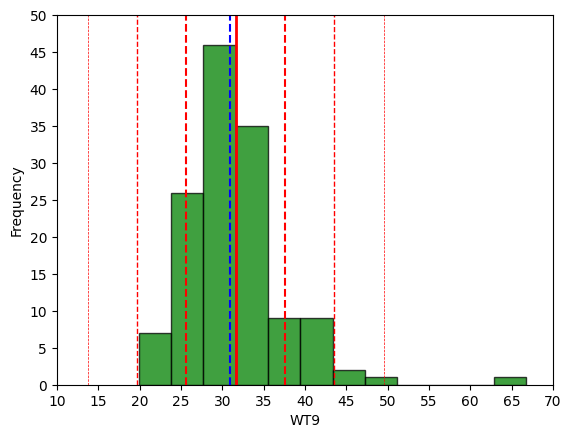

In [522]:
# Histogram for the 'WT9' numerical variable.
plt.hist(BGA_df['WT9'], bins = 12, alpha = 0.75, color = 'green', edgecolor = 'black')
plt.xlabel('WT9')
plt.ylabel('Frequency')
plt.xticks(np.arange(10,71,step=5))
plt.yticks(np.arange(0,51,step=5))

mean_value = BGA_df['WT9'].mean()
median_value = BGA_df['WT9'].median()
std_value = BGA_df['WT9'].std()

plt.axvline(mean_value, color='red', linewidth=2, label=f'Mean: {mean_value: .2f}')
plt.axvline(median_value, color='blue', linestyle='dashed', linewidth=1.5, label=f'Median: {median_value: .2f}')
plt.axvline(mean_value+std_value, color='red', linestyle='dashed', linewidth=1.5, label=f'1 SD')
plt.axvline(mean_value-std_value, color='red', linestyle='dashed', linewidth=1.5)
plt.axvline(mean_value+2*std_value, color='red', linestyle='dashed', linewidth=1, label=f'2 SD')
plt.axvline(mean_value-2*std_value, color='red', linestyle='dashed', linewidth=1)
plt.axvline(mean_value+3*std_value, color='red', linestyle='dashed', linewidth=0.5, label=f'3 SD')
plt.axvline(mean_value-3*std_value, color='red', linestyle='dashed', linewidth=0.5)

plt.show()

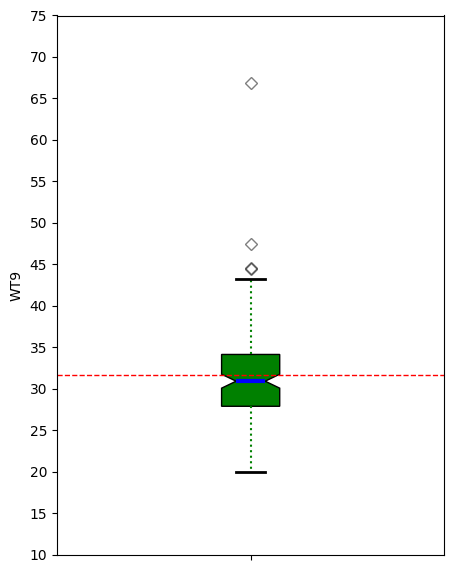

In [523]:
# Boxplot for the 'WT9' numeric variable.
fig = plt.figure(figsize =(5, 7))
ax = fig.add_subplot(111)

# Creating axes instance
bp = ax.boxplot(BGA_df['WT9'], patch_artist = True,
                notch ='True')

for patch, color in zip(bp['boxes'], 'green'):
    patch.set_facecolor('green')

# Changing color and linewidth of whiskers.
for whisker in bp['whiskers']:
    whisker.set(color ='green',
                linewidth = 1.5,
                linestyle =":")

# Changing color and linewidth of caps.
for cap in bp['caps']:
    cap.set(color ='black',
            linewidth = 2)

# Changing color and linewidth of median.
for median in bp['medians']:
    median.set(color ='blue',
               linewidth = 3)
    
# Changing style of fliers.
for flier in bp['fliers']:
    flier.set(marker ='D',
              alpha = 0.5)
    
# Set axis labels.
ax.set_ylabel('WT9')  
ax.set_xticklabels('')

# Set axis limits.
plt.yticks(np.arange(10,76,step=5)) 

# Display the mean.
plt.axhline(mean_value, color='red', linewidth=1, linestyle='dashed', label=f'Mean: {mean_value: .2f}')

plt.show()

In [524]:
# 'WT9' Anderson-Darling Normality Test
result = anderson(BGA_df['WT9'])
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < result.critical_values[i]:
		print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
	else:
		print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 2.678
15.000: 0.560, data does not look normal (reject H0)
10.000: 0.638, data does not look normal (reject H0)
5.000: 0.766, data does not look normal (reject H0)
2.500: 0.893, data does not look normal (reject H0)
1.000: 1.062, data does not look normal (reject H0)


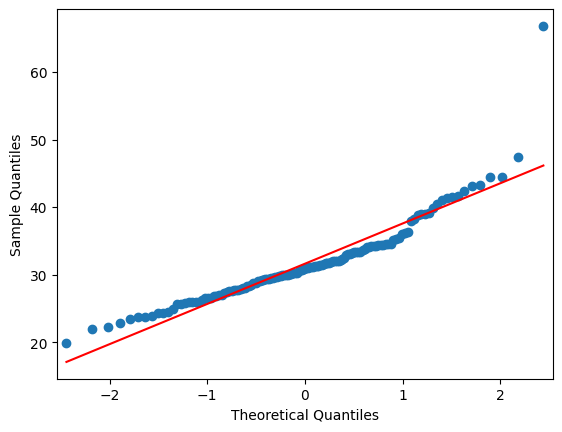

In [525]:
# 'WT9' QQ plot
qqplot(BGA_df['WT9'], line='s')
plt.show()

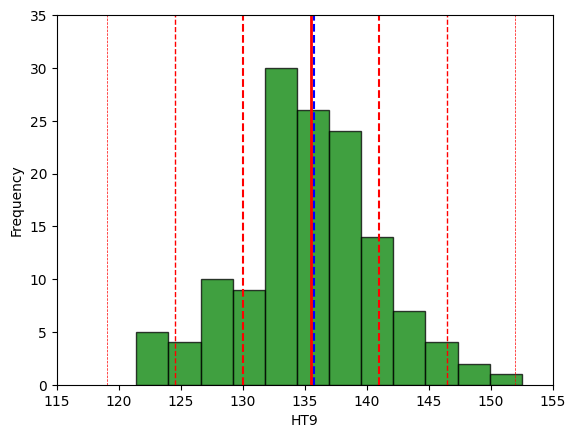

In [526]:
# Histogram for the 'HT9' numerical variable.
plt.hist(BGA_df['HT9'], bins = 12, alpha = 0.75, color = 'green', edgecolor = 'black')
plt.xlabel('HT9')
plt.ylabel('Frequency')
plt.xticks(np.arange(115,156,step=5))
plt.yticks(np.arange(0,36,step=5))

mean_value = BGA_df['HT9'].mean()
median_value = BGA_df['HT9'].median()
std_value = BGA_df['HT9'].std()

plt.axvline(mean_value, color='red', linewidth=2, label=f'Mean: {mean_value: .2f}')
plt.axvline(median_value, color='blue', linestyle='dashed', linewidth=1.5, label=f'Median: {median_value: .2f}')
plt.axvline(mean_value+std_value, color='red', linestyle='dashed', linewidth=1.5, label=f'1 SD')
plt.axvline(mean_value-std_value, color='red', linestyle='dashed', linewidth=1.5)
plt.axvline(mean_value+2*std_value, color='red', linestyle='dashed', linewidth=1, label=f'2 SD')
plt.axvline(mean_value-2*std_value, color='red', linestyle='dashed', linewidth=1)
plt.axvline(mean_value+3*std_value, color='red', linestyle='dashed', linewidth=0.5, label=f'3 SD')
plt.axvline(mean_value-3*std_value, color='red', linestyle='dashed', linewidth=0.5)

plt.show()

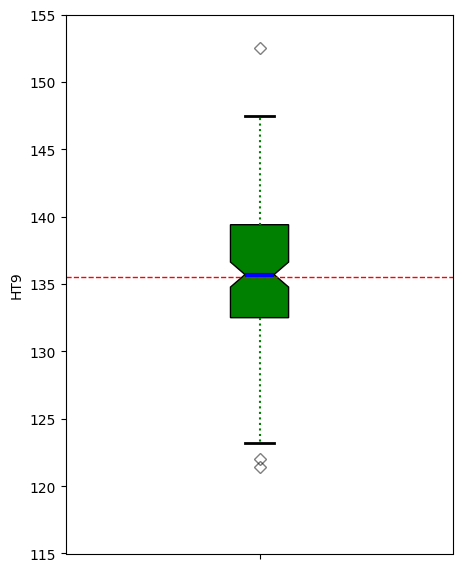

In [527]:
# Boxplot for the 'HT9' numeric variable.
fig = plt.figure(figsize =(5, 7))
ax = fig.add_subplot(111)

# Creating axes instance
bp = ax.boxplot(BGA_df['HT9'], patch_artist = True,
                notch ='True')

for patch, color in zip(bp['boxes'], 'green'):
    patch.set_facecolor('green')

# Changing color and linewidth of whiskers.
for whisker in bp['whiskers']:
    whisker.set(color ='green',
                linewidth = 1.5,
                linestyle =":")

# Changing color and linewidth of caps.
for cap in bp['caps']:
    cap.set(color ='black',
            linewidth = 2)

# Changing color and linewidth of median.
for median in bp['medians']:
    median.set(color ='blue',
               linewidth = 3)
    
# Changing style of fliers.
for flier in bp['fliers']:
    flier.set(marker ='D',
              alpha = 0.5)
    
# Set axis labels.
ax.set_ylabel('HT9')  
ax.set_xticklabels('')

# Set axis limits.
plt.yticks(np.arange(115,156,step=5)) 

# Display the mean.
plt.axhline(mean_value, color='red', linewidth=1, linestyle='dashed', label=f'Mean: {mean_value: .2f}')

plt.show()

In [528]:
# 'HT9' Anderson-Darling Normality Test
result = anderson(BGA_df['HT9'])
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < result.critical_values[i]:
		print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
	else:
		print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 0.416
15.000: 0.560, data looks normal (fail to reject H0)
10.000: 0.638, data looks normal (fail to reject H0)
5.000: 0.766, data looks normal (fail to reject H0)
2.500: 0.893, data looks normal (fail to reject H0)
1.000: 1.062, data looks normal (fail to reject H0)


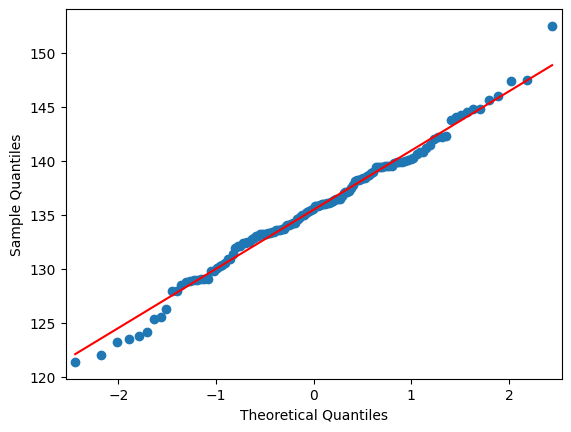

In [529]:
# 'HT9' QQ plot
qqplot(BGA_df['HT9'], line='s')
plt.show()

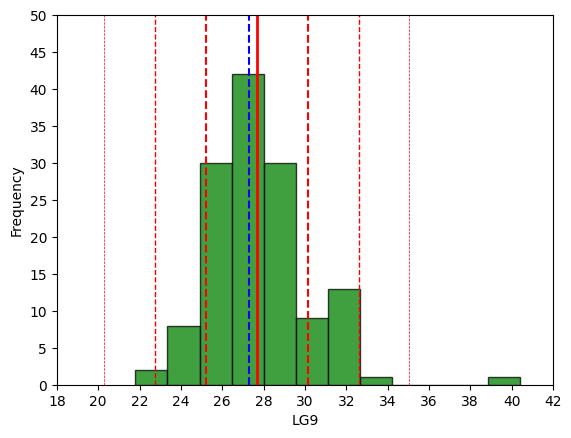

In [530]:
# Histogram for the 'LG9' numerical variable.
plt.hist(BGA_df['LG9'], bins = 12, alpha = 0.75, color = 'green', edgecolor = 'black')
plt.xlabel('LG9')
plt.ylabel('Frequency')
plt.xticks(np.arange(18,44,step=2))
plt.yticks(np.arange(0,51,step=5))

mean_value = BGA_df['LG9'].mean()
median_value = BGA_df['LG9'].median()
std_value = BGA_df['LG9'].std()

plt.axvline(mean_value, color='red', linewidth=2, label=f'Mean: {mean_value: .2f}')
plt.axvline(median_value, color='blue', linestyle='dashed', linewidth=1.5, label=f'Median: {median_value: .2f}')
plt.axvline(mean_value+std_value, color='red', linestyle='dashed', linewidth=1.5, label=f'1 SD')
plt.axvline(mean_value-std_value, color='red', linestyle='dashed', linewidth=1.5)
plt.axvline(mean_value+2*std_value, color='red', linestyle='dashed', linewidth=1, label=f'2 SD')
plt.axvline(mean_value-2*std_value, color='red', linestyle='dashed', linewidth=1)
plt.axvline(mean_value+3*std_value, color='red', linestyle='dashed', linewidth=0.5, label=f'3 SD')
plt.axvline(mean_value-3*std_value, color='red', linestyle='dashed', linewidth=0.5)

plt.show()

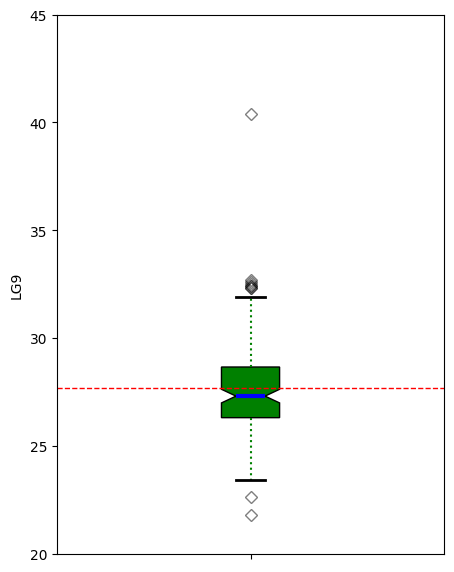

In [531]:
# Boxplot for the 'LG9' numeric variable.
fig = plt.figure(figsize =(5, 7))
ax = fig.add_subplot(111)

# Creating axes instance
bp = ax.boxplot(BGA_df['LG9'], patch_artist = True,
                notch ='True')

for patch, color in zip(bp['boxes'], 'green'):
    patch.set_facecolor('green')

# Changing color and linewidth of whiskers.
for whisker in bp['whiskers']:
    whisker.set(color ='green',
                linewidth = 1.5,
                linestyle =":")

# Changing color and linewidth of caps.
for cap in bp['caps']:
    cap.set(color ='black',
            linewidth = 2)

# Changing color and linewidth of median.
for median in bp['medians']:
    median.set(color ='blue',
               linewidth = 3)
    
# Changing style of fliers.
for flier in bp['fliers']:
    flier.set(marker ='D',
              alpha = 0.5)
    
# Set axis labels.
ax.set_ylabel('LG9')  
ax.set_xticklabels('')

# Set axis limits.
plt.yticks(np.arange(20,46,step=5)) 

# Display the mean.
plt.axhline(mean_value, color='red', linewidth=1, linestyle='dashed', label=f'Mean: {mean_value: .2f}')

plt.show()

In [532]:
# 'LG9' Anderson-Darling Normality Test
result = anderson(BGA_df['LG9'])
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < result.critical_values[i]:
		print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
	else:
		print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 2.027
15.000: 0.560, data does not look normal (reject H0)
10.000: 0.638, data does not look normal (reject H0)
5.000: 0.766, data does not look normal (reject H0)
2.500: 0.893, data does not look normal (reject H0)
1.000: 1.062, data does not look normal (reject H0)


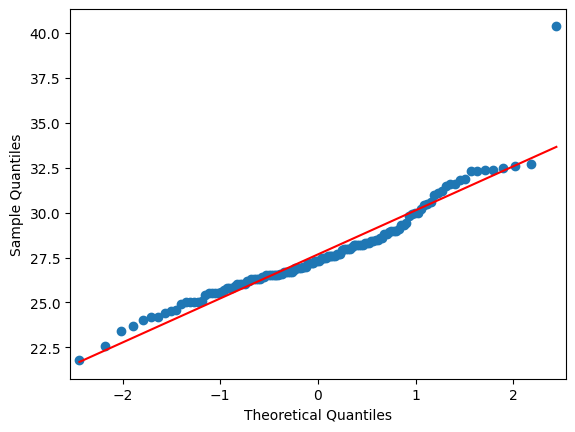

In [533]:
# 'LG9' QQ plot
qqplot(BGA_df['LG9'], line='s')
plt.show()

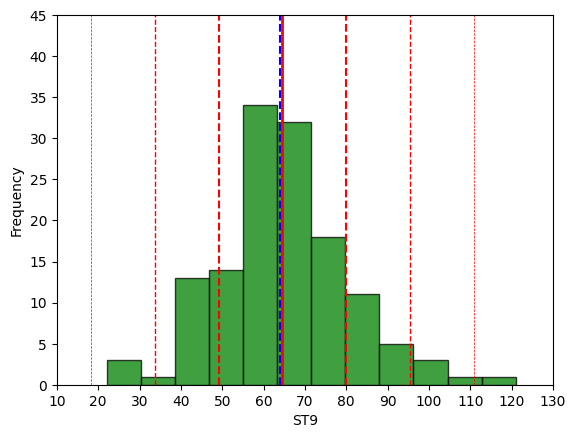

In [534]:
# Histogram for the 'ST9' numerical variable.
plt.hist(BGA_df['ST9'], bins = 12, alpha = 0.75, color = 'green', edgecolor = 'black')
plt.xlabel('ST9')
plt.ylabel('Frequency')
plt.xticks(np.arange(10,131,step=10))
plt.yticks(np.arange(0,46,step=5))

mean_value = BGA_df['ST9'].mean()
median_value = BGA_df['ST9'].median()
std_value = BGA_df['ST9'].std()

plt.axvline(mean_value, color='red', linewidth=2, label=f'Mean: {mean_value: .2f}')
plt.axvline(median_value, color='blue', linestyle='dashed', linewidth=1.5, label=f'Median: {median_value: .2f}')
plt.axvline(mean_value+std_value, color='red', linestyle='dashed', linewidth=1.5, label=f'1 SD')
plt.axvline(mean_value-std_value, color='red', linestyle='dashed', linewidth=1.5)
plt.axvline(mean_value+2*std_value, color='red', linestyle='dashed', linewidth=1, label=f'2 SD')
plt.axvline(mean_value-2*std_value, color='red', linestyle='dashed', linewidth=1)
plt.axvline(mean_value+3*std_value, color='red', linestyle='dashed', linewidth=0.5, label=f'3 SD')
plt.axvline(mean_value-3*std_value, color='red', linestyle='dashed', linewidth=0.5)

plt.show()

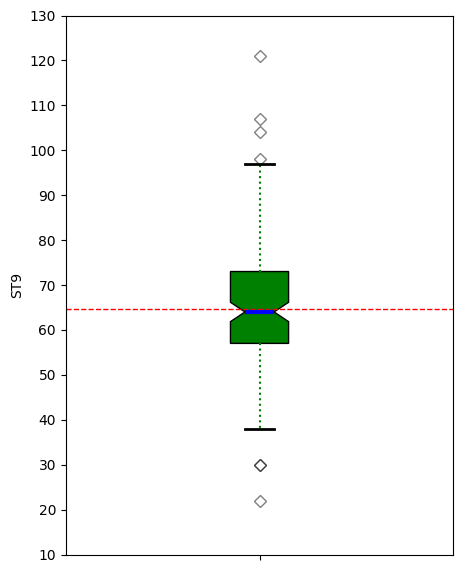

In [535]:
# Boxplot for the 'ST9' numeric variable.
fig = plt.figure(figsize =(5, 7))
ax = fig.add_subplot(111)

# Creating axes instance
bp = ax.boxplot(BGA_df['ST9'], patch_artist = True,
                notch ='True')

for patch, color in zip(bp['boxes'], 'green'):
    patch.set_facecolor('green')

# Changing color and linewidth of whiskers.
for whisker in bp['whiskers']:
    whisker.set(color ='green',
                linewidth = 1.5,
                linestyle =":")

# Changing color and linewidth of caps.
for cap in bp['caps']:
    cap.set(color ='black',
            linewidth = 2)

# Changing color and linewidth of median.
for median in bp['medians']:
    median.set(color ='blue',
               linewidth = 3)
    
# Changing style of fliers.
for flier in bp['fliers']:
    flier.set(marker ='D',
              alpha = 0.5)
    
# Set axis labels.
ax.set_ylabel('ST9')  
ax.set_xticklabels('')

# Set axis limits.
plt.yticks(np.arange(10,131,step=10)) 

# Display the mean.
plt.axhline(mean_value, color='red', linewidth=1, linestyle='dashed', label=f'Mean: {mean_value: .2f}')

plt.show()

In [536]:
# 'ST9' Anderson-Darling Normality Test
result = anderson(BGA_df['ST9'])
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < result.critical_values[i]:
		print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
	else:
		print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 0.649
15.000: 0.560, data does not look normal (reject H0)
10.000: 0.638, data does not look normal (reject H0)
5.000: 0.766, data looks normal (fail to reject H0)
2.500: 0.893, data looks normal (fail to reject H0)
1.000: 1.062, data looks normal (fail to reject H0)


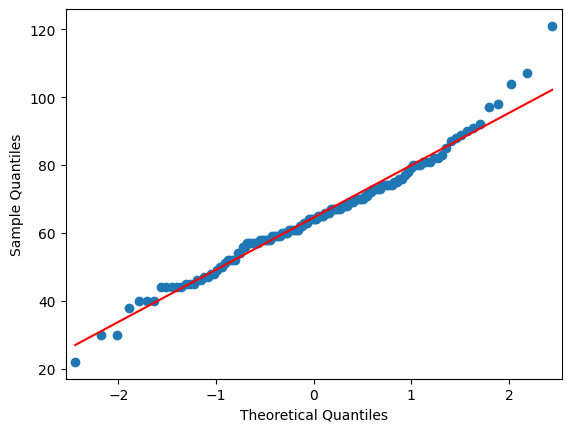

In [537]:
# 'ST9' QQ plot
qqplot(BGA_df['ST9'], line='s')
plt.show()

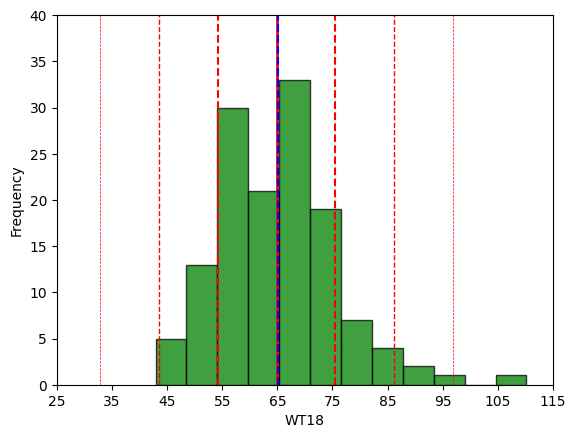

In [538]:
# Histogram for the 'WT18' numerical variable.
plt.hist(BGA_df['WT18'], bins = 12, alpha = 0.75, color = 'green', edgecolor = 'black')
plt.xlabel('WT18')
plt.ylabel('Frequency')
plt.xticks(np.arange(25,116,step=10))
plt.yticks(np.arange(0,41,step=5))

mean_value = BGA_df['WT18'].mean()
median_value = BGA_df['WT18'].median()
std_value = BGA_df['WT18'].std()

plt.axvline(mean_value, color='red', linewidth=2, label=f'Mean: {mean_value: .2f}')
plt.axvline(median_value, color='blue', linestyle='dashed', linewidth=1.5, label=f'Median: {median_value: .2f}')
plt.axvline(mean_value+std_value, color='red', linestyle='dashed', linewidth=1.5, label=f'1 SD')
plt.axvline(mean_value-std_value, color='red', linestyle='dashed', linewidth=1.5)
plt.axvline(mean_value+2*std_value, color='red', linestyle='dashed', linewidth=1, label=f'2 SD')
plt.axvline(mean_value-2*std_value, color='red', linestyle='dashed', linewidth=1)
plt.axvline(mean_value+3*std_value, color='red', linestyle='dashed', linewidth=0.5, label=f'3 SD')
plt.axvline(mean_value-3*std_value, color='red', linestyle='dashed', linewidth=0.5)

plt.show()

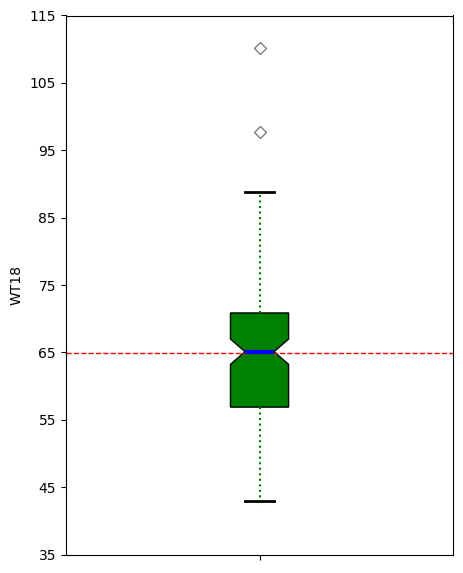

In [539]:
# Boxplot for the 'WT18' numeric variable.
fig = plt.figure(figsize =(5, 7))
ax = fig.add_subplot(111)

# Creating axes instance
bp = ax.boxplot(BGA_df['WT18'], patch_artist = True,
                notch ='True')

for patch, color in zip(bp['boxes'], 'green'):
    patch.set_facecolor('green')

# Changing color and linewidth of whiskers.
for whisker in bp['whiskers']:
    whisker.set(color ='green',
                linewidth = 1.5,
                linestyle =":")

# Changing color and linewidth of caps.
for cap in bp['caps']:
    cap.set(color ='black',
            linewidth = 2)

# Changing color and linewidth of median.
for median in bp['medians']:
    median.set(color ='blue',
               linewidth = 3)
    
# Changing style of fliers.
for flier in bp['fliers']:
    flier.set(marker ='D',
              alpha = 0.5)
    
# Set axis labels.
ax.set_ylabel('WT18')  
ax.set_xticklabels('')

# Set axis limits.
plt.yticks(np.arange(35,116,step=10)) 

# Display the mean.
plt.axhline(mean_value, color='red', linewidth=1, linestyle='dashed', label=f'Mean: {mean_value: .2f}')

plt.show()

In [540]:
# 'WT18' Anderson-Darling Normality Test
result = anderson(BGA_df['WT18'])
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < result.critical_values[i]:
		print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
	else:
		print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 0.741
15.000: 0.560, data does not look normal (reject H0)
10.000: 0.638, data does not look normal (reject H0)
5.000: 0.766, data looks normal (fail to reject H0)
2.500: 0.893, data looks normal (fail to reject H0)
1.000: 1.062, data looks normal (fail to reject H0)


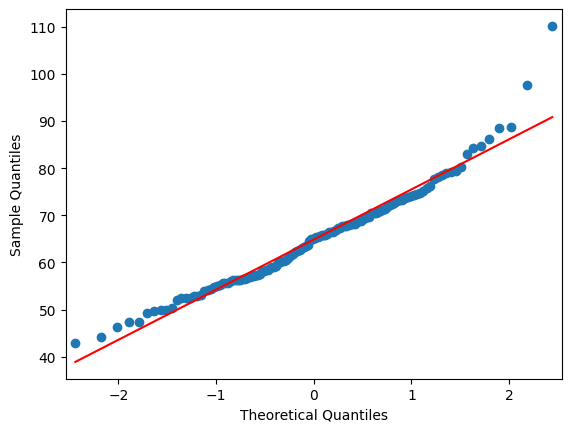

In [541]:
# 'WT18' QQ plot
qqplot(BGA_df['WT18'], line='s')
plt.show()

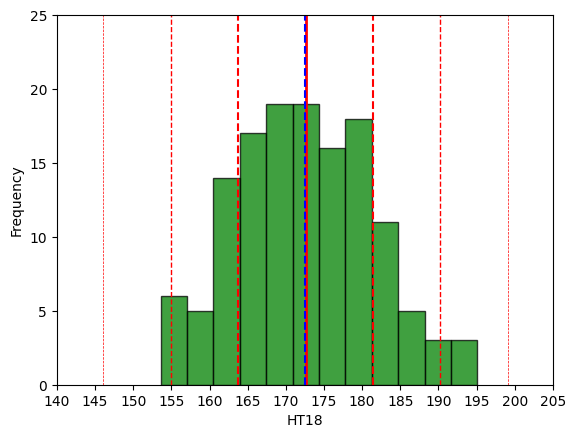

In [542]:
# Histogram for the 'HT18' numerical variable.
plt.hist(BGA_df['HT18'], bins = 12, alpha = 0.75, color = 'green', edgecolor = 'black')
plt.xlabel('HT18')
plt.ylabel('Frequency')
plt.xticks(np.arange(140,206,step=5))
plt.yticks(np.arange(0,26,step=5))

mean_value = BGA_df['HT18'].mean()
median_value = BGA_df['HT18'].median()
std_value = BGA_df['HT18'].std()

plt.axvline(mean_value, color='red', linewidth=2, label=f'Mean: {mean_value: .2f}')
plt.axvline(median_value, color='blue', linestyle='dashed', linewidth=1.5, label=f'Median: {median_value: .2f}')
plt.axvline(mean_value+std_value, color='red', linestyle='dashed', linewidth=1.5, label=f'1 SD')
plt.axvline(mean_value-std_value, color='red', linestyle='dashed', linewidth=1.5)
plt.axvline(mean_value+2*std_value, color='red', linestyle='dashed', linewidth=1, label=f'2 SD')
plt.axvline(mean_value-2*std_value, color='red', linestyle='dashed', linewidth=1)
plt.axvline(mean_value+3*std_value, color='red', linestyle='dashed', linewidth=0.5, label=f'3 SD')
plt.axvline(mean_value-3*std_value, color='red', linestyle='dashed', linewidth=0.5)

plt.show()

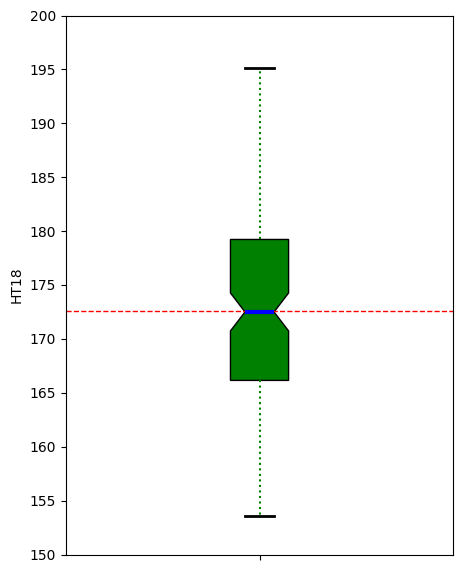

In [543]:
# Boxplot for the 'HT18' numeric variable.
fig = plt.figure(figsize =(5, 7))
ax = fig.add_subplot(111)

# Creating axes instance
bp = ax.boxplot(BGA_df['HT18'], patch_artist = True,
                notch ='True')

for patch, color in zip(bp['boxes'], 'green'):
    patch.set_facecolor('green')

# Changing color and linewidth of whiskers.
for whisker in bp['whiskers']:
    whisker.set(color ='green',
                linewidth = 1.5,
                linestyle =":")

# Changing color and linewidth of caps.
for cap in bp['caps']:
    cap.set(color ='black',
            linewidth = 2)

# Changing color and linewidth of median.
for median in bp['medians']:
    median.set(color ='blue',
               linewidth = 3)
    
# Changing style of fliers.
for flier in bp['fliers']:
    flier.set(marker ='D',
              alpha = 0.5)
    
# Set axis labels.
ax.set_ylabel('HT18')  
ax.set_xticklabels('')

# Set axis limits.
plt.yticks(np.arange(150,201,step=5)) 

# Display the mean.
plt.axhline(mean_value, color='red', linewidth=1, linestyle='dashed', label=f'Mean: {mean_value: .2f}')

plt.show()

In [544]:
# 'HT18' Anderson-Darling Normality Test
result = anderson(BGA_df['HT18'])
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < result.critical_values[i]:
		print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
	else:
		print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 0.271
15.000: 0.560, data looks normal (fail to reject H0)
10.000: 0.638, data looks normal (fail to reject H0)
5.000: 0.766, data looks normal (fail to reject H0)
2.500: 0.893, data looks normal (fail to reject H0)
1.000: 1.062, data looks normal (fail to reject H0)


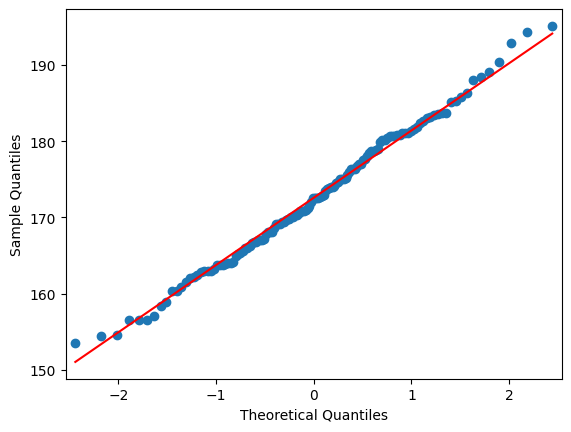

In [545]:
# 'HT18' QQ plot
qqplot(BGA_df['HT18'], line='s')
plt.show()

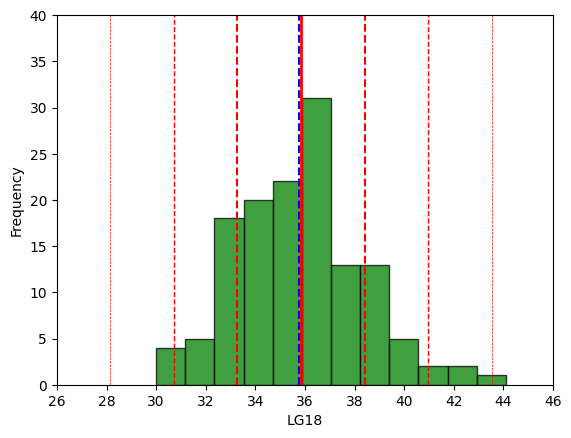

In [546]:
# Histogram for the 'LG18' numerical variable.
plt.hist(BGA_df['LG18'], bins = 12, alpha = 0.75, color = 'green', edgecolor = 'black')
plt.xlabel('LG18')
plt.ylabel('Frequency')
plt.xticks(np.arange(26,48,step=2))
plt.yticks(np.arange(0,41,step=5))

mean_value = BGA_df['LG18'].mean()
median_value = BGA_df['LG18'].median()
std_value = BGA_df['LG18'].std()

plt.axvline(mean_value, color='red', linewidth=2, label=f'Mean: {mean_value: .2f}')
plt.axvline(median_value, color='blue', linestyle='dashed', linewidth=1.5, label=f'Median: {median_value: .2f}')
plt.axvline(mean_value+std_value, color='red', linestyle='dashed', linewidth=1.5, label=f'1 SD')
plt.axvline(mean_value-std_value, color='red', linestyle='dashed', linewidth=1.5)
plt.axvline(mean_value+2*std_value, color='red', linestyle='dashed', linewidth=1, label=f'2 SD')
plt.axvline(mean_value-2*std_value, color='red', linestyle='dashed', linewidth=1)
plt.axvline(mean_value+3*std_value, color='red', linestyle='dashed', linewidth=0.5, label=f'3 SD')
plt.axvline(mean_value-3*std_value, color='red', linestyle='dashed', linewidth=0.5)

plt.show()

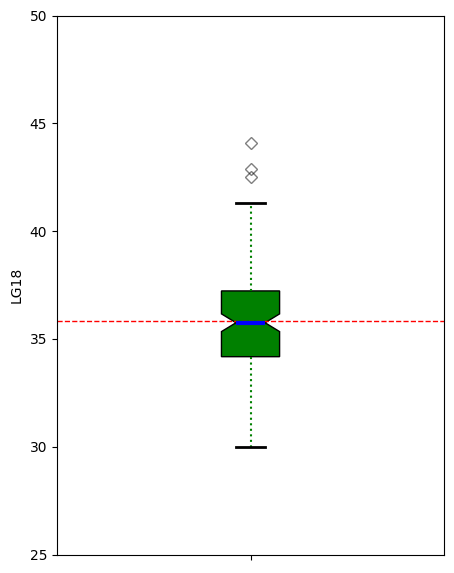

In [547]:
# Boxplot for the 'LG18' numeric variable.
fig = plt.figure(figsize =(5, 7))
ax = fig.add_subplot(111)

# Creating axes instance
bp = ax.boxplot(BGA_df['LG18'], patch_artist = True,
                notch ='True')

for patch, color in zip(bp['boxes'], 'green'):
    patch.set_facecolor('green')

# Changing color and linewidth of whiskers.
for whisker in bp['whiskers']:
    whisker.set(color ='green',
                linewidth = 1.5,
                linestyle =":")

# Changing color and linewidth of caps.
for cap in bp['caps']:
    cap.set(color ='black',
            linewidth = 2)

# Changing color and linewidth of median.
for median in bp['medians']:
    median.set(color ='blue',
               linewidth = 3)
    
# Changing style of fliers.
for flier in bp['fliers']:
    flier.set(marker ='D',
              alpha = 0.5)
    
# Set axis labels.
ax.set_ylabel('LG18')  
ax.set_xticklabels('')

# Set axis limits.
plt.yticks(np.arange(25,51,step=5)) 

# Display the mean.
plt.axhline(mean_value, color='red', linewidth=1, linestyle='dashed', label=f'Mean: {mean_value: .2f}')

plt.show()

In [548]:
# 'LG18' Anderson-Darling Normality Test
result = anderson(BGA_df['LG18'])
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < result.critical_values[i]:
		print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
	else:
		print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 0.338
15.000: 0.560, data looks normal (fail to reject H0)
10.000: 0.638, data looks normal (fail to reject H0)
5.000: 0.766, data looks normal (fail to reject H0)
2.500: 0.893, data looks normal (fail to reject H0)
1.000: 1.062, data looks normal (fail to reject H0)


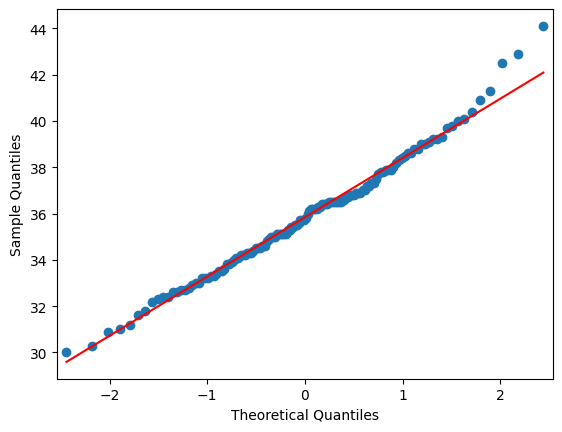

In [549]:
# 'LG18' QQ plot
qqplot(BGA_df['LG18'], line='s')
plt.show()

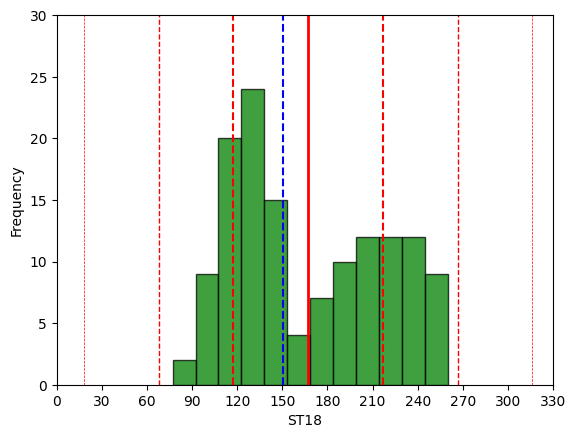

In [550]:
# Histogram for the 'ST18' numerical variable.
plt.hist(BGA_df['ST18'], bins = 12, alpha = 0.75, color = 'green', edgecolor = 'black')
plt.xlabel('ST18')
plt.ylabel('Frequency')
plt.xticks(np.arange(0,331,step=30))
plt.yticks(np.arange(0,31,step=5))

mean_value = BGA_df['ST18'].mean()
median_value = BGA_df['ST18'].median()
std_value = BGA_df['ST18'].std()

plt.axvline(mean_value, color='red', linewidth=2, label=f'Mean: {mean_value: .2f}')
plt.axvline(median_value, color='blue', linestyle='dashed', linewidth=1.5, label=f'Median: {median_value: .2f}')
plt.axvline(mean_value+std_value, color='red', linestyle='dashed', linewidth=1.5, label=f'1 SD')
plt.axvline(mean_value-std_value, color='red', linestyle='dashed', linewidth=1.5)
plt.axvline(mean_value+2*std_value, color='red', linestyle='dashed', linewidth=1, label=f'2 SD')
plt.axvline(mean_value-2*std_value, color='red', linestyle='dashed', linewidth=1)
plt.axvline(mean_value+3*std_value, color='red', linestyle='dashed', linewidth=0.5, label=f'3 SD')
plt.axvline(mean_value-3*std_value, color='red', linestyle='dashed', linewidth=0.5)

plt.show()

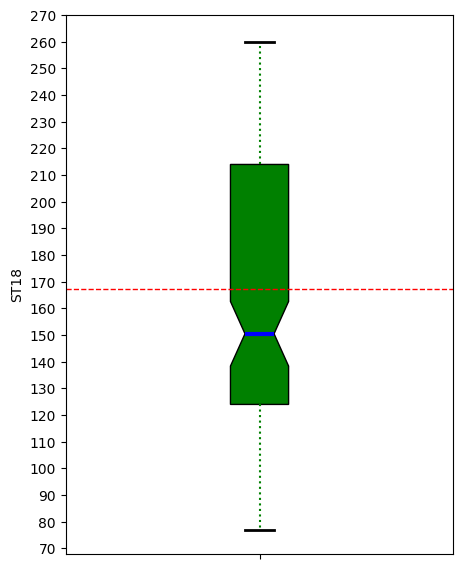

In [551]:
# Boxplot for the 'ST18' numeric variable.
fig = plt.figure(figsize =(5, 7))
ax = fig.add_subplot(111)

# Creating axes instance
bp = ax.boxplot(BGA_df['ST18'], patch_artist = True,
                notch ='True')

for patch, color in zip(bp['boxes'], 'green'):
    patch.set_facecolor('green')

# Changing color and linewidth of whiskers.
for whisker in bp['whiskers']:
    whisker.set(color ='green',
                linewidth = 1.5,
                linestyle =":")

# Changing color and linewidth of caps.
for cap in bp['caps']:
    cap.set(color ='black',
            linewidth = 2)

# Changing color and linewidth of median.
for median in bp['medians']:
    median.set(color ='blue',
               linewidth = 3)
    
# Changing style of fliers.
for flier in bp['fliers']:
    flier.set(marker ='D',
              alpha = 0.5)
    
# Set axis labels.
ax.set_ylabel('ST18')  
ax.set_xticklabels('')

# Set axis limits.
plt.yticks(np.arange(70,271,step=10)) 

# Display the mean.
plt.axhline(mean_value, color='red', linewidth=1, linestyle='dashed', label=f'Mean: {mean_value: .2f}')

plt.show()

In [552]:
# 'ST18' Anderson-Darling Normality Test
result = anderson(BGA_df['ST18'])
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < result.critical_values[i]:
		print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
	else:
		print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 3.863
15.000: 0.560, data does not look normal (reject H0)
10.000: 0.638, data does not look normal (reject H0)
5.000: 0.766, data does not look normal (reject H0)
2.500: 0.893, data does not look normal (reject H0)
1.000: 1.062, data does not look normal (reject H0)


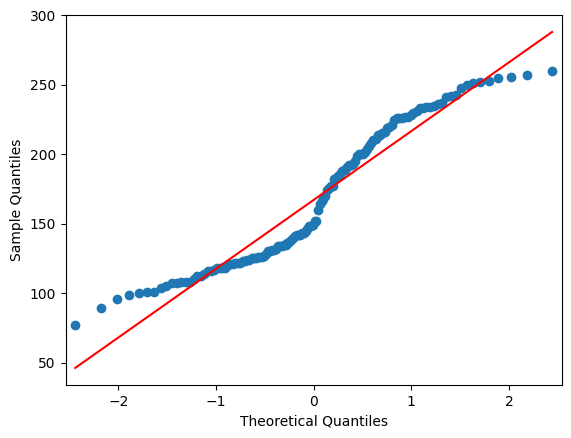

In [553]:
# 'ST18' QQ plot
qqplot(BGA_df['ST18'], line='s')
plt.show()

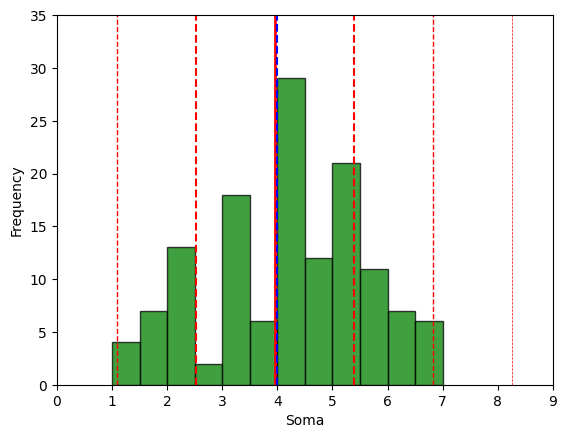

In [554]:
# Histogram for the 'Soma' numerical variable.
plt.hist(BGA_df['Soma'], bins = 12, alpha = 0.75, color = 'green', edgecolor = 'black')
plt.xlabel('Soma')
plt.ylabel('Frequency')
plt.xlim(0,9)
plt.xticks(np.arange(0,9.1,step=1))
plt.yticks(np.arange(0,36,step=5))

mean_value = BGA_df['Soma'].mean()
median_value = BGA_df['Soma'].median()
std_value = BGA_df['Soma'].std()

plt.axvline(mean_value, color='red', linewidth=2, label=f'Mean: {mean_value: .2f}')
plt.axvline(median_value, color='blue', linestyle='dashed', linewidth=1.5, label=f'Median: {median_value: .2f}')
plt.axvline(mean_value+std_value, color='red', linestyle='dashed', linewidth=1.5, label=f'1 SD')
plt.axvline(mean_value-std_value, color='red', linestyle='dashed', linewidth=1.5)
plt.axvline(mean_value+2*std_value, color='red', linestyle='dashed', linewidth=1, label=f'2 SD')
plt.axvline(mean_value-2*std_value, color='red', linestyle='dashed', linewidth=1)
plt.axvline(mean_value+3*std_value, color='red', linestyle='dashed', linewidth=0.5, label=f'3 SD')
plt.axvline(mean_value-3*std_value, color='red', linestyle='dashed', linewidth=0.5)

plt.show()

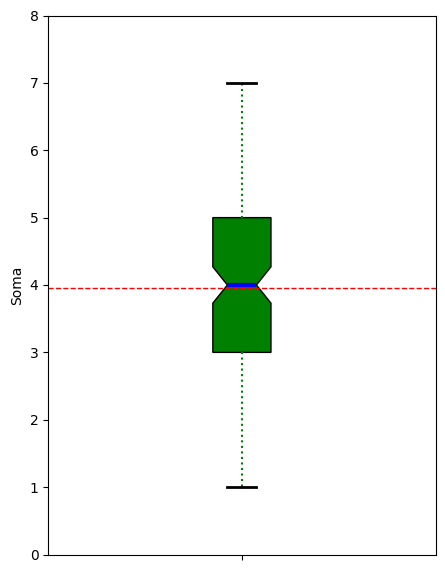

In [555]:
# Boxplot for the 'Soma' numeric variable.
fig = plt.figure(figsize =(5, 7))
ax = fig.add_subplot(111)

# Creating axes instance
bp = ax.boxplot(BGA_df['Soma'], patch_artist = True,
                notch ='True')

for patch, color in zip(bp['boxes'], 'green'):
    patch.set_facecolor('green')

# Changing color and linewidth of whiskers.
for whisker in bp['whiskers']:
    whisker.set(color ='green',
                linewidth = 1.5,
                linestyle =":")

# Changing color and linewidth of caps.
for cap in bp['caps']:
    cap.set(color ='black',
            linewidth = 2)

# Changing color and linewidth of median.
for median in bp['medians']:
    median.set(color ='blue',
               linewidth = 3)
    
# Changing style of fliers.
for flier in bp['fliers']:
    flier.set(marker ='D',
              alpha = 0.5)
    
# Set axis labels.
ax.set_ylabel('Soma')  
ax.set_xticklabels('')

# Set axis limits.
plt.yticks(np.arange(0,9,step=1)) 

# Display the mean.
plt.axhline(mean_value, color='red', linewidth=1, linestyle='dashed', label=f'Mean: {mean_value: .2f}')

plt.show()

In [556]:
# 'Soma' Anderson-Darling Normality Test
result = anderson(BGA_df['Soma'])
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < result.critical_values[i]:
		print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
	else:
		print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 1.649
15.000: 0.560, data does not look normal (reject H0)
10.000: 0.638, data does not look normal (reject H0)
5.000: 0.766, data does not look normal (reject H0)
2.500: 0.893, data does not look normal (reject H0)
1.000: 1.062, data does not look normal (reject H0)


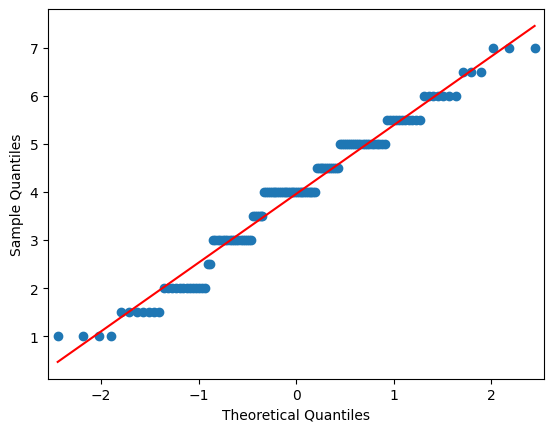

In [557]:
# 'Soma' QQ plot
qqplot(BGA_df['Soma'], line='s')
plt.show()

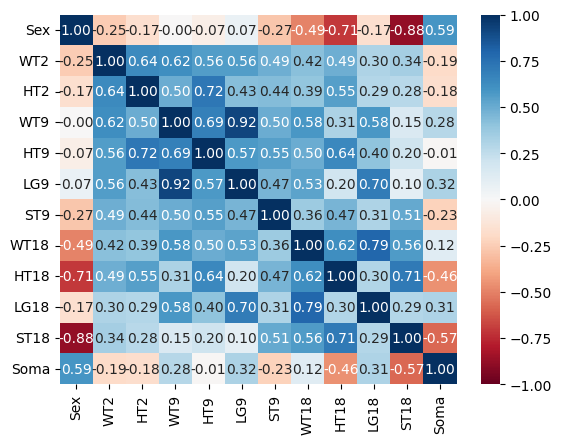

In [558]:
# Generate heatmap for correlation matrix analysis.
corr = BGA_df.corr()
fig, ax = plt.subplots()
sns.heatmap(corr, annot=True, fmt=".2f", xticklabels=corr.columns, yticklabels=corr.columns, vmin=-1, vmax=1, cmap="RdBu", ax=ax)
plt.show()

In [559]:
# Generate summary statistics for variables in correlation analysis.
summary_stats = BGA_df.describe().map('{:,.2f}'.format)
summary_stats

Sex     WT2     HT2     WT9     HT9     LG9     ST9    WT18    HT18  \
count  136.00  136.00  136.00  136.00  136.00  136.00  136.00  136.00  136.00   
mean     0.51   13.21   87.80   31.63  135.49   27.68   64.57   64.87  172.58   
std      0.50    1.61    3.36    5.97    5.50    2.46   15.45   10.67    8.84   
min      0.00   10.10   80.90   19.90  121.40   21.80   22.00   42.90  153.60   
25%      0.00   12.20   85.97   27.88  132.50   26.30   57.00   56.88  166.15   
50%      1.00   13.20   87.70   30.90  135.70   27.30   64.00   65.10  172.50   
75%      1.00   14.10   89.70   34.12  139.40   28.65   73.00   70.85  179.22   
max      1.00   18.60   98.20   66.80  152.50   40.40  121.00  110.20  195.10   

         LG18    ST18    Soma  
count  136.00  136.00  136.00  
mean    35.84  167.13    3.96  
std      2.57   49.72    1.44  
min     30.00   77.00    1.00  
25%     34.18  124.00    3.00  
50%     35.75  150.50    4.00  
75%     37.23  214.00    5.00  
max     44.10  260.00    7.00

1. The data from the Berkeley Guidance study included the coding for gender as: 0 = males, 1= females. Generate a scatter-plot matrix of all continuous variables. 
Group the variables by gender so that each paired observation has a gender-associated label. Explain the relationships that you see. (20 points)

In [560]:
# Create required dataframe for males.
BGA_0 = BGA_df[BGA_df['Sex'] == 0]
BGA_all0 = BGA_0[['WT2','HT2','WT9','HT9', 'LG9', 'ST9','WT18', 'HT18', 'LG18', 'ST18',
                  'Soma']]

# View summary statistics for males.
BGA_all0.describe().map('{:,.2f}'.format)

WT2    HT2    WT9     HT9    LG9     ST9    WT18    HT18   LG18  \
count  66.00  66.00  66.00   66.00  66.00   66.00   66.00   66.00  66.00   
mean   13.63  88.37  31.63  135.89  27.50   68.92   70.27  178.98  36.29   
std     1.63   3.32   6.16    5.38   2.48   14.67    9.98    6.52   2.49   
min    10.10  81.30  19.90  122.00  21.80   30.00   42.90  160.90  30.00   
25%    12.30  86.40  28.85  132.50  26.30   61.00   65.95  174.53  35.10   
50%    13.60  88.35  31.00  135.60  27.25   68.00   69.35  178.90  36.50   
75%    14.30  90.60  33.27  139.50  28.43   74.75   74.45  182.62  37.27   
max    18.60  98.20  66.80  147.50  40.40  121.00  110.20  195.10  44.10   

         ST18   Soma  
count   66.00  66.00  
mean   212.09   3.09  
std     28.59   1.45  
min    145.00   1.00  
25%    191.25   2.00  
50%    214.50   3.00  
75%    233.75   4.00  
max    260.00   7.00

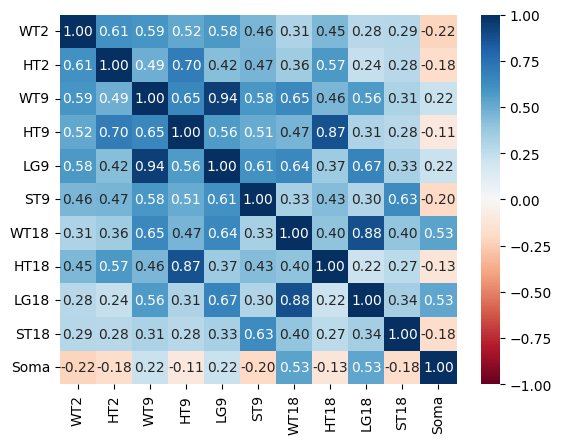

In [561]:
# Generate heatmap for correlation matrix analysis for males.
corr = BGA_all0.corr()
fig, ax = plt.subplots()
sns.heatmap(corr, annot=True, fmt=".2f", xticklabels=corr.columns, yticklabels=corr.columns, vmin=-1, vmax=1, cmap="RdBu", ax=ax)
plt.show()

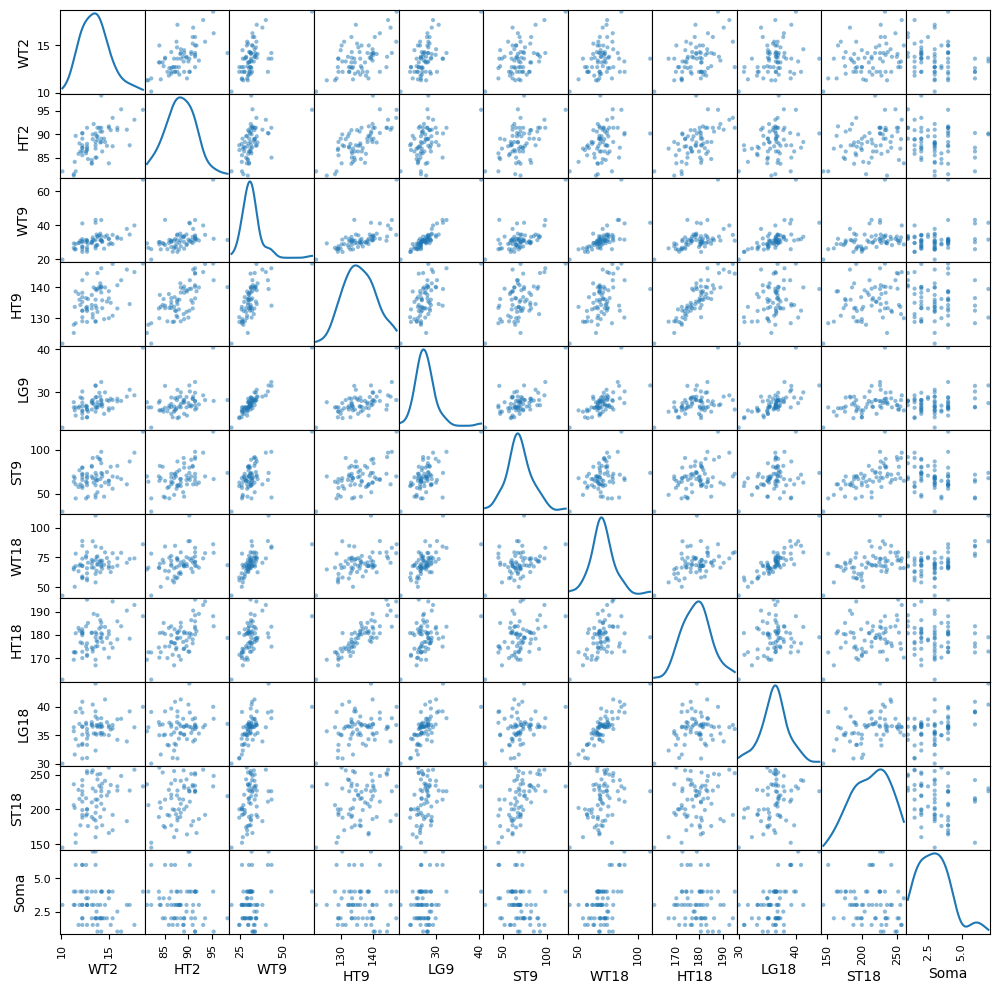

In [562]:
# Generate requested scatter plot matrix for males.
scatter_matrix(BGA_all0, diagonal="kde", figsize =(12, 12))
plt.show()

In [563]:
# Create required dataframe for females.
BGA_1 = BGA_df[BGA_df['Sex'] == 1]
BGA_all1 = BGA_1[['WT2','HT2','WT9','HT9', 'LG9', 'ST9','WT18', 'HT18', 'LG18', 'ST18',
                  'Soma']]

# View summary statistics for females.
BGA_all1.describe().map('{:,.2f}'.format)

WT2    HT2    WT9     HT9    LG9     ST9   WT18    HT18   LG18  \
count  70.00  70.00  70.00   70.00  70.00   70.00  70.00   70.00  70.00   
mean   12.82  87.25  31.62  135.12  27.84   60.46  59.78  166.54  35.42   
std     1.49   3.33   5.82    5.61   2.45   15.13   8.66    6.07   2.58   
min    10.20  80.90  22.00  121.40  22.60   22.00  44.10  153.60  30.30   
25%    11.80  85.67  27.62  132.88  26.30   51.25  54.78  163.00  33.52   
50%    12.70  87.10  30.65  135.70  27.45   59.00  58.30  166.75  34.85   
75%    13.47  88.90  34.48  138.78  29.25   68.75  64.80  170.25  37.08   
max    17.00  97.30  47.40  152.50  32.70  107.00  97.70  183.20  42.90   

         ST18   Soma  
count   70.00  70.00  
mean   124.74   4.78  
std     17.61   0.81  
min     77.00   3.00  
25%    114.50   4.00  
50%    124.50   5.00  
75%    135.00   5.00  
max    182.00   7.00

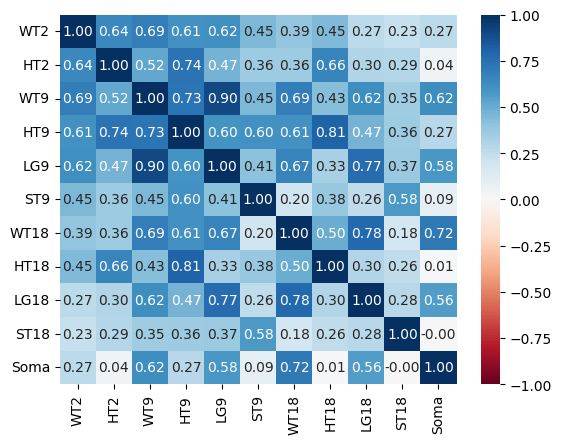

In [564]:
# Generate heatmap for correlation matrix analysis for females.
corr = BGA_all1.corr()
fig, ax = plt.subplots()
sns.heatmap(corr, annot=True, fmt=".2f", xticklabels=corr.columns, yticklabels=corr.columns, vmin=-1, vmax=1, cmap="RdBu", ax=ax)
plt.show()

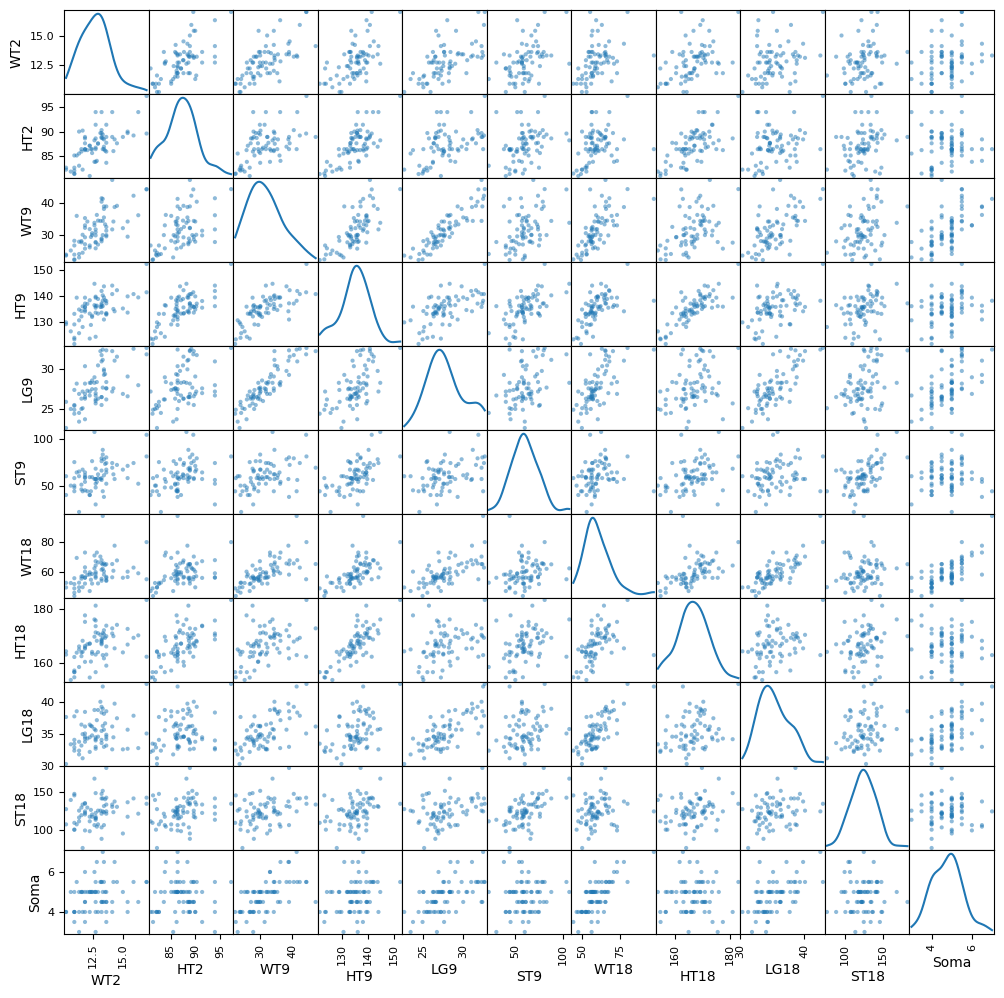

In [565]:
# Generate requested scatter plot matrix for females.
scatter_matrix(BGA_all1, diagonal="kde",figsize =(12, 12))
plt.show()

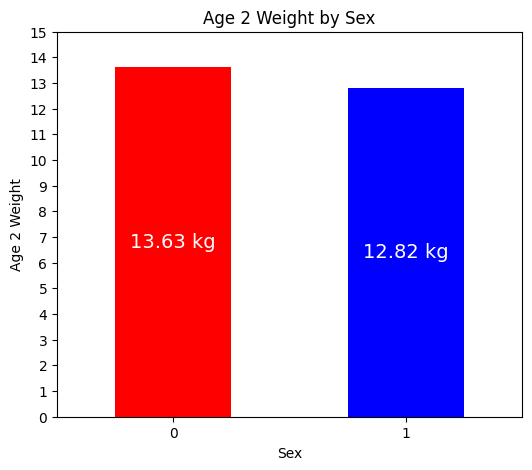

In [566]:
# Evaluating 'WT2' by 'Sex' (0 = male, 1 = female).
# Barchart for the 'WT2' by mean 'Sex'.
dfg = BGA_df.groupby(['Sex'])['WT2'].mean()
ax = dfg.plot(kind='bar', title='Age 2 Weight by Sex', ylabel='Age 2 Weight', xlabel='Sex', color= ['r','b'], rot=0, figsize=(6,5))
ax.bar_label(ax.containers[0], label_type='center', color='w', fontsize=14, fmt=lambda dfg: f'{dfg:.2f} kg')
plt.yticks(np.arange(0,16,step=1)) 
plt.show()

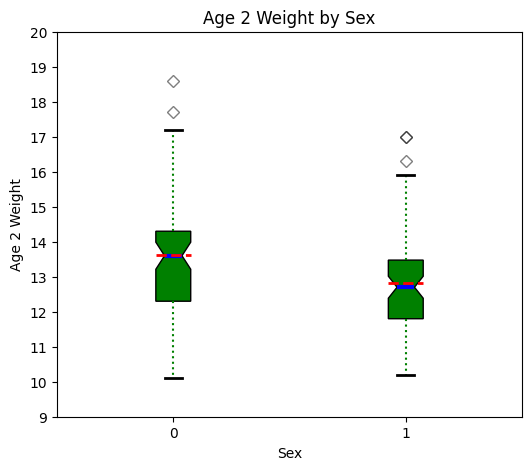

In [567]:
# Boxplots for the 'WT2' by 'Sex'.
grouped = BGA_df.groupby('Sex')['WT2']

fig = plt.figure(figsize =(6, 5))
ax = fig.add_subplot(111)

# Creating axes instance
bp = ax.boxplot(x=[Sex.values for name, Sex in grouped],
                tick_labels=grouped.groups.keys(), patch_artist = True, notch ='True', 
                showmeans=True, meanline=True, meanprops=dict(color='red', linewidth=2, linestyle='--'))

for patch, color in zip(bp['boxes'], 'green'):
    patch.set_facecolor('green')

# Changing color and linewidth of whiskers.
for whisker in bp['whiskers']:
    whisker.set(color ='green',
                linewidth = 1.5,
                linestyle =":")

# Changing color and linewidth of caps.
for cap in bp['caps']:
    cap.set(color ='black',
            linewidth = 2)

# Changing color and linewidth of median.
for median in bp['medians']:
    median.set(color ='blue',
               linewidth = 3)
    
# Changing style of fliers.
for flier in bp['fliers']:
    flier.set(marker ='D',
              alpha = 0.5)
    
# Set title.
ax.set_title('Age 2 Weight by Sex', fontsize=12)

# Set axis labels.
ax.set_ylabel('Age 2 Weight')
ax.set_xlabel('Sex')  

# Set axis limits.
plt.yticks(np.arange(9,21,step=1)) 

plt.show()

At Age 2, males can be slightly heavier than females, but there is probably not a significant difference.

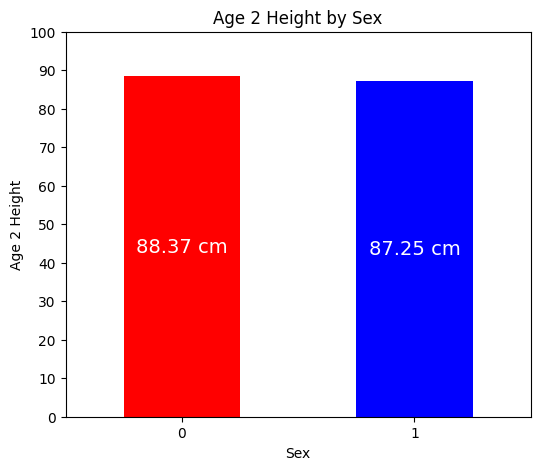

In [568]:
# Evaluating 'HT2' by 'Sex'.
# Barchart for the 'HT2' by mean 'Sex'.
dfg = BGA_df.groupby(['Sex'])['HT2'].mean()
ax = dfg.plot(kind='bar', title='Age 2 Height by Sex', ylabel='Age 2 Height', xlabel='Sex', color= ['r','b'], rot=0, figsize=(6,5))
ax.bar_label(ax.containers[0], label_type='center', color='w', fontsize=14, fmt=lambda dfg: f'{dfg:.2f} cm')
plt.yticks(np.arange(0,101,step=10)) 
plt.show()

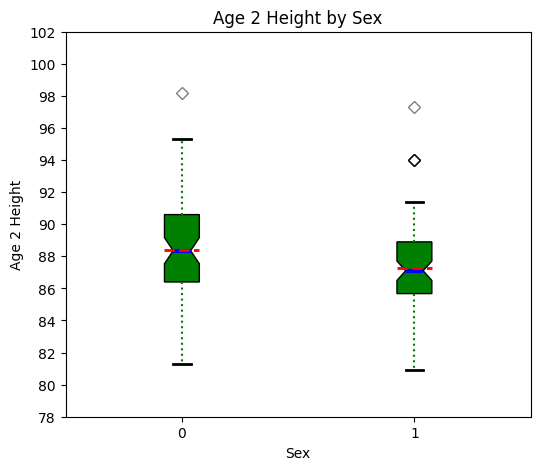

In [569]:
# Boxplots for the 'HT2' by 'Sex'.
grouped = BGA_df.groupby('Sex')['HT2']

fig = plt.figure(figsize =(6, 5))
ax = fig.add_subplot(111)

# Creating axes instance
bp = ax.boxplot(x=[Sex.values for name, Sex in grouped],
                tick_labels=grouped.groups.keys(), patch_artist = True, notch ='True', 
                showmeans=True, meanline=True, meanprops=dict(color='red', linewidth=2, linestyle='--'))

for patch, color in zip(bp['boxes'], 'green'):
    patch.set_facecolor('green')

# Changing color and linewidth of whiskers.
for whisker in bp['whiskers']:
    whisker.set(color ='green',
                linewidth = 1.5,
                linestyle =":")

# Changing color and linewidth of caps.
for cap in bp['caps']:
    cap.set(color ='black',
            linewidth = 2)

# Changing color and linewidth of median.
for median in bp['medians']:
    median.set(color ='blue',
               linewidth = 3)
    
# Changing style of fliers.
for flier in bp['fliers']:
    flier.set(marker ='D',
              alpha = 0.5)
    
# Set title.
ax.set_title('Age 2 Height by Sex', fontsize=12)

# Set axis labels.
ax.set_ylabel('Age 2 Height')
ax.set_xlabel('Sex')  

# Set axis limits.
plt.yticks(np.arange(78,103,step=2)) 

plt.show()

At Age 2, males can be slightly taller than females, but there is probably not a significant difference.

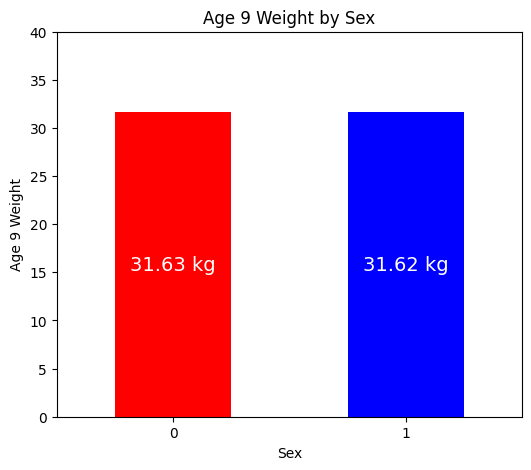

In [570]:
# Evaluating 'WT9' by 'Sex' (0 = male, 1 = female).
# Barchart for the 'WT9' by mean 'Sex'.
dfg = BGA_df.groupby(['Sex'])['WT9'].mean()
ax = dfg.plot(kind='bar', title='Age 9 Weight by Sex', ylabel='Age 9 Weight', xlabel='Sex', color= ['r','b'], rot=0, figsize=(6,5))
ax.bar_label(ax.containers[0], label_type='center', color='w', fontsize=14, fmt=lambda dfg: f'{dfg:.2f} kg')
plt.yticks(np.arange(0,41,step=5)) 
plt.show()

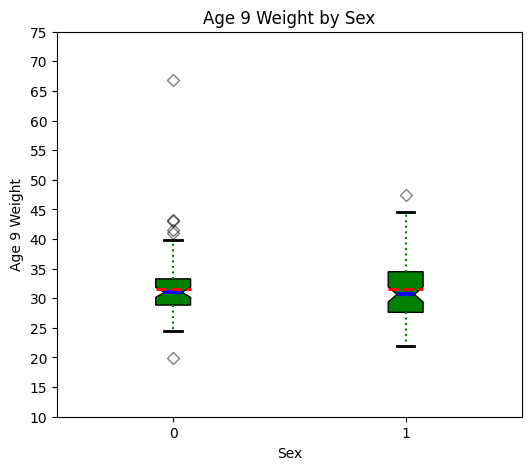

In [571]:
# Boxplots for the 'WT9' by 'Sex'.
grouped = BGA_df.groupby('Sex')['WT9']

fig = plt.figure(figsize =(6, 5))
ax = fig.add_subplot(111)

# Creating axes instance
bp = ax.boxplot(x=[Sex.values for name, Sex in grouped],
                tick_labels=grouped.groups.keys(), patch_artist = True, notch ='True', 
                showmeans=True, meanline=True, meanprops=dict(color='red', linewidth=2, linestyle='--'))

for patch, color in zip(bp['boxes'], 'green'):
    patch.set_facecolor('green')

# Changing color and linewidth of whiskers.
for whisker in bp['whiskers']:
    whisker.set(color ='green',
                linewidth = 1.5,
                linestyle =":")

# Changing color and linewidth of caps.
for cap in bp['caps']:
    cap.set(color ='black',
            linewidth = 2)

# Changing color and linewidth of median.
for median in bp['medians']:
    median.set(color ='blue',
               linewidth = 3)
    
# Changing style of fliers.
for flier in bp['fliers']:
    flier.set(marker ='D',
              alpha = 0.5)
    
# Set title.
ax.set_title('Age 9 Weight by Sex', fontsize=12)

# Set axis labels.
ax.set_ylabel('Age 9 Weight')
ax.set_xlabel('Sex')  

# Set axis limits.
plt.yticks(np.arange(10,76,step=5)) 

plt.show()

At Age 9, females can be slightly heavier than males, but there is probably not a significant difference.

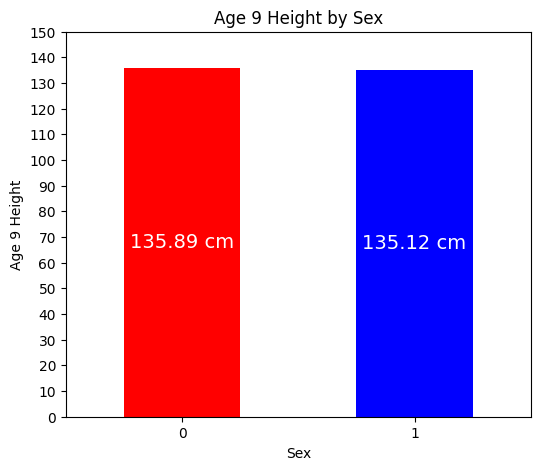

In [572]:
# Evaluating 'HT9' by 'Sex' (0 = male, 1 = female).
# Barchart for the 'HT9' by mean 'Sex'.
dfg = BGA_df.groupby(['Sex'])['HT9'].mean()
ax = dfg.plot(kind='bar', title='Age 9 Height by Sex', ylabel='Age 9 Height', xlabel='Sex', color= ['r','b'], rot=0, figsize=(6,5))
ax.bar_label(ax.containers[0], label_type='center', color='w', fontsize=14, fmt=lambda dfg: f'{dfg:.2f} cm')
plt.yticks(np.arange(0,151,step=10)) 
plt.show()

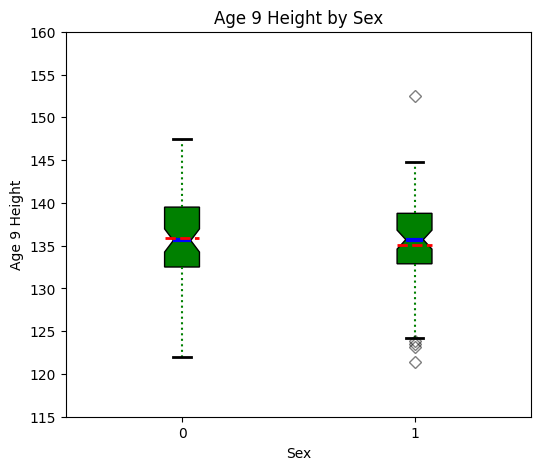

In [573]:
# Boxplots for the 'HT9' by 'Sex'.
grouped = BGA_df.groupby('Sex')['HT9']

fig = plt.figure(figsize =(6, 5))
ax = fig.add_subplot(111)

# Creating axes instance
bp = ax.boxplot(x=[Sex.values for name, Sex in grouped],
                tick_labels=grouped.groups.keys(), patch_artist = True, notch ='True', 
                showmeans=True, meanline=True, meanprops=dict(color='red', linewidth=2, linestyle='--'))

for patch, color in zip(bp['boxes'], 'green'):
    patch.set_facecolor('green')

# Changing color and linewidth of whiskers.
for whisker in bp['whiskers']:
    whisker.set(color ='green',
                linewidth = 1.5,
                linestyle =":")

# Changing color and linewidth of caps.
for cap in bp['caps']:
    cap.set(color ='black',
            linewidth = 2)

# Changing color and linewidth of median.
for median in bp['medians']:
    median.set(color ='blue',
               linewidth = 3)
    
# Changing style of fliers.
for flier in bp['fliers']:
    flier.set(marker ='D',
              alpha = 0.5)
    
# Set title.
ax.set_title('Age 9 Height by Sex', fontsize=12)

# Set axis labels.
ax.set_ylabel('Age 9 Height')
ax.set_xlabel('Sex')  

# Set axis limits.
plt.yticks(np.arange(115,161,step=5)) 

plt.show()

At Age 9, there is probably not a significant difference in height between males and females.

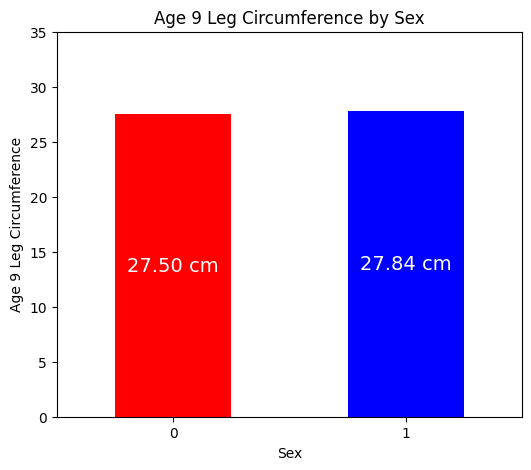

In [574]:
# Evaluating 'LG9' by 'Sex' (0 = male, 1 = female).
# Barchart for the 'LG9' by mean 'Sex'.
dfg = BGA_df.groupby(['Sex'])['LG9'].mean()
ax = dfg.plot(kind='bar', title='Age 9 Leg Circumference by Sex', ylabel='Age 9 Leg Circumference', xlabel='Sex', color= ['r','b'], rot=0, figsize=(6,5))
ax.bar_label(ax.containers[0], label_type='center', color='w', fontsize=14, fmt=lambda dfg: f'{dfg:.2f} cm')
plt.yticks(np.arange(0,36,step=5)) 
plt.show()

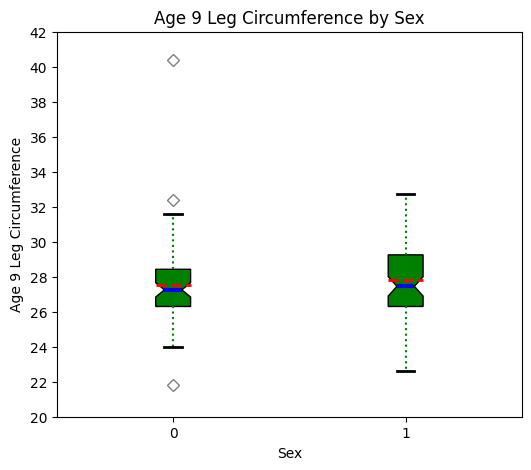

In [575]:
# Boxplots for the 'LG9' by 'Sex'.
grouped = BGA_df.groupby('Sex')['LG9']

fig = plt.figure(figsize =(6, 5))
ax = fig.add_subplot(111)

# Creating axes instance
bp = ax.boxplot(x=[Sex.values for name, Sex in grouped],
                tick_labels=grouped.groups.keys(), patch_artist = True, notch ='True', 
                showmeans=True, meanline=True, meanprops=dict(color='red', linewidth=2, linestyle='--'))

for patch, color in zip(bp['boxes'], 'green'):
    patch.set_facecolor('green')

# Changing color and linewidth of whiskers.
for whisker in bp['whiskers']:
    whisker.set(color ='green',
                linewidth = 1.5,
                linestyle =":")

# Changing color and linewidth of caps.
for cap in bp['caps']:
    cap.set(color ='black',
            linewidth = 2)

# Changing color and linewidth of median.
for median in bp['medians']:
    median.set(color ='blue',
               linewidth = 3)
    
# Changing style of fliers.
for flier in bp['fliers']:
    flier.set(marker ='D',
              alpha = 0.5)
    
# Set title.
ax.set_title('Age 9 Leg Circumference by Sex', fontsize=12)

# Set axis labels.
ax.set_ylabel('Age 9 Leg Circumference')
ax.set_xlabel('Sex')  

# Set axis limits.
plt.yticks(np.arange(20,43,step=2)) 

plt.show()

At Age 9, there is probably not a significant difference in leg circumference between males and females.

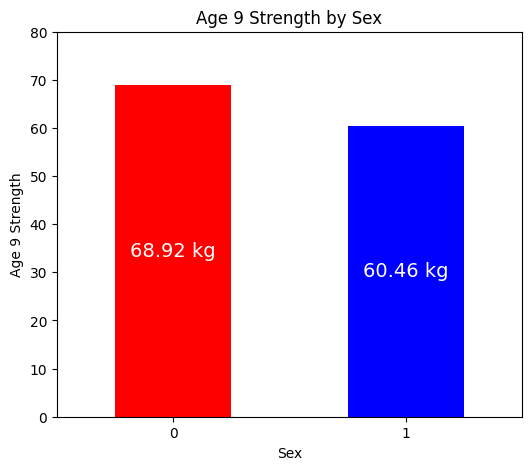

In [576]:
# Evaluating 'ST9' by 'Sex' (0 = male, 1 = female).
# Barchart for the 'ST9' by mean 'Sex'.
dfg = BGA_df.groupby(['Sex'])['ST9'].mean()
ax = dfg.plot(kind='bar', title='Age 9 Strength by Sex', ylabel='Age 9 Strength', xlabel='Sex', color= ['r','b'], rot=0, figsize=(6,5))
ax.bar_label(ax.containers[0], label_type='center', color='w', fontsize=14, fmt=lambda dfg: f'{dfg:.2f} kg')
plt.yticks(np.arange(0,81,step=10)) 
plt.show()

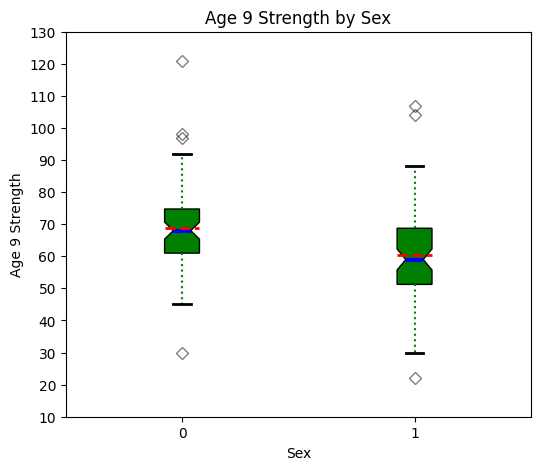

In [577]:
# Boxplots for the 'ST9' by 'Sex'.
grouped = BGA_df.groupby('Sex')['ST9']

fig = plt.figure(figsize =(6, 5))
ax = fig.add_subplot(111)

# Creating axes instance
bp = ax.boxplot(x=[Sex.values for name, Sex in grouped],
                tick_labels=grouped.groups.keys(), patch_artist = True, notch ='True', 
                showmeans=True, meanline=True, meanprops=dict(color='red', linewidth=2, linestyle='--'))

for patch, color in zip(bp['boxes'], 'green'):
    patch.set_facecolor('green')

# Changing color and linewidth of whiskers.
for whisker in bp['whiskers']:
    whisker.set(color ='green',
                linewidth = 1.5,
                linestyle =":")

# Changing color and linewidth of caps.
for cap in bp['caps']:
    cap.set(color ='black',
            linewidth = 2)

# Changing color and linewidth of median.
for median in bp['medians']:
    median.set(color ='blue',
               linewidth = 3)
    
# Changing style of fliers.
for flier in bp['fliers']:
    flier.set(marker ='D',
              alpha = 0.5)
    
# Set title.
ax.set_title('Age 9 Strength by Sex', fontsize=12)

# Set axis labels.
ax.set_ylabel('Age 9 Strength')
ax.set_xlabel('Sex')  

# Set axis limits.
plt.yticks(np.arange(10,131,step=10)) 

plt.show()

At Age 9, males can be slightly stronger than females, but there is probably not a significant difference.

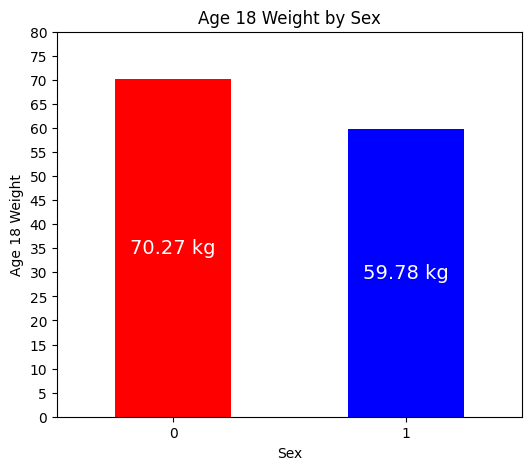

In [578]:
# Evaluating 'WT18' by 'Sex' (0 = male, 1 = female).
# Barchart for the 'WT18' by mean 'Sex'.
dfg = BGA_df.groupby(['Sex'])['WT18'].mean()
ax = dfg.plot(kind='bar', title='Age 18 Weight by Sex', ylabel='Age 18 Weight', xlabel='Sex', color= ['r','b'], rot=0, figsize=(6,5))
ax.bar_label(ax.containers[0], label_type='center', color='w', fontsize=14, fmt=lambda dfg: f'{dfg:.2f} kg')
plt.yticks(np.arange(0,81,step=5)) 
plt.show()

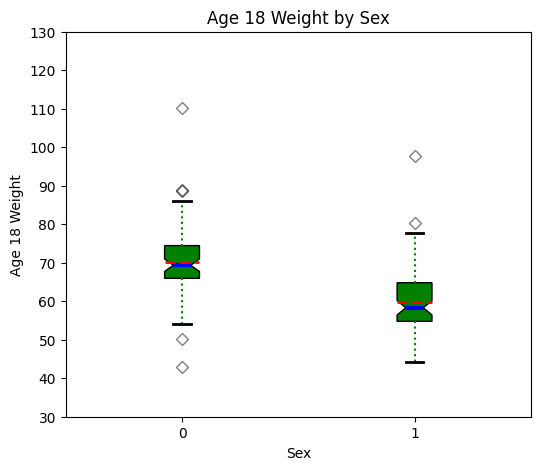

In [579]:
# Boxplots for the 'WT18' by 'Sex'.
grouped = BGA_df.groupby('Sex')['WT18']

fig = plt.figure(figsize =(6, 5))
ax = fig.add_subplot(111)

# Creating axes instance
bp = ax.boxplot(x=[Sex.values for name, Sex in grouped],
                tick_labels=grouped.groups.keys(), patch_artist = True, notch ='True', 
                showmeans=True, meanline=True, meanprops=dict(color='red', linewidth=2, linestyle='--'))

for patch, color in zip(bp['boxes'], 'green'):
    patch.set_facecolor('green')

# Changing color and linewidth of whiskers.
for whisker in bp['whiskers']:
    whisker.set(color ='green',
                linewidth = 1.5,
                linestyle =":")

# Changing color and linewidth of caps.
for cap in bp['caps']:
    cap.set(color ='black',
            linewidth = 2)

# Changing color and linewidth of median.
for median in bp['medians']:
    median.set(color ='blue',
               linewidth = 3)
    
# Changing style of fliers.
for flier in bp['fliers']:
    flier.set(marker ='D',
              alpha = 0.5)
    
# Set title.
ax.set_title('Age 18 Weight by Sex', fontsize=12)

# Set axis labels.
ax.set_ylabel('Age 18 Weight')
ax.set_xlabel('Sex')  

# Set axis limits.
plt.yticks(np.arange(30,131,step=10)) 

plt.show()

At Age 18, there is probably a significant difference in weight with males being generally heavier than females.

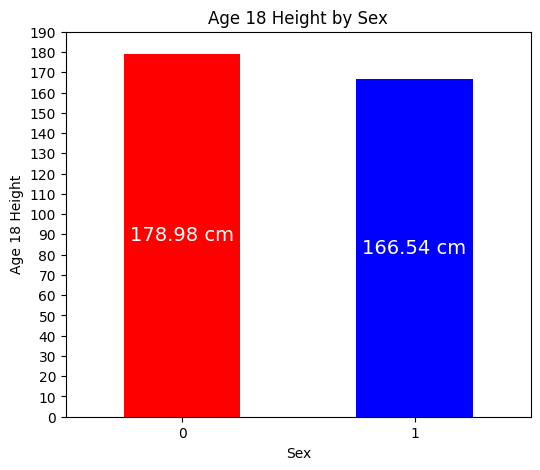

In [580]:
# Evaluating 'HT18' by 'Sex' (0 = male, 1 = female).
# Barchart for the 'HT18' by mean 'Sex'.
dfg = BGA_df.groupby(['Sex'])['HT18'].mean()
ax = dfg.plot(kind='bar', title='Age 18 Height by Sex', ylabel='Age 18 Height', xlabel='Sex', color= ['r','b'], rot=0, figsize=(6,5))
ax.bar_label(ax.containers[0], label_type='center', color='w', fontsize=14, fmt=lambda dfg: f'{dfg:.2f} cm')
plt.yticks(np.arange(0,191,step=10)) 
plt.show()

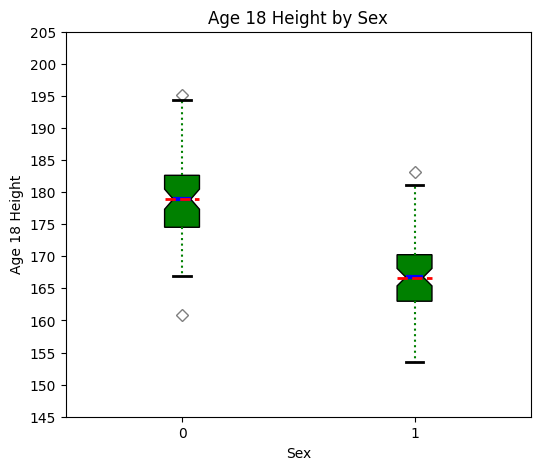

In [581]:
# Boxplots for the 'HT18' by 'Sex'.
grouped = BGA_df.groupby('Sex')['HT18']

fig = plt.figure(figsize =(6, 5))
ax = fig.add_subplot(111)

# Creating axes instance
bp = ax.boxplot(x=[Sex.values for name, Sex in grouped],
                tick_labels=grouped.groups.keys(), patch_artist = True, notch ='True', 
                showmeans=True, meanline=True, meanprops=dict(color='red', linewidth=2, linestyle='--'))

for patch, color in zip(bp['boxes'], 'green'):
    patch.set_facecolor('green')

# Changing color and linewidth of whiskers.
for whisker in bp['whiskers']:
    whisker.set(color ='green',
                linewidth = 1.5,
                linestyle =":")

# Changing color and linewidth of caps.
for cap in bp['caps']:
    cap.set(color ='black',
            linewidth = 2)

# Changing color and linewidth of median.
for median in bp['medians']:
    median.set(color ='blue',
               linewidth = 3)
    
# Changing style of fliers.
for flier in bp['fliers']:
    flier.set(marker ='D',
              alpha = 0.5)
    
# Set title.
ax.set_title('Age 18 Height by Sex', fontsize=12)

# Set axis labels.
ax.set_ylabel('Age 18 Height')
ax.set_xlabel('Sex')  

# Set axis limits.
plt.yticks(np.arange(145,206,step=5)) 

plt.show()

At Age 18, there is a significant difference in height with males being generally taller than females.

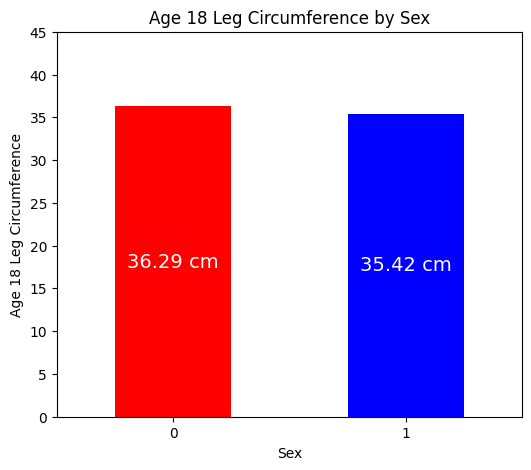

In [582]:
# Evaluating 'LG18' by 'Sex' (0 = male, 1 = female).
# Barchart for the 'LG18' by mean 'Sex'.
dfg = BGA_df.groupby(['Sex'])['LG18'].mean()
ax = dfg.plot(kind='bar', title='Age 18 Leg Circumference by Sex', ylabel='Age 18 Leg Circumference', xlabel='Sex', color= ['r','b'], rot=0, figsize=(6,5))
ax.bar_label(ax.containers[0], label_type='center', color='w', fontsize=14, fmt=lambda dfg: f'{dfg:.2f} cm')
plt.yticks(np.arange(0,46,step=5)) 
plt.show()

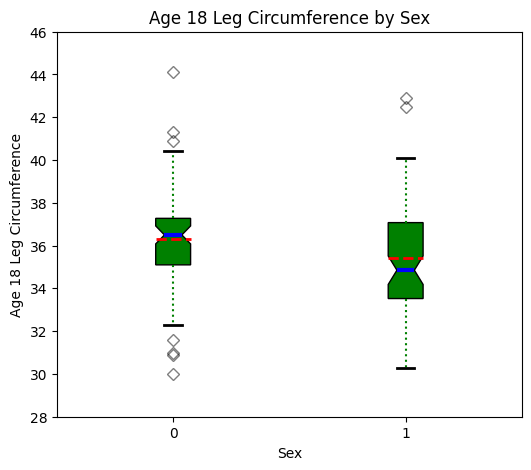

In [583]:
# Boxplots for the 'LG18' by 'Sex'.
grouped = BGA_df.groupby('Sex')['LG18']

fig = plt.figure(figsize =(6, 5))
ax = fig.add_subplot(111)

# Creating axes instance
bp = ax.boxplot(x=[Sex.values for name, Sex in grouped],
                tick_labels=grouped.groups.keys(), patch_artist = True, notch ='True', 
                showmeans=True, meanline=True, meanprops=dict(color='red', linewidth=2, linestyle='--'))

for patch, color in zip(bp['boxes'], 'green'):
    patch.set_facecolor('green')

# Changing color and linewidth of whiskers.
for whisker in bp['whiskers']:
    whisker.set(color ='green',
                linewidth = 1.5,
                linestyle =":")

# Changing color and linewidth of caps.
for cap in bp['caps']:
    cap.set(color ='black',
            linewidth = 2)

# Changing color and linewidth of median.
for median in bp['medians']:
    median.set(color ='blue',
               linewidth = 3)
    
# Changing style of fliers.
for flier in bp['fliers']:
    flier.set(marker ='D',
              alpha = 0.5)
    
# Set title.
ax.set_title('Age 18 Leg Circumference by Sex', fontsize=12)

# Set axis labels.
ax.set_ylabel('Age 18 Leg Circumference')
ax.set_xlabel('Sex')  

# Set axis limits.
plt.yticks(np.arange(28,48,step=2)) 

plt.show()

At Age 18, males can have a slightly larger leg circumference than females, but there is probably not a significant difference.

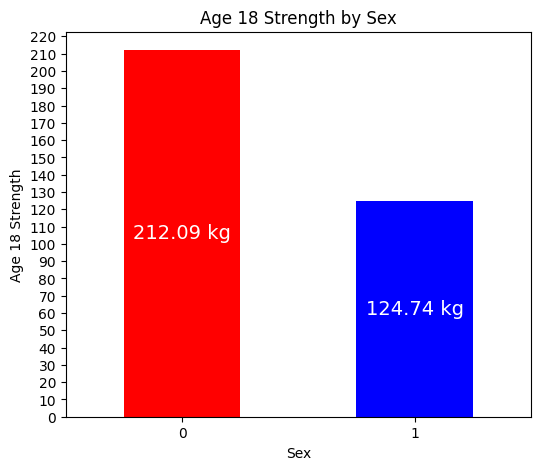

In [584]:
# Evaluating 'ST18' by 'Sex' (0 = male, 1 = female).
# Barchart for the 'ST18' by mean 'Sex'.
dfg = BGA_df.groupby(['Sex'])['ST18'].mean()
ax = dfg.plot(kind='bar', title='Age 18 Strength by Sex', ylabel='Age 18 Strength', xlabel='Sex', color= ['r','b'], rot=0, figsize=(6,5))
ax.bar_label(ax.containers[0], label_type='center', color='w', fontsize=14, fmt=lambda dfg: f'{dfg:.2f} kg')
plt.yticks(np.arange(0,221,step=10)) 
plt.show()

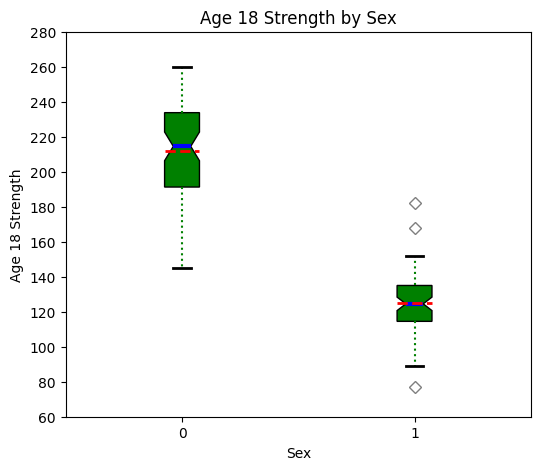

In [585]:
# Boxplots for the 'ST18' by 'Sex'.
grouped = BGA_df.groupby('Sex')['ST18']

fig = plt.figure(figsize =(6, 5))
ax = fig.add_subplot(111)

# Creating axes instance
bp = ax.boxplot(x=[Sex.values for name, Sex in grouped],
                tick_labels=grouped.groups.keys(), patch_artist = True, notch ='True', 
                showmeans=True, meanline=True, meanprops=dict(color='red', linewidth=2, linestyle='--'))

for patch, color in zip(bp['boxes'], 'green'):
    patch.set_facecolor('green')

# Changing color and linewidth of whiskers.
for whisker in bp['whiskers']:
    whisker.set(color ='green',
                linewidth = 1.5,
                linestyle =":")

# Changing color and linewidth of caps.
for cap in bp['caps']:
    cap.set(color ='black',
            linewidth = 2)

# Changing color and linewidth of median.
for median in bp['medians']:
    median.set(color ='blue',
               linewidth = 3)
    
# Changing style of fliers.
for flier in bp['fliers']:
    flier.set(marker ='D',
              alpha = 0.5)
    
# Set title.
ax.set_title('Age 18 Strength by Sex', fontsize=12)

# Set axis labels.
ax.set_ylabel('Age 18 Strength')
ax.set_xlabel('Sex')  

# Set axis limits.
plt.yticks(np.arange(60,281,step=20)) 

plt.show()

At Age 18, there is clearly a significant difference in strength with males being generally stronger than females.

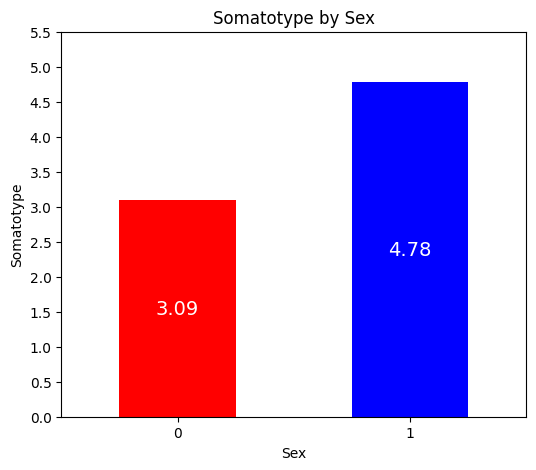

In [586]:
# Evaluating 'Soma' by 'Sex' (0 = male, 1 = female).
# Barchart for the 'Soma' by mean 'Sex'.
dfg = BGA_df.groupby(['Sex'])['Soma'].mean()
ax = dfg.plot(kind='bar', title='Somatotype by Sex', ylabel='Somatotype', xlabel='Sex', color= ['r','b'], rot=0, figsize=(6,5))
ax.bar_label(ax.containers[0], label_type='center', color='w', fontsize=14, fmt=lambda dfg: f'{dfg:.2f}')
plt.yticks(np.arange(0,6,step=0.5)) 
plt.show()

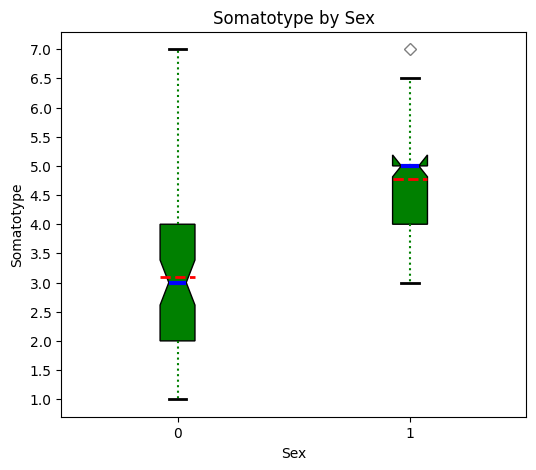

In [587]:
# Boxplots for the 'Soma' by 'Sex'.
grouped = BGA_df.groupby('Sex')['Soma']

fig = plt.figure(figsize =(6, 5))
ax = fig.add_subplot(111)

# Creating axes instance
bp = ax.boxplot(x=[Sex.values for name, Sex in grouped],
                tick_labels=grouped.groups.keys(), patch_artist = True, notch ='True', 
                showmeans=True, meanline=True, meanprops=dict(color='red', linewidth=2, linestyle='--'))

for patch, color in zip(bp['boxes'], 'green'):
    patch.set_facecolor('green')

# Changing color and linewidth of whiskers.
for whisker in bp['whiskers']:
    whisker.set(color ='green',
                linewidth = 1.5,
                linestyle =":")

# Changing color and linewidth of caps.
for cap in bp['caps']:
    cap.set(color ='black',
            linewidth = 2)

# Changing color and linewidth of median.
for median in bp['medians']:
    median.set(color ='blue',
               linewidth = 3)
    
# Changing style of fliers.
for flier in bp['fliers']:
    flier.set(marker ='D',
              alpha = 0.5)
    
# Set title.
ax.set_title('Somatotype by Sex', fontsize=12)

# Set axis labels.
ax.set_ylabel('Somatotype')
ax.set_xlabel('Sex')  

# Set axis limits.
plt.yticks(np.arange(1,7.5,step=0.5)) 

plt.show()

Genernally speaking, males have a greater variation in the physiological index than females. The index usually has three values for 
endomorphic, mesomorphic, and ectomorphic traits. Given that averaging them would not make sense, I will make the assumption that the 
largest value of the three is being represented here.  With that in mind, there is a significant difference in Somatype with females 
conforming to one of the traits more than males do.

2. Generate two linear regressions that predict WT18 (weight at 18 years old).  (50 points)
One regression model is to predict the weight of boys, and the other is to predict the weight of girls. Interpret the results. 

Generate a multiple linear regression model to explain WT18 using the variables HT2, WT2, HT9, WT9, and ST9. Find the R-squared, the 
overall ANOVA table, and the overall F-test. Compute the t-statistics to test each of the coefficients against to be 0. State the 
conclusions from this test.   

In [588]:
# Create required dataframe for males.
BGA_0 = BGA_df[BGA_df['Sex'] == 0]
BGA_pred0 = BGA_0[['WT2','HT2','WT9','HT9','ST9','WT18']]

# View summary statistics.
BGA_pred0.describe().map('{:,.2f}'.format)

WT2    HT2    WT9     HT9     ST9    WT18
count  66.00  66.00  66.00   66.00   66.00   66.00
mean   13.63  88.37  31.63  135.89   68.92   70.27
std     1.63   3.32   6.16    5.38   14.67    9.98
min    10.10  81.30  19.90  122.00   30.00   42.90
25%    12.30  86.40  28.85  132.50   61.00   65.95
50%    13.60  88.35  31.00  135.60   68.00   69.35
75%    14.30  90.60  33.27  139.50   74.75   74.45
max    18.60  98.20  66.80  147.50  121.00  110.20

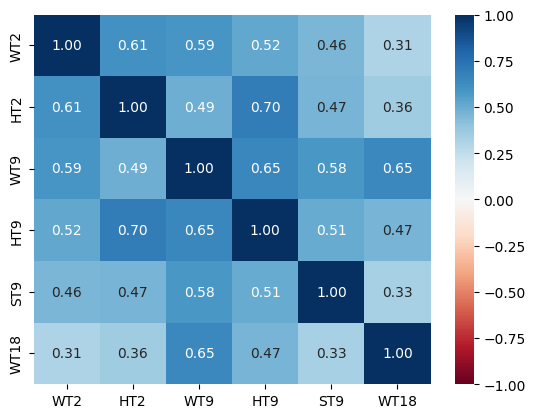

In [589]:
# Generate heatmap for correlation matrix analysis.
corr = BGA_pred0.corr()
fig, ax = plt.subplots()
sns.heatmap(corr, annot=True, fmt=".2f", xticklabels=corr.columns, yticklabels=corr.columns, vmin=-1, vmax=1, cmap="RdBu", ax=ax)
plt.show()

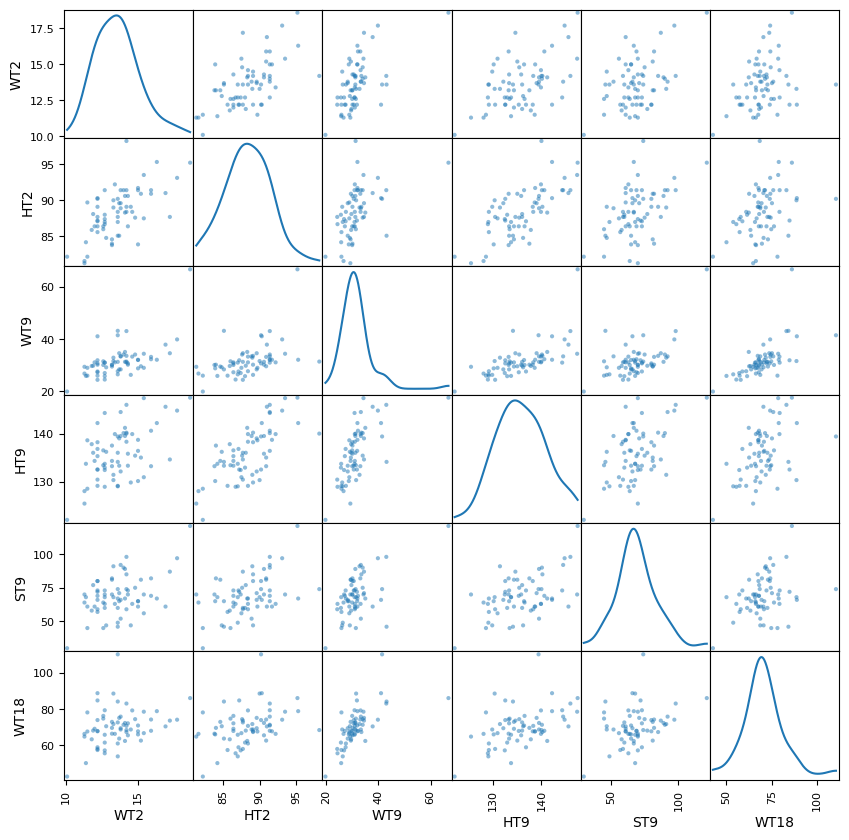

In [590]:
# Generate requested scatter plot matrix of required continuous variables.
scatter_matrix(BGA_pred0, diagonal="kde",figsize =(10, 10))
plt.show()

In [591]:
# Generate required multiple linear regression model for males.
lm = smf.ols(formula='WT18 ~ WT2 + HT2 + WT9 + HT9 + ST9', data=BGA_pred0).fit()
print(lm.params)

Intercept    5.571666
WT2         -1.064879
HT2          0.357979
WT9          1.134578
HT9          0.114871
ST9         -0.057023
dtype: float64


In [592]:
# Calculate the Total Sum of Squares (SST) for an empty model for WT18.
Y = BGA_pred0['WT18'].tolist()
Y_mean = np.mean(Y)
sst = np.sum((Y - Y_mean) ** 2)
print(f"SST = {sst:0,.3f}")

SST = 6,471.490


In [593]:
# Generate OLS Regression results for the multiple linear regression model.
print(lm.summary())
print('\n', '='*20, '\n')
# Residual Sum of Squares
print(f"RSS = {lm.ssr:0,.3f}")
# Sum of Squares Error
print(f"SSE = {sst-lm.ssr:0,.3f}")

                            OLS Regression Results                            
Dep. Variable:                   WT18   R-squared:                       0.444
Model:                            OLS   Adj. R-squared:                  0.398
Method:                 Least Squares   F-statistic:                     9.596
Date:                Sun, 16 Feb 2025   Prob (F-statistic):           9.13e-07
Time:                        14:30:57   Log-Likelihood:                -225.58
No. Observations:                  66   AIC:                             463.2
Df Residuals:                      60   BIC:                             476.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.5717     31.925      0.175      0.8

In [594]:
# Generate the absolute critical t-statistic.
t_critical = abs(scipy.stats.t.ppf(q=.05/2,df=5))
print(f'{t_critical:.3f}')

2.571


Interpret the results for males:

The required OLS regression model was run with Age 18 Weight (WT18) as the outcome variable for males.  The R-squared value of 0.444 
indicates that 44.4% of the variation in the predicted WT18 values can be explained by this multiple linear regression model.  The Y 
intercept, beta0, equals 5.5717 kg.  WT2, beta1, equals -1.0649 kg per 1 kg of weight, HT2, beta2, equals 0.358 kg per 1 cm of height,
WT9, beta3, equals 1.1346 kg per 1 kg of weight, HT9, beta4, equals 0.1149 kg per 1 cm of height, and ST9, beta5, equals -0.057 kg per 
1 kg of strength.  The F-statistic of 9.596 brings attention to potential overfitting in this MLR model.  Only the Age 9 Weight (WT9)
variable had a p-value safely under the 0.05 alpha standard (rejecting H0 the null hypothesis), indicating clearly that the relationship
between WT18 and WT9 is statistically significant. All of the other explanatory variables had p-values which notably exceeded the 0.05 
alpha standard (accepting H0 the alternate hypothesis), indicating that the relationship between WT18 and those variables are not 
statistically significant.

With WT18 having a SST of 6,471.49, the MLR model using WT2, HT2, WT9, HT9, and ST9 variables reduced it 2,875.469 to a SSR of 3,596.021,
primarily attributed to the WT9 variable. Normality was assessed on these variables with male and female data combined, and there were no 
glaring red flags in the Anderson-Darling and/or QQ plot assessments.  Believe that the results were pretty much as one would expect with
Age 9 Weight (WT9) being the only variable in the MLR model to effectively explain Age 18 Weight (WT18). Suggest that the other four explanatory 
variables should be removed from the MLR model, and some consideration be given to Age 18 Leg Circumference (LG18) and Age 18 Height (HT18), 
and possibly Age 18 Strength (ST18), given they share a reasonably strong correlation with the outcome variable as did Age 9 Weight (WT9). 

Requested t-statistic assessment for coefficients:

The Intercept absolute t-value of 0.175 is less than the absolute t-critical value of 2.571, thus H0 the null hypothesis would be accepted, 
so the Intercept coefficient could possibly be zero.

The WT2 absolute t-value of 1.294 is less than the absolute t-critical value of 2.571, thus H0 the null hypothesis would be accepted, so the
WT2 coefficient could possibly be zero. This is further confirmation that the relationship between the WT18 outcome variable and WT2 is not 
statistically significant.

The HT2 absolute t-value of 0.794 is less than the absolute t-critical value of 2.571, thus H0 the null hypothesis would be accepted, so the 
HT2 coefficient could possibly be zero. This is further confirmation that the relationship between the WT18 outcome variable and HT2 is not 
statistically significant.

The WT9 absolute t-value of 4.769 is greater than the absolute t-critical value of 2.571, thus H0 the null hypothesis would be rejected, and 
the H1 alternate hypothesis would be accepted, so the WT9 coefficient could not be zero. This is further confirmation that the relationship 
between the WT18 outcome variable and WT9 is statistically significant.

The HT9 absolute t-value of 0.396 is less than the absolute t-critical value of 2.571, thus H0 the null hypothesis would be accepted, 
so the HT9 coefficient could possibly be zero. This is further confirmation that the relationship between the WT18 outcome variable and HT9
is not statistically significant.

The ST9 absolute t-value of 0.681 is less than the absolute t-critical value of 2.571, thus H0 the null hypothesis would be rejected, and 
the H1 alternate hypothesis would be accepted, so the ST9 coefficient could not be zero.  This is further confirmation that the relationship 
between the WT18 outcome variable and ST9 is not statistically significant.

In [595]:
# Create required dataframe for females.
BGA_1 = BGA_df[BGA_df['Sex'] == 1]
BGA_pred1 = BGA_1[['WT2','HT2','WT9','HT9','ST9','WT18']]

# View summary statistics.
BGA_pred1.describe().map('{:,.2f}'.format)

WT2    HT2    WT9     HT9     ST9   WT18
count  70.00  70.00  70.00   70.00   70.00  70.00
mean   12.82  87.25  31.62  135.12   60.46  59.78
std     1.49   3.33   5.82    5.61   15.13   8.66
min    10.20  80.90  22.00  121.40   22.00  44.10
25%    11.80  85.67  27.62  132.88   51.25  54.78
50%    12.70  87.10  30.65  135.70   59.00  58.30
75%    13.47  88.90  34.48  138.78   68.75  64.80
max    17.00  97.30  47.40  152.50  107.00  97.70

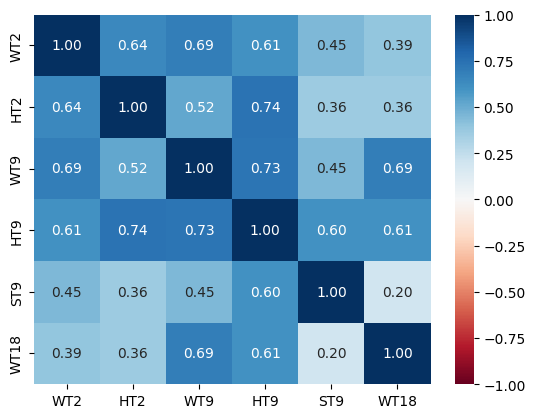

In [596]:
# Generate heatmap for correlation matrix analysis.
corr = BGA_pred1.corr()
fig, ax = plt.subplots()
sns.heatmap(corr, annot=True, fmt=".2f", xticklabels=corr.columns, yticklabels=corr.columns, vmin=-1, vmax=1, cmap="RdBu", ax=ax)
plt.show()

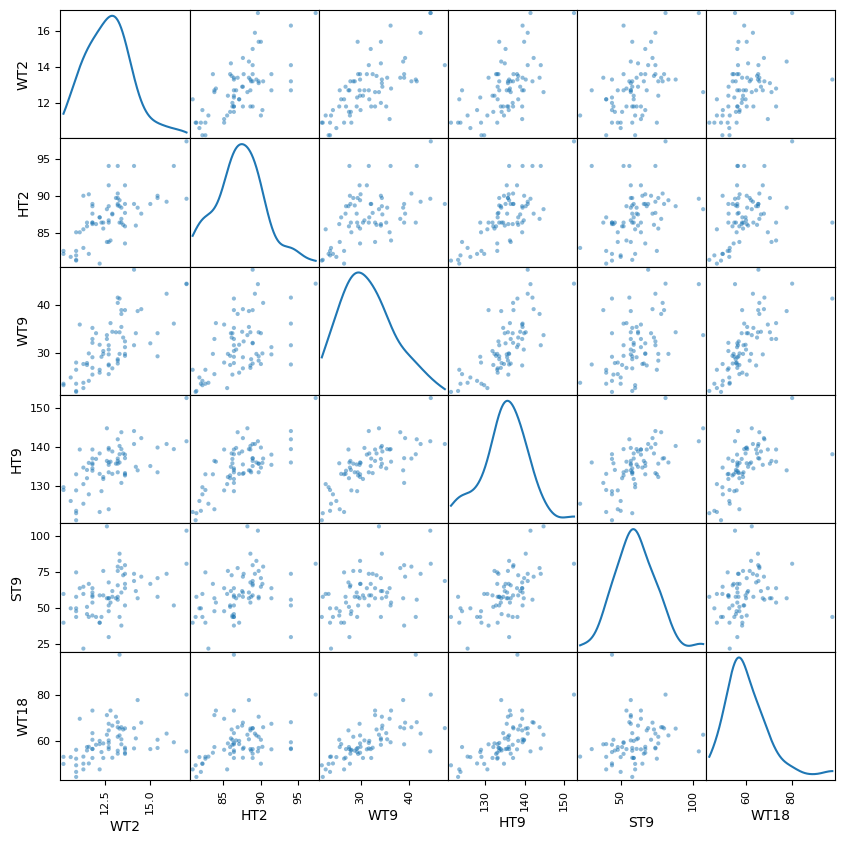

In [597]:
# Generate requested scatter plot matrix of required continuous variables.
scatter_matrix(BGA_pred1, diagonal="kde",figsize =(10, 10))
plt.show()

In [598]:
# Generate required multiple linear regression model for females.
lm = smf.ols(formula='WT18 ~ WT2 + HT2 + WT9 + HT9 + ST9', data=BGA_pred1).fit()
print(lm.params)

Intercept   -24.004176
WT2          -0.609520
HT2          -0.462320
WT9           0.873788
HT9           0.844238
ST9          -0.161523
dtype: float64


In [599]:
# Calculate the Total Sum of Squares (SST) for an empty model for WT18.
Y = BGA_pred1['WT18'].tolist()
Y_mean = np.mean(Y)
sst = np.sum((Y - Y_mean) ** 2)
print(f"SST = {sst:0,.3f}")

SST = 5,179.233


In [600]:
# Generate OLS Regression results for the multiple linear regression model.
print(lm.summary())
print('\n', '='*20, '\n')
# Residual Sum of Squares
print(f"RSS = {lm.ssr:0,.3f}")
# Sum of Squares Error
print(f"SSE = {sst-lm.ssr:0,.3f}")

                            OLS Regression Results                            
Dep. Variable:                   WT18   R-squared:                       0.577
Model:                            OLS   Adj. R-squared:                  0.544
Method:                 Least Squares   F-statistic:                     17.46
Date:                Sun, 16 Feb 2025   Prob (F-statistic):           7.24e-11
Time:                        14:35:49   Log-Likelihood:                -219.85
No. Observations:                  70   AIC:                             451.7
Df Residuals:                      64   BIC:                             465.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -24.0042     24.011     -1.000      0.3

In [601]:
# Generate the absolute critical t-statistic.
t_critical = abs(scipy.stats.t.ppf(q=.05/2,df=5))
print(f'{t_critical:.3f}')

2.571


Interpret the results for females:

The required OLS regression model was run with Age 18 Weight (WT18) as the outcome variable for females.  The R-squared value of 0.577 
indicates that 57.7% of the variation in the predicted WT18 values can be explained by this multiple linear regression model.  The Y 
intercept, beta0, equals -24.0042 kg.  WT2, beta1, equals -0.6095 kg per 1 kg of weight, HT2, beta2, equals -0.4623 kg per 1 cm of height,
WT9, beta3, equals 0.8738 kg per 1 kg of weight, HT9, beta4, equals 0.8442 kg per 1 cm of height, and ST9, beta5, equals -0.1615 kg per 
1 kg of strength.  The F-statistic of 17.46 is at an acceptable level in this MLR model, but could stand improvement.  The Age 9 Weight 
(WT9), Age 9 Height (HT9), and Age 9 Strength (ST9) variables have a p-value safely under the 0.05 alpha standard (rejecting H0 the null 
hypothesis), indicating clearly that the relationship between WT18 and those variables are statistically significant. All of the other 
explanatory variables had p-values which notably exceeded the 0.05 alpha standard (accepting H0 the alternate hypothesis), indicating that 
the relationship between WT18 and those variables are not statistically significant.

With WT18 having a SST of 5,179.233, the MLR model using WT2, HT2, WT9, HT9, and ST9 variables reduced it 2,988.171 to a SSR of 2,191.062,
primarily attributed to the WT9, HT9, and ST9 variables. Normality was assessed on these variables with male and female data combined, and 
there were no glaring red flags in the Anderson-Darling and/or QQ plot assessments.  After viewing the results associated with male MLR model,
I was a bit surprised initially. After reflecting on what was learned from Question 1, I believe that females develop physically earlier than 
males. This would account for the influence of the Age 9 variables in the MLR model. Suggest that the other two explanatory variables should 
be removed from the MLR model, and some consideration be given to Age 18 Leg Circumference (LG18), and possibly Age 18 Height (HT18), given 
they share a reasonably strong correlation with the outcome variable as did Age 9 Weight (WT9) and Age 9 Height (HT9). 

Requested t-statistic assessment for coefficients:

The Intercept absolute t-value of 1.000 is less than the absolute t-critical value of 2.571, thus H0 the null hypothesis would be accepted, 
so the Intercept coefficient could possibly be zero.

The WT2 absolute t-value of 0.800 is less than the absolute t-critical value of 2.571, thus H0 the null hypothesis would be accepted, so the
WT2 coefficient could possibly be zero. This is further confirmation that the relationship between the WT18 outcome variable and WT2 is not 
statistically significant.

The HT2 absolute t-value of 1.292 is less than the absolute t-critical value of 2.571, thus H0 the null hypothesis would be accepted, so the 
HT2 coefficient could possibly be zero. This is further confirmation that the relationship between the WT18 outcome variable and HT2 is not 
statistically significant.

The WT9 absolute t-value of 4.249 is greater than the absolute t-critical value of 2.571, thus H0 the null hypothesis would be rejected, and 
the H1 alternate hypothesis would be accepted, so the WT9 coefficient could not be zero. This is further confirmation that the relationship 
between the WT18 outcome variable and WT9 is statistically significant.

The HT9 absolute t-value of 3.205 is greater than the absolute t-critical value of 2.571, thus H0 the null hypothesis would be rejected, and 
the H1 alternate hypothesis would be accepted, so the WT9 coefficient could not be zero. This is further confirmation that the relationship 
between the WT18 outcome variable and HT9 is statistically significant.

The ST9 absolute t-value of 2.659 is greater than the absolute t-critical value of 2.571, thus H0 the null hypothesis would be rejected, and 
the H1 alternate hypothesis would be accepted, so the WT9 coefficient could not be zero. This is further confirmation that the relationship 
between the WT18 outcome variable and ST9 is statistically significant.

In [602]:
# Load the required data for this assignemt.
HEART_df = pd.read_csv(DATA / 'HW2_HW3_HEART.csv')

# View some initial records.
HEART_df.head()

Status DeathCause  AgeCHDdiag     Sex  AgeAtStart  Height  Weight  \
0   Dead      Other         NaN  Female          29   62.50   140.0   
1   Dead     Cancer         NaN  Female          41   59.75   194.0   
2  Alive        NaN         NaN  Female          57   62.25   132.0   
3  Alive        NaN         NaN  Female          39   65.75   158.0   
4  Alive        NaN         NaN    Male          42   66.00   156.0   

   Diastolic  Systolic    MRW  Smoking  AgeAtDeath  Cholesterol Chol_Status  \
0         78       124  121.0      0.0        55.0          NaN         NaN   
1         92       144  183.0      0.0        57.0        181.0   Desirable   
2         90       170  114.0     10.0         NaN        250.0        High   
3         80       128  123.0      0.0         NaN        242.0        High   
4         76       110  116.0     20.0         NaN        281.0        High   

  BP_Status Weight_Status   Smoking_Status  
0    Normal    Overweight       Non-smoker  
1      High    Overweight       Non-smoker  
2      High    Overweight  Moderate (6-15)  
3    Normal    Overweight       Non-smoker  
4   Optimal    Overweight    Heavy (16-25)

In [603]:
# Generate dataframe dimensions.
HEART_df.shape

(5209, 17)

In [604]:
# Generate variable data types.
HEART_df.dtypes

Status             object
DeathCause         object
AgeCHDdiag        float64
Sex                object
AgeAtStart          int64
Height            float64
Weight            float64
Diastolic           int64
Systolic            int64
MRW               float64
Smoking           float64
AgeAtDeath        float64
Cholesterol       float64
Chol_Status        object
BP_Status          object
Weight_Status      object
Smoking_Status     object
dtype: object

In [605]:
# Generate number of missing values.
HEART_df.isna().sum()

Status               0
DeathCause        3218
AgeCHDdiag        3760
Sex                  0
AgeAtStart           0
Height               6
Weight               6
Diastolic            0
Systolic             0
MRW                  6
Smoking             36
AgeAtDeath        3218
Cholesterol        152
Chol_Status        152
BP_Status            0
Weight_Status        6
Smoking_Status      36
dtype: int64

In [606]:
HEART_df.describe().map('{:,.2f}'.format)

AgeCHDdiag AgeAtStart    Height    Weight Diastolic  Systolic       MRW  \
count   1,449.00   5,209.00  5,203.00  5,203.00  5,209.00  5,209.00  5,203.00   
mean       63.30      44.07     64.81    153.09     85.36    136.91    119.96   
std        10.02       8.57      3.58     28.92     12.97     23.74     19.98   
min        32.00      28.00     51.50     67.00     50.00     82.00     67.00   
25%        57.00      37.00     62.25    132.00     76.00    120.00    106.00   
50%        63.00      43.00     64.50    150.00     84.00    132.00    118.00   
75%        70.00      51.00     67.50    172.00     92.00    148.00    131.00   
max        90.00      62.00     76.50    300.00    160.00    300.00    268.00   

        Smoking AgeAtDeath Cholesterol  
count  5,173.00   1,991.00    5,057.00  
mean       9.37      70.54      227.42  
std       12.03      10.56       44.94  
min        0.00      36.00       96.00  
25%        0.00      63.00      196.00  
50%        1.00      71.00      223.00  
75%       20.00      79.00      255.00  
max       60.00      93.00      568.00

Specific Evaluation and Preparation of Dataset Variables

In [607]:
# Evaluate the 'Status' categorical variable.
HEART_df['Status'].value_counts()

Status
Alive    3218
Dead     1991
Name: count, dtype: int64

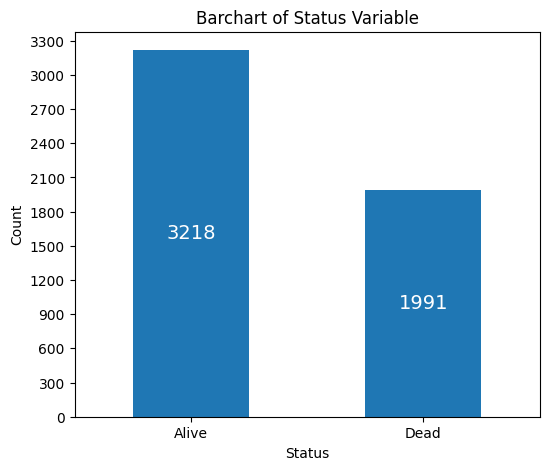

In [608]:
# Barchart for the 'Status' categorical variable.
dfg = HEART_df['Status'].value_counts()
ax = dfg.plot(kind='bar', title='Barchart of Status Variable', ylabel='Count', xlabel='Status', rot=0, figsize=(6,5))
ax.bar_label(ax.containers[0], label_type='center', color='w', fontsize=14)
plt.yticks(np.arange(0,3301,step=300))
plt.show()

In [609]:
# Evaluate the 'DeathCause' categorical variable.
HEART_df['DeathCause'].value_counts()

DeathCause
Coronary Heart Disease       605
Cancer                       539
Cerebral Vascular Disease    378
Other                        357
Unknown                      112
Name: count, dtype: int64

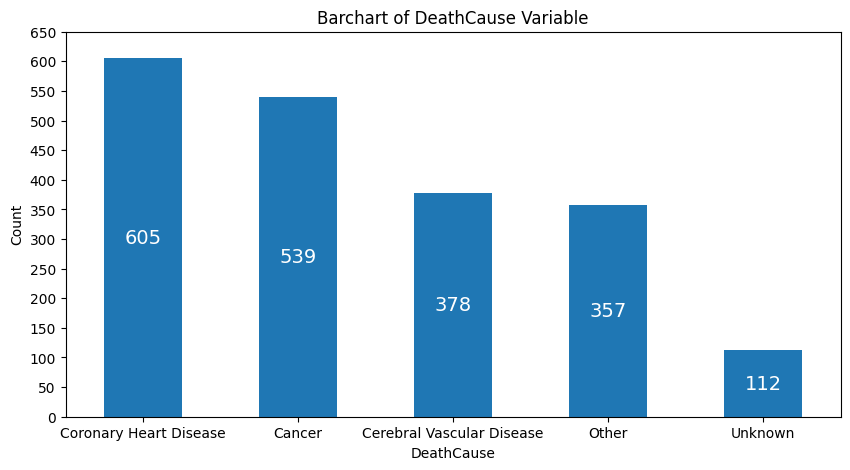

In [610]:
# Barchart for the 'DeathCause' categorical variable.
dfg = HEART_df['DeathCause'].value_counts()
ax = dfg.plot(kind='bar', title='Barchart of DeathCause Variable', ylabel='Count', xlabel='DeathCause', rot=0, figsize=(10,5))
ax.bar_label(ax.containers[0], label_type='center', color='w', fontsize=14)
plt.yticks(np.arange(0,651,step=50))
plt.show()

In [611]:
# Evaluate the 'Sex' categorical variable.
HEART_df['Sex'].value_counts()

Sex
Female    2873
Male      2336
Name: count, dtype: int64

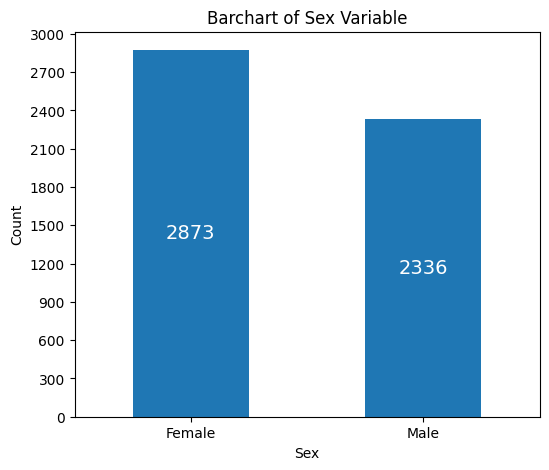

In [612]:
# Barchart for the 'Sex' categorical variable.
dfg = HEART_df['Sex'].value_counts()
ax = dfg.plot(kind='bar', title='Barchart of Sex Variable', ylabel='Count', xlabel='Sex', rot=0, figsize=(6,5))
ax.bar_label(ax.containers[0], label_type='center', color='w', fontsize=14)
plt.yticks(np.arange(0,3001,step=300))
plt.show()

In [613]:
# Evaluate the 'Chol_Status' categorical variable.
HEART_df['Chol_Status'].value_counts()

Chol_Status
Borderline    1861
High          1791
Desirable     1405
Name: count, dtype: int64

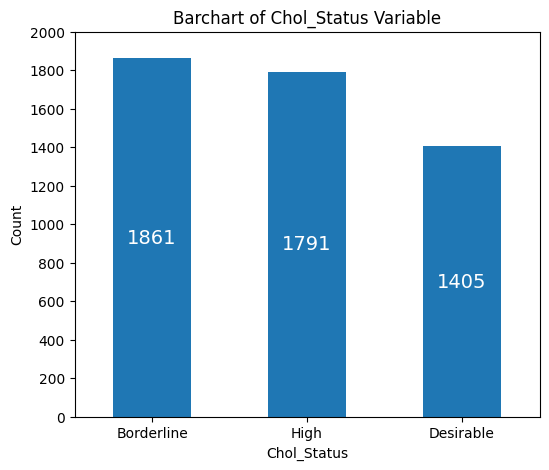

In [614]:
# Barchart for the 'Chol_Status' categorical variable.
dfg = HEART_df['Chol_Status'].value_counts()
ax = dfg.plot(kind='bar', title='Barchart of Chol_Status Variable', ylabel='Count', xlabel='Chol_Status', rot=0, figsize=(6,5))
ax.bar_label(ax.containers[0], label_type='center', color='w', fontsize=14)
plt.yticks(np.arange(0,2001,step=200))
plt.show()

In [615]:
# Evaluate the 'BP_Status' categorical variable.
HEART_df['BP_Status'].value_counts()

BP_Status
High       2267
Normal     2143
Optimal     799
Name: count, dtype: int64

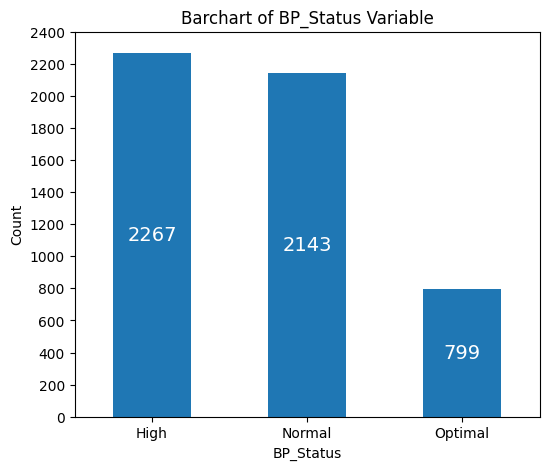

In [616]:
# Barchart for the 'BP_Status' categorical variable.
dfg = HEART_df['BP_Status'].value_counts()
ax = dfg.plot(kind='bar', title='Barchart of BP_Status Variable', ylabel='Count', xlabel='BP_Status', rot=0, figsize=(6,5))
ax.bar_label(ax.containers[0], label_type='center', color='w', fontsize=14)
plt.yticks(np.arange(0,2401,step=200))
plt.show()

In [617]:
# Evaluate the 'Weight_Status' categorical variable.
HEART_df['Weight_Status'].value_counts()

Weight_Status
Overweight     3550
Normal         1472
Underweight     181
Name: count, dtype: int64

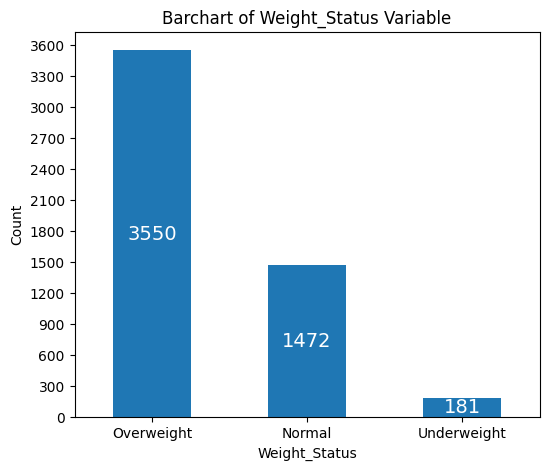

In [618]:
# Barchart for the 'Weight_Status' categorical variable.
dfg = HEART_df['Weight_Status'].value_counts()
ax = dfg.plot(kind='bar', title='Barchart of Weight_Status Variable', ylabel='Count', xlabel='Weight_Status', rot=0, figsize=(6,5))
ax.bar_label(ax.containers[0], label_type='center', color='w', fontsize=14)
plt.yticks(np.arange(0,3601,step=300))
plt.show()

In [619]:
# Evaluate the 'Smoking_Status' categorical variable.
HEART_df['Smoking_Status'].value_counts()

Smoking_Status
Non-smoker           2501
Heavy (16-25)        1046
Light (1-5)           579
Moderate (6-15)       576
Very Heavy (> 25)     471
Name: count, dtype: int64

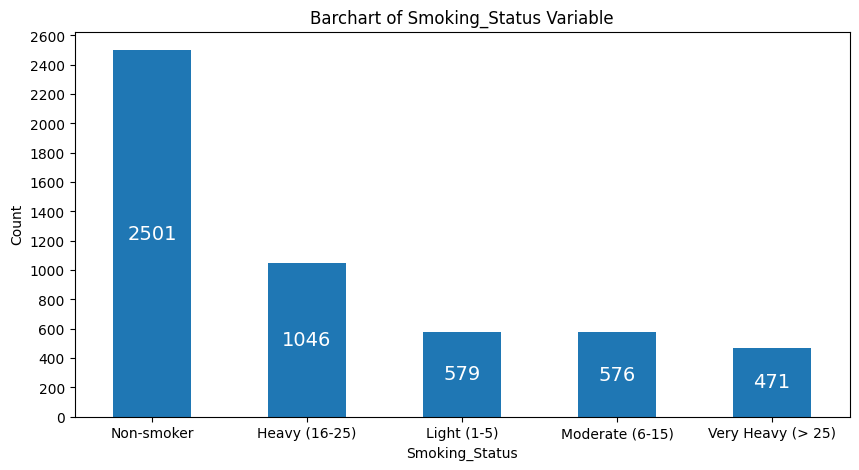

In [620]:
# Barchart for the 'Smoking_Status' categorical variable.
dfg = HEART_df['Smoking_Status'].value_counts()
ax = dfg.plot(kind='bar', title='Barchart of Smoking_Status Variable', ylabel='Count', xlabel='Smoking_Status', rot=0, figsize=(10,5))
ax.bar_label(ax.containers[0], label_type='center', color='w', fontsize=14)
plt.yticks(np.arange(0,2601,step=200))
plt.show()

In [622]:
# Remove nan values for the 'AgeCHDdiag' numeric variable.
AgeCHDdiag_list = HEART_df['AgeCHDdiag'].values.tolist()
AgeCHDdiag_clean = [item for item in AgeCHDdiag_list if not(pd.isnull(item)) == True]

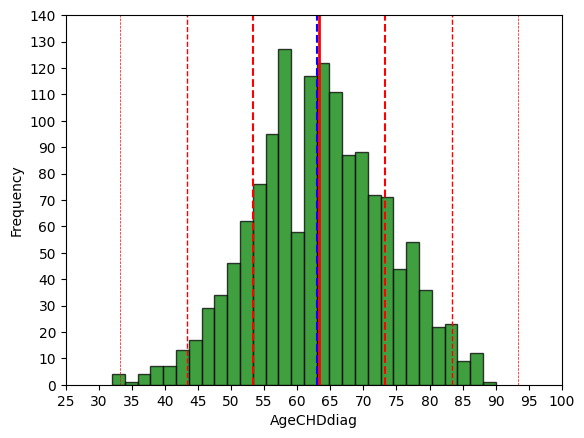

In [623]:
# Histogram for the 'AgeCHDdiag' numerical variable.
plt.hist(AgeCHDdiag_clean, bins = 30, alpha = 0.75, color = 'green', edgecolor = 'black')
plt.xlabel('AgeCHDdiag')
plt.ylabel('Frequency')
plt.xticks(np.arange(25,105,step=5))
plt.yticks(np.arange(0,141,step=10))

mean_value = statistics.mean(AgeCHDdiag_clean)
median_value = statistics.median(AgeCHDdiag_clean)
std_value = statistics.stdev(AgeCHDdiag_clean)

plt.axvline(mean_value, color='red', linewidth=2, label=f'Mean: {mean_value: .2f}')
plt.axvline(median_value, color='blue', linestyle='dashed', linewidth=1.5, label=f'Median: {median_value: .2f}')
plt.axvline(mean_value+std_value, color='red', linestyle='dashed', linewidth=1.5, label=f'1 SD')
plt.axvline(mean_value-std_value, color='red', linestyle='dashed', linewidth=1.5)
plt.axvline(mean_value+2*std_value, color='red', linestyle='dashed', linewidth=1, label=f'2 SD')
plt.axvline(mean_value-2*std_value, color='red', linestyle='dashed', linewidth=1)
plt.axvline(mean_value+3*std_value, color='red', linestyle='dashed', linewidth=0.5, label=f'3 SD')
plt.axvline(mean_value-3*std_value, color='red', linestyle='dashed', linewidth=0.5)

plt.show()

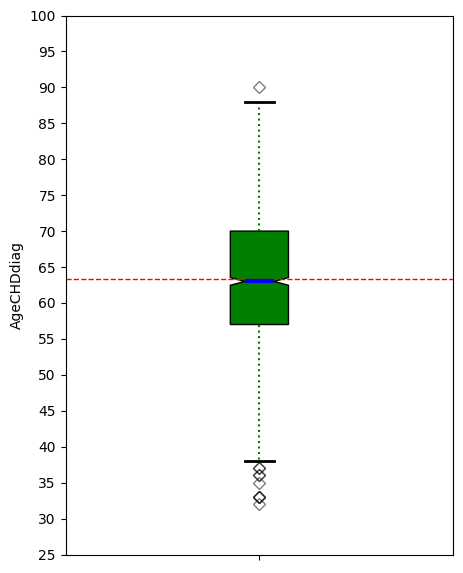

In [624]:
# Boxplot for the 'AgeCHDdiag' numeric variable.
fig = plt.figure(figsize =(5, 7))
ax = fig.add_subplot(111)

# Creating axes instance.
bp = ax.boxplot(AgeCHDdiag_clean, patch_artist = True,
                notch ='True')

for patch, color in zip(bp['boxes'], 'green'):
    patch.set_facecolor('green')

# Changing color and linewidth of whiskers.
for whisker in bp['whiskers']:
    whisker.set(color ='green',
                linewidth = 1.5,
                linestyle =":")

# Changing color and linewidth of caps.
for cap in bp['caps']:
    cap.set(color ='black',
            linewidth = 2)

# Changing color and linewidth of median.
for median in bp['medians']:
    median.set(color ='blue',
               linewidth = 3)
    
# Changing style of fliers.
for flier in bp['fliers']:
    flier.set(marker ='D',
              alpha = 0.5)
    
# Set axis labels.
ax.set_ylabel('AgeCHDdiag')  
ax.set_xticklabels('')

# Set axis limits.
plt.yticks(np.arange(25,101,step=5)) 

# Display the mean.
plt.axhline(mean_value, color='red', linewidth=1, linestyle='dashed', label=f'Mean: {mean_value: .2f}')

plt.show()

In [625]:
# 'AgeCHDdiag' Anderson-Darling Normality Test
result = anderson(AgeCHDdiag_clean)
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < result.critical_values[i]:
		print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
	else:
		print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 1.417
15.000: 0.574, data does not look normal (reject H0)
10.000: 0.654, data does not look normal (reject H0)
5.000: 0.785, data does not look normal (reject H0)
2.500: 0.915, data does not look normal (reject H0)
1.000: 1.089, data does not look normal (reject H0)


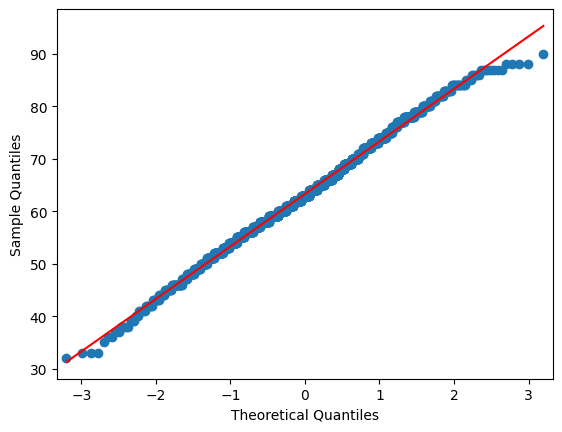

In [626]:
# 'AgeCHDdiag' QQ plot
qqplot(pd.array(AgeCHDdiag_clean), line='s')
plt.show()

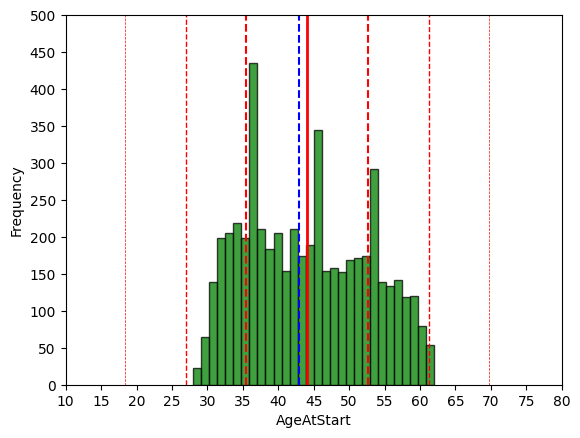

In [628]:
# Histogram for the 'AgeAtStart' numerical variable.
plt.hist(HEART_df['AgeAtStart'], bins = 30, alpha = 0.75, color = 'green', edgecolor = 'black')
plt.xlabel('AgeAtStart')
plt.ylabel('Frequency')
plt.xticks(np.arange(10,81,step=5))
plt.yticks(np.arange(0,501,step=50))

mean_value = HEART_df['AgeAtStart'].mean()
median_value = HEART_df['AgeAtStart'].median()
std_value = HEART_df['AgeAtStart'].std()

plt.axvline(mean_value, color='red', linewidth=2, label=f'Mean: {mean_value: .2f}')
plt.axvline(median_value, color='blue', linestyle='dashed', linewidth=1.5, label=f'Median: {median_value: .2f}')
plt.axvline(mean_value+std_value, color='red', linestyle='dashed', linewidth=1.5, label=f'1 SD')
plt.axvline(mean_value-std_value, color='red', linestyle='dashed', linewidth=1.5)
plt.axvline(mean_value+2*std_value, color='red', linestyle='dashed', linewidth=1, label=f'2 SD')
plt.axvline(mean_value-2*std_value, color='red', linestyle='dashed', linewidth=1)
plt.axvline(mean_value+3*std_value, color='red', linestyle='dashed', linewidth=0.5, label=f'3 SD')
plt.axvline(mean_value-3*std_value, color='red', linestyle='dashed', linewidth=0.5)

plt.show()

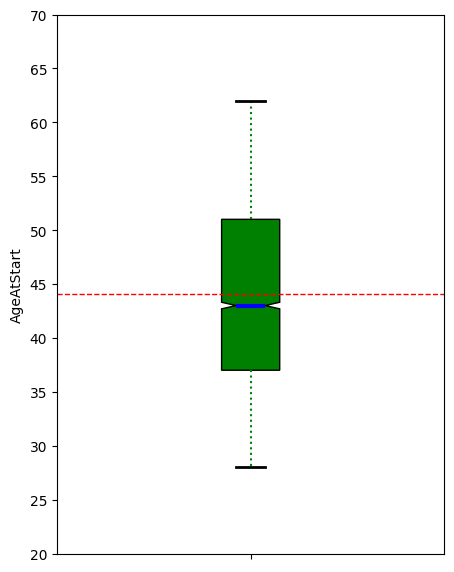

In [629]:
# Boxplot for the 'AgeAtStart' numeric variable.
fig = plt.figure(figsize =(5, 7))
ax = fig.add_subplot(111)

# Creating axes instance.
bp = ax.boxplot(HEART_df['AgeAtStart'], patch_artist = True,
                notch ='True')

for patch, color in zip(bp['boxes'], 'green'):
    patch.set_facecolor('green')

# Changing color and linewidth of whiskers.
for whisker in bp['whiskers']:
    whisker.set(color ='green',
                linewidth = 1.5,
                linestyle =":")

# Changing color and linewidth of caps.
for cap in bp['caps']:
    cap.set(color ='black',
            linewidth = 2)

# Changing color and linewidth of median.
for median in bp['medians']:
    median.set(color ='blue',
               linewidth = 3)
    
# Changing style of fliers.
for flier in bp['fliers']:
    flier.set(marker ='D',
              alpha = 0.5)
    
# Set axis labels.
ax.set_ylabel('AgeAtStart')  
ax.set_xticklabels('')

# Set axis limits.
plt.yticks(np.arange(20,71,step=5)) 

# Display the mean.
plt.axhline(mean_value, color='red', linewidth=1, linestyle='dashed', label=f'Mean: {mean_value: .2f}')

plt.show()

In [630]:
# 'AgeAtStart' Anderson-Darling Normality Test
result = anderson(HEART_df['AgeAtStart'])
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < result.critical_values[i]:
		print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
	else:
		print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 59.113
15.000: 0.576, data does not look normal (reject H0)
10.000: 0.655, data does not look normal (reject H0)
5.000: 0.786, data does not look normal (reject H0)
2.500: 0.917, data does not look normal (reject H0)
1.000: 1.091, data does not look normal (reject H0)


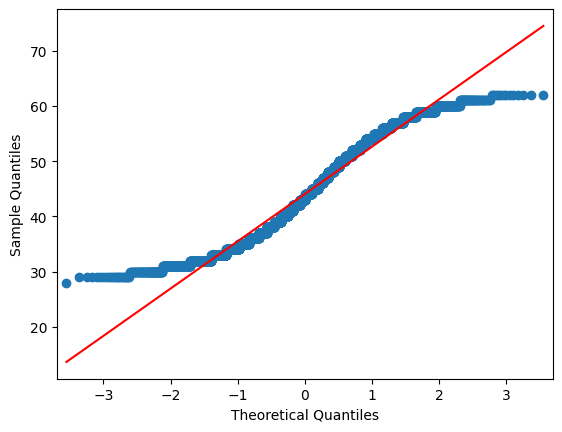

In [631]:
# 'AgeAtStart' QQ plot
qqplot(HEART_df['AgeAtStart'], line='s')
plt.show()

In [633]:
# Remove nan values for the 'Height' numeric variable.
Height_list = HEART_df['Height'].values.tolist()
Height_clean = [item for item in Height_list if not(pd.isnull(item)) == True]

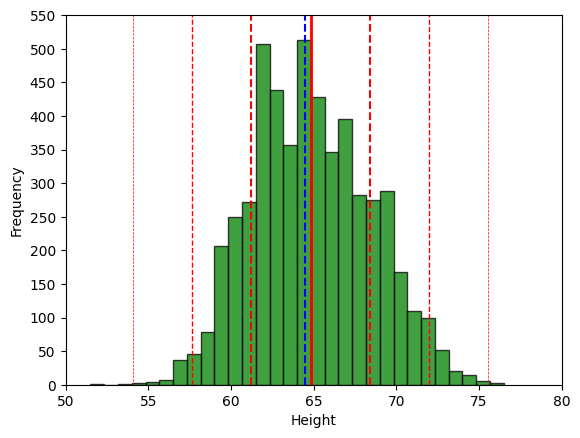

In [634]:
# Histogram for the 'Height' numerical variable.
plt.hist(Height_clean, bins = 30, alpha = 0.75, color = 'green', edgecolor = 'black')
plt.xlabel('Height')
plt.ylabel('Frequency')
plt.xticks(np.arange(50,81,step=5))
plt.yticks(np.arange(0,551,step=50))

mean_value = statistics.mean(Height_clean)
median_value = statistics.median(Height_clean)
std_value = statistics.stdev(Height_clean)

plt.axvline(mean_value, color='red', linewidth=2, label=f'Mean: {mean_value: .2f}')
plt.axvline(median_value, color='blue', linestyle='dashed', linewidth=1.5, label=f'Median: {median_value: .2f}')
plt.axvline(mean_value+std_value, color='red', linestyle='dashed', linewidth=1.5, label=f'1 SD')
plt.axvline(mean_value-std_value, color='red', linestyle='dashed', linewidth=1.5)
plt.axvline(mean_value+2*std_value, color='red', linestyle='dashed', linewidth=1, label=f'2 SD')
plt.axvline(mean_value-2*std_value, color='red', linestyle='dashed', linewidth=1)
plt.axvline(mean_value+3*std_value, color='red', linestyle='dashed', linewidth=0.5, label=f'3 SD')
plt.axvline(mean_value-3*std_value, color='red', linestyle='dashed', linewidth=0.5)

plt.show()

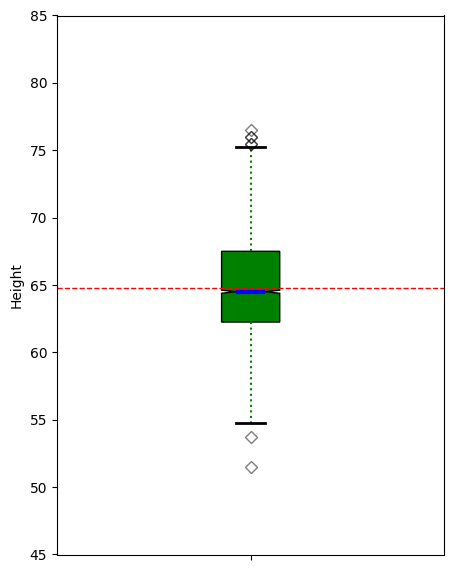

In [635]:
# Boxplot for the 'Height' numeric variable.
fig = plt.figure(figsize =(5, 7))
ax = fig.add_subplot(111)

# Creating axes instance.
bp = ax.boxplot(Height_clean, patch_artist = True,
                notch ='True')

for patch, color in zip(bp['boxes'], 'green'):
    patch.set_facecolor('green')

# Changing color and linewidth of whiskers.
for whisker in bp['whiskers']:
    whisker.set(color ='green',
                linewidth = 1.5,
                linestyle =":")

# Changing color and linewidth of caps.
for cap in bp['caps']:
    cap.set(color ='black',
            linewidth = 2)

# Changing color and linewidth of median.
for median in bp['medians']:
    median.set(color ='blue',
               linewidth = 3)
    
# Changing style of fliers.
for flier in bp['fliers']:
    flier.set(marker ='D',
              alpha = 0.5)
    
# Set axis labels.
ax.set_ylabel('Height')  
ax.set_xticklabels('')

# Set axis limits.
plt.yticks(np.arange(45,86,step=5)) 

# Display the mean.
plt.axhline(mean_value, color='red', linewidth=1, linestyle='dashed', label=f'Mean: {mean_value: .2f}')

plt.show()

In [636]:
# 'Height' Anderson-Darling Normality Test
result = anderson(Height_clean)
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < result.critical_values[i]:
		print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
	else:
		print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 11.176
15.000: 0.576, data does not look normal (reject H0)
10.000: 0.655, data does not look normal (reject H0)
5.000: 0.786, data does not look normal (reject H0)
2.500: 0.917, data does not look normal (reject H0)
1.000: 1.091, data does not look normal (reject H0)


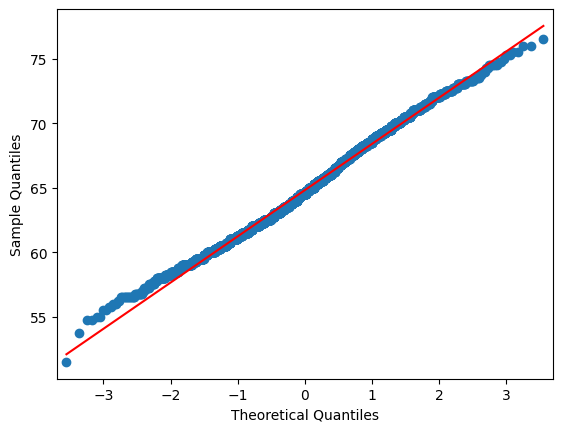

In [637]:
# 'Height' QQ plot
qqplot(pd.array(Height_clean), line='s')
plt.show()

In [639]:
# Remove nan values for the 'Weight' numeric variable.
Weight_list = HEART_df['Weight'].values.tolist()
Weight_clean = [item for item in Weight_list if not(pd.isnull(item)) == True]

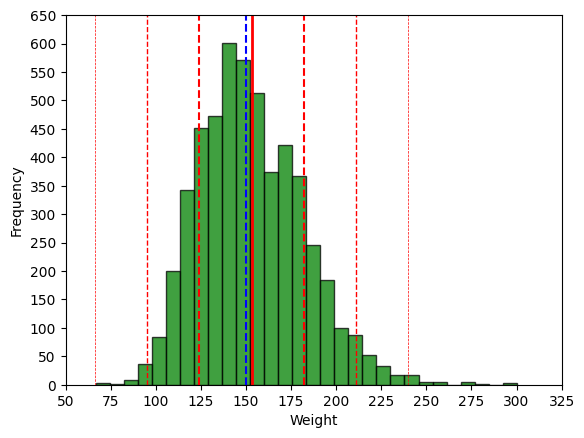

In [643]:
# Histogram for the 'Weight' numerical variable.
plt.hist(Weight_clean, bins = 30, alpha = 0.75, color = 'green', edgecolor = 'black')
plt.xlabel('Weight')
plt.ylabel('Frequency')
plt.xticks(np.arange(50,326,step=25))
plt.yticks(np.arange(0,651,step=50))

mean_value = statistics.mean(Weight_clean)
median_value = statistics.median(Weight_clean)
std_value = statistics.stdev(Weight_clean)

plt.axvline(mean_value, color='red', linewidth=2, label=f'Mean: {mean_value: .2f}')
plt.axvline(median_value, color='blue', linestyle='dashed', linewidth=1.5, label=f'Median: {median_value: .2f}')
plt.axvline(mean_value+std_value, color='red', linestyle='dashed', linewidth=1.5, label=f'1 SD')
plt.axvline(mean_value-std_value, color='red', linestyle='dashed', linewidth=1.5)
plt.axvline(mean_value+2*std_value, color='red', linestyle='dashed', linewidth=1, label=f'2 SD')
plt.axvline(mean_value-2*std_value, color='red', linestyle='dashed', linewidth=1)
plt.axvline(mean_value+3*std_value, color='red', linestyle='dashed', linewidth=0.5, label=f'3 SD')
plt.axvline(mean_value-3*std_value, color='red', linestyle='dashed', linewidth=0.5)

plt.show()

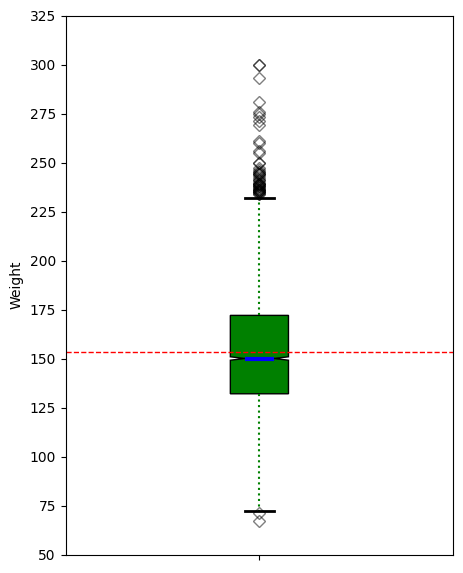

In [645]:
# Boxplot for the 'Weight' numeric variable.
fig = plt.figure(figsize =(5, 7))
ax = fig.add_subplot(111)

# Creating axes instance.
bp = ax.boxplot(Weight_clean, patch_artist = True,
                notch ='True')

for patch, color in zip(bp['boxes'], 'green'):
    patch.set_facecolor('green')

# Changing color and linewidth of whiskers.
for whisker in bp['whiskers']:
    whisker.set(color ='green',
                linewidth = 1.5,
                linestyle =":")

# Changing color and linewidth of caps.
for cap in bp['caps']:
    cap.set(color ='black',
            linewidth = 2)

# Changing color and linewidth of median.
for median in bp['medians']:
    median.set(color ='blue',
               linewidth = 3)
    
# Changing style of fliers.
for flier in bp['fliers']:
    flier.set(marker ='D',
              alpha = 0.5)
    
# Set axis labels.
ax.set_ylabel('Weight')  
ax.set_xticklabels('')

# Set axis limits.
plt.yticks(np.arange(50,326,step=25)) 

# Display the mean.
plt.axhline(mean_value, color='red', linewidth=1, linestyle='dashed', label=f'Mean: {mean_value: .2f}')

plt.show()

In [646]:
# 'Weight' Anderson-Darling Normality Test
result = anderson(Weight_clean)
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < result.critical_values[i]:
		print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
	else:
		print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 18.505
15.000: 0.576, data does not look normal (reject H0)
10.000: 0.655, data does not look normal (reject H0)
5.000: 0.786, data does not look normal (reject H0)
2.500: 0.917, data does not look normal (reject H0)
1.000: 1.091, data does not look normal (reject H0)


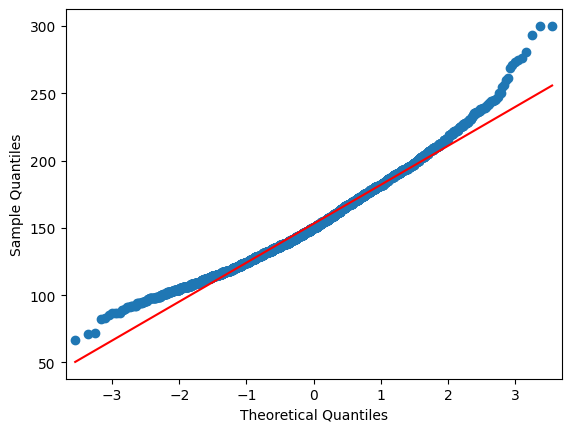

In [647]:
# 'Weight' QQ plot
qqplot(pd.array(Weight_clean), line='s')
plt.show()

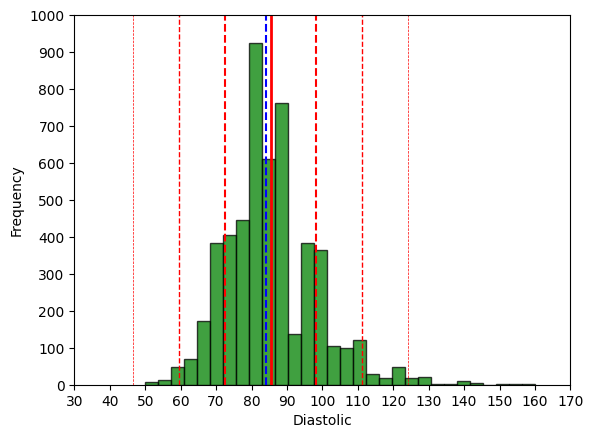

In [649]:
# Histogram for the 'Diastolic' numerical variable.
plt.hist(HEART_df['Diastolic'], bins = 30, alpha = 0.75, color = 'green', edgecolor = 'black')
plt.xlabel('Diastolic')
plt.ylabel('Frequency')
plt.xticks(np.arange(30,171,step=10))
plt.yticks(np.arange(0,1001,step=100))

mean_value = HEART_df['Diastolic'].mean()
median_value = HEART_df['Diastolic'].median()
std_value = HEART_df['Diastolic'].std()

plt.axvline(mean_value, color='red', linewidth=2, label=f'Mean: {mean_value: .2f}')
plt.axvline(median_value, color='blue', linestyle='dashed', linewidth=1.5, label=f'Median: {median_value: .2f}')
plt.axvline(mean_value+std_value, color='red', linestyle='dashed', linewidth=1.5, label=f'1 SD')
plt.axvline(mean_value-std_value, color='red', linestyle='dashed', linewidth=1.5)
plt.axvline(mean_value+2*std_value, color='red', linestyle='dashed', linewidth=1, label=f'2 SD')
plt.axvline(mean_value-2*std_value, color='red', linestyle='dashed', linewidth=1)
plt.axvline(mean_value+3*std_value, color='red', linestyle='dashed', linewidth=0.5, label=f'3 SD')
plt.axvline(mean_value-3*std_value, color='red', linestyle='dashed', linewidth=0.5)

plt.show()

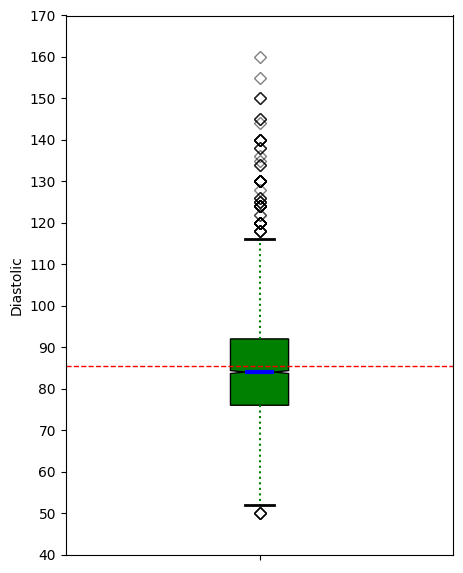

In [650]:
# Boxplot for the 'Diastolic' numeric variable.
fig = plt.figure(figsize =(5, 7))
ax = fig.add_subplot(111)

# Creating axes instance.
bp = ax.boxplot(HEART_df['Diastolic'], patch_artist = True,
                notch ='True')

for patch, color in zip(bp['boxes'], 'green'):
    patch.set_facecolor('green')

# Changing color and linewidth of whiskers.
for whisker in bp['whiskers']:
    whisker.set(color ='green',
                linewidth = 1.5,
                linestyle =":")

# Changing color and linewidth of caps.
for cap in bp['caps']:
    cap.set(color ='black',
            linewidth = 2)

# Changing color and linewidth of median.
for median in bp['medians']:
    median.set(color ='blue',
               linewidth = 3)
    
# Changing style of fliers.
for flier in bp['fliers']:
    flier.set(marker ='D',
              alpha = 0.5)
    
# Set axis labels.
ax.set_ylabel('Diastolic')  
ax.set_xticklabels('')

# Set axis limits.
plt.yticks(np.arange(40,171,step=10)) 

# Display the mean.
plt.axhline(mean_value, color='red', linewidth=1, linestyle='dashed', label=f'Mean: {mean_value: .2f}')

plt.show()

In [651]:
# 'Diastolic' Anderson-Darling Normality Test
result = anderson(HEART_df['Diastolic'])
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < result.critical_values[i]:
		print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
	else:
		print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 45.557
15.000: 0.576, data does not look normal (reject H0)
10.000: 0.655, data does not look normal (reject H0)
5.000: 0.786, data does not look normal (reject H0)
2.500: 0.917, data does not look normal (reject H0)
1.000: 1.091, data does not look normal (reject H0)


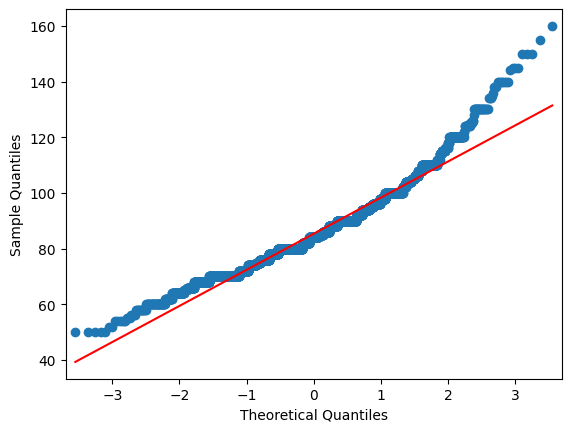

In [652]:
# 'Diastolic' QQ plot
qqplot(HEART_df['Diastolic'], line='s')
plt.show()

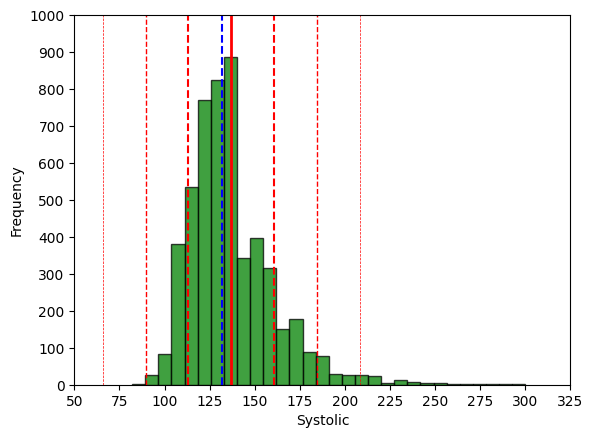

In [654]:
# Histogram for the 'Systolic' numerical variable.
plt.hist(HEART_df['Systolic'], bins = 30, alpha = 0.75, color = 'green', edgecolor = 'black')
plt.xlabel('Systolic')
plt.ylabel('Frequency')
plt.xticks(np.arange(50,326,step=25))
plt.yticks(np.arange(0,1001,step=100))

mean_value = HEART_df['Systolic'].mean()
median_value = HEART_df['Systolic'].median()
std_value = HEART_df['Systolic'].std()

plt.axvline(mean_value, color='red', linewidth=2, label=f'Mean: {mean_value: .2f}')
plt.axvline(median_value, color='blue', linestyle='dashed', linewidth=1.5, label=f'Median: {median_value: .2f}')
plt.axvline(mean_value+std_value, color='red', linestyle='dashed', linewidth=1.5, label=f'1 SD')
plt.axvline(mean_value-std_value, color='red', linestyle='dashed', linewidth=1.5)
plt.axvline(mean_value+2*std_value, color='red', linestyle='dashed', linewidth=1, label=f'2 SD')
plt.axvline(mean_value-2*std_value, color='red', linestyle='dashed', linewidth=1)
plt.axvline(mean_value+3*std_value, color='red', linestyle='dashed', linewidth=0.5, label=f'3 SD')
plt.axvline(mean_value-3*std_value, color='red', linestyle='dashed', linewidth=0.5)

plt.show()

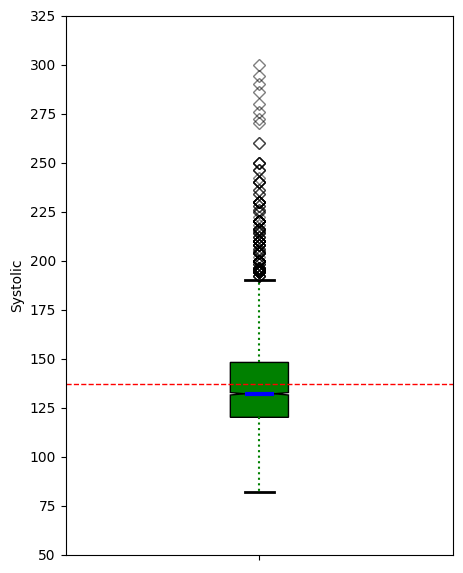

In [655]:
# Boxplot for the 'Systolic' numeric variable.
fig = plt.figure(figsize =(5, 7))
ax = fig.add_subplot(111)

# Creating axes instance.
bp = ax.boxplot(HEART_df['Systolic'], patch_artist = True,
                notch ='True')

for patch, color in zip(bp['boxes'], 'green'):
    patch.set_facecolor('green')

# Changing color and linewidth of whiskers.
for whisker in bp['whiskers']:
    whisker.set(color ='green',
                linewidth = 1.5,
                linestyle =":")

# Changing color and linewidth of caps.
for cap in bp['caps']:
    cap.set(color ='black',
            linewidth = 2)

# Changing color and linewidth of median.
for median in bp['medians']:
    median.set(color ='blue',
               linewidth = 3)
    
# Changing style of fliers.
for flier in bp['fliers']:
    flier.set(marker ='D',
              alpha = 0.5)
    
# Set axis labels.
ax.set_ylabel('Systolic')  
ax.set_xticklabels('')

# Set axis limits.
plt.yticks(np.arange(50,326,step=25)) 

# Display the mean.
plt.axhline(mean_value, color='red', linewidth=1, linestyle='dashed', label=f'Mean: {mean_value: .2f}')

plt.show()

In [656]:
# 'Systolic' Anderson-Darling Normality Test
result = anderson(HEART_df['Systolic'])
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < result.critical_values[i]:
		print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
	else:
		print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 93.897
15.000: 0.576, data does not look normal (reject H0)
10.000: 0.655, data does not look normal (reject H0)
5.000: 0.786, data does not look normal (reject H0)
2.500: 0.917, data does not look normal (reject H0)
1.000: 1.091, data does not look normal (reject H0)


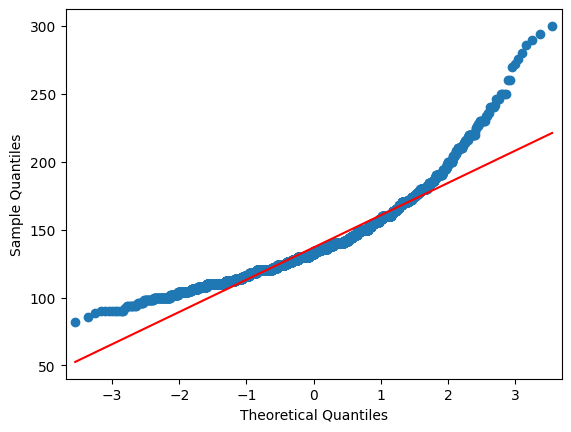

In [657]:
# 'Systolic' QQ plot
qqplot(HEART_df['Systolic'], line='s')
plt.show()

In [659]:
# Remove nan values for the 'MRW' numeric variable.
MRW_list = HEART_df['MRW'].values.tolist()
MRW_clean = [item for item in MRW_list if not(pd.isnull(item)) == True]

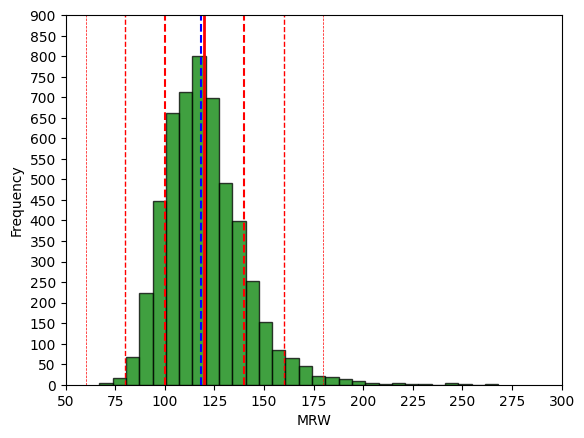

In [661]:
# Histogram for the 'MRW' numerical variable.
plt.hist(MRW_clean, bins = 30, alpha = 0.75, color = 'green', edgecolor = 'black')
plt.xlabel('MRW')
plt.ylabel('Frequency')
plt.xticks(np.arange(50,301,step=25))
plt.yticks(np.arange(0,901,step=50))

mean_value = statistics.mean(MRW_clean)
median_value = statistics.median(MRW_clean)
std_value = statistics.stdev(MRW_clean)

plt.axvline(mean_value, color='red', linewidth=2, label=f'Mean: {mean_value: .2f}')
plt.axvline(median_value, color='blue', linestyle='dashed', linewidth=1.5, label=f'Median: {median_value: .2f}')
plt.axvline(mean_value+std_value, color='red', linestyle='dashed', linewidth=1.5, label=f'1 SD')
plt.axvline(mean_value-std_value, color='red', linestyle='dashed', linewidth=1.5)
plt.axvline(mean_value+2*std_value, color='red', linestyle='dashed', linewidth=1, label=f'2 SD')
plt.axvline(mean_value-2*std_value, color='red', linestyle='dashed', linewidth=1)
plt.axvline(mean_value+3*std_value, color='red', linestyle='dashed', linewidth=0.5, label=f'3 SD')
plt.axvline(mean_value-3*std_value, color='red', linestyle='dashed', linewidth=0.5)

plt.show()

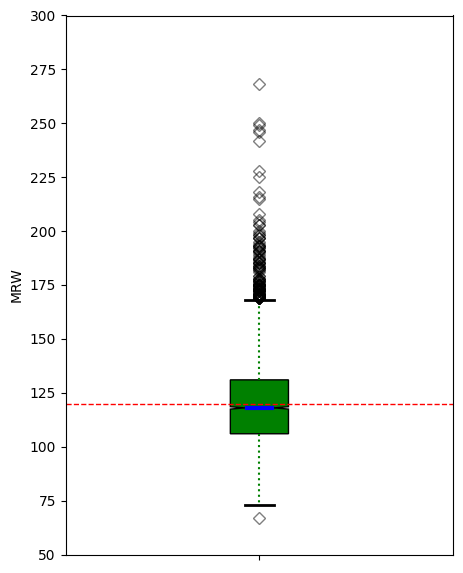

In [662]:
# Boxplot for the 'MRW' numeric variable.
fig = plt.figure(figsize =(5, 7))
ax = fig.add_subplot(111)

# Creating axes instance.
bp = ax.boxplot(MRW_clean, patch_artist = True,
                notch ='True')

for patch, color in zip(bp['boxes'], 'green'):
    patch.set_facecolor('green')

# Changing color and linewidth of whiskers.
for whisker in bp['whiskers']:
    whisker.set(color ='green',
                linewidth = 1.5,
                linestyle =":")

# Changing color and linewidth of caps.
for cap in bp['caps']:
    cap.set(color ='black',
            linewidth = 2)

# Changing color and linewidth of median.
for median in bp['medians']:
    median.set(color ='blue',
               linewidth = 3)
    
# Changing style of fliers.
for flier in bp['fliers']:
    flier.set(marker ='D',
              alpha = 0.5)
    
# Set axis labels.
ax.set_ylabel('MRW')  
ax.set_xticklabels('')

# Set axis limits.
plt.yticks(np.arange(50,301,step=25)) 

# Display the mean.
plt.axhline(mean_value, color='red', linewidth=1, linestyle='dashed', label=f'Mean: {mean_value: .2f}')

plt.show()

In [663]:
# 'MRW' Anderson-Darling Normality Test
result = anderson(MRW_clean)
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < result.critical_values[i]:
		print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
	else:
		print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 41.226
15.000: 0.576, data does not look normal (reject H0)
10.000: 0.655, data does not look normal (reject H0)
5.000: 0.786, data does not look normal (reject H0)
2.500: 0.917, data does not look normal (reject H0)
1.000: 1.091, data does not look normal (reject H0)


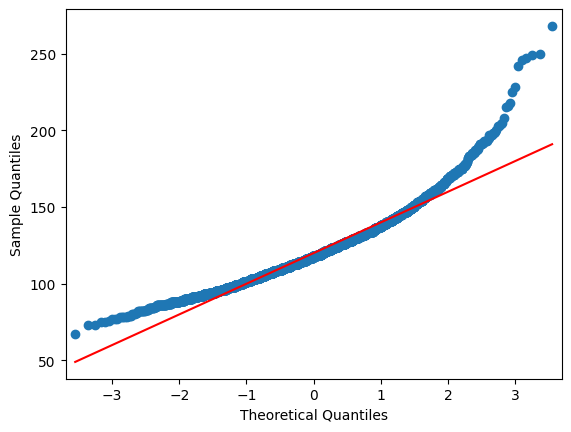

In [664]:
# 'MRW' QQ plot
qqplot(pd.array(MRW_clean), line='s')
plt.show()

In [666]:
# Remove nan values for the 'Smoking' numeric variable.
Smoking_list = HEART_df['Smoking'].values.tolist()
Smoking_clean = [item for item in Smoking_list if not(pd.isnull(item)) == True]

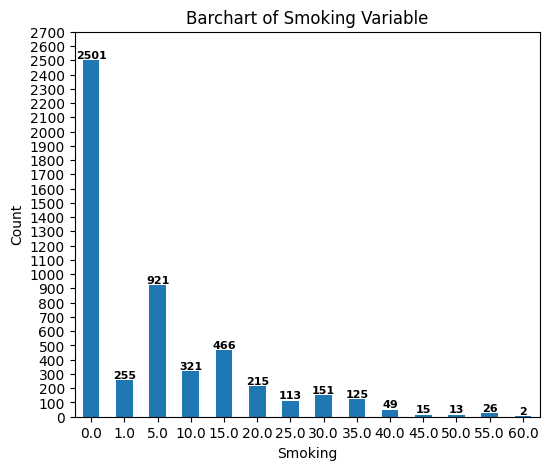

In [670]:
# Barchart for the 'Smoking' numeric variable.
dfg = pd.array(Smoking_clean).value_counts()
ax = dfg.plot(kind='bar', title='Barchart of Smoking Variable', ylabel='Count', xlabel='Smoking', rot=0, figsize=(6,5))
ax.bar_label(ax.containers[0], label_type='edge', color='black', fontsize=8, fontweight='bold')
plt.yticks(np.arange(0,2701,step=100))
Smoking_unique = list(set(Smoking_clean))
Smoking_sort = sorted(Smoking_unique, reverse=False)
ax.set_xticklabels(Smoking_sort)

mean_value = statistics.mean(Smoking_clean)

plt.show()

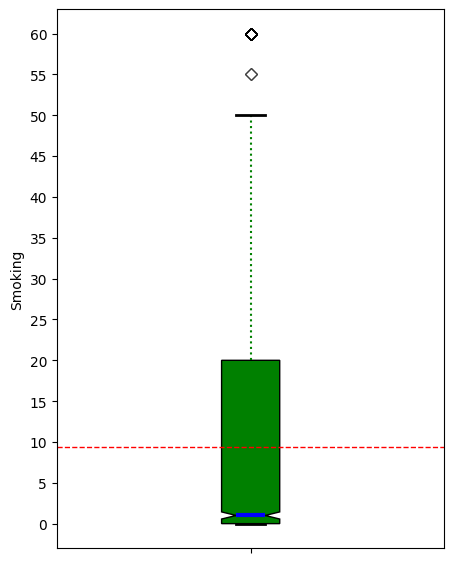

In [671]:
# Boxplot for the 'Smoking' numeric variable.
fig = plt.figure(figsize =(5, 7))
ax = fig.add_subplot(111)

# Creating axes instance.
bp = ax.boxplot(Smoking_clean, patch_artist = True,
                notch ='True')

for patch, color in zip(bp['boxes'], 'green'):
    patch.set_facecolor('green')

# Changing color and linewidth of whiskers.
for whisker in bp['whiskers']:
    whisker.set(color ='green',
                linewidth = 1.5,
                linestyle =":")

# Changing color and linewidth of caps.
for cap in bp['caps']:
    cap.set(color ='black',
            linewidth = 2)

# Changing color and linewidth of median.
for median in bp['medians']:
    median.set(color ='blue',
               linewidth = 3)
    
# Changing style of fliers.
for flier in bp['fliers']:
    flier.set(marker ='D',
              alpha = 0.5)
    
# Set axis labels.
ax.set_ylabel('Smoking')  
ax.set_xticklabels('')

# Set axis limits.
plt.yticks(np.arange(0,61,step=5))

# Display the mean.
plt.axhline(mean_value, color='red', linewidth=1, linestyle='dashed', label=f'Mean: {mean_value: .2f}')

plt.show()

In [673]:
# Remove nan values for the 'AgeAtDeath' numeric variable.
AgeAtDeath_list = HEART_df['AgeAtDeath'].values.tolist()
AgeAtDeath_clean = [item for item in AgeAtDeath_list if not(pd.isnull(item)) == True]

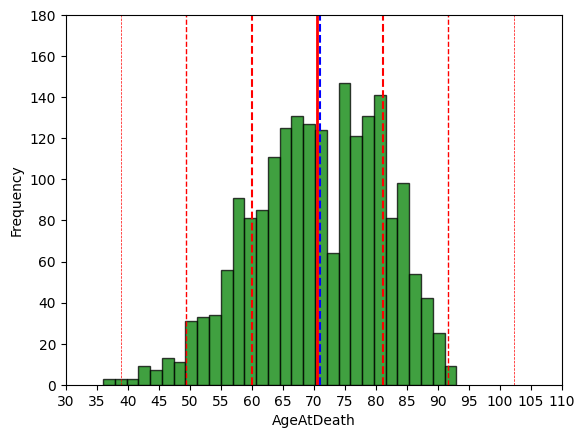

In [674]:
# Histogram for the 'AgeAtDeath' numerical variable.
plt.hist(AgeAtDeath_clean, bins = 30, alpha = 0.75, color = 'green', edgecolor = 'black')
plt.xlabel('AgeAtDeath')
plt.ylabel('Frequency')
plt.xticks(np.arange(30,111,step=5))
plt.yticks(np.arange(0,181,step=20))

mean_value = statistics.mean(AgeAtDeath_clean)
median_value = statistics.median(AgeAtDeath_clean)
std_value = statistics.stdev(AgeAtDeath_clean)

plt.axvline(mean_value, color='red', linewidth=2, label=f'Mean: {mean_value: .2f}')
plt.axvline(median_value, color='blue', linestyle='dashed', linewidth=1.5, label=f'Median: {median_value: .2f}')
plt.axvline(mean_value+std_value, color='red', linestyle='dashed', linewidth=1.5, label=f'1 SD')
plt.axvline(mean_value-std_value, color='red', linestyle='dashed', linewidth=1.5)
plt.axvline(mean_value+2*std_value, color='red', linestyle='dashed', linewidth=1, label=f'2 SD')
plt.axvline(mean_value-2*std_value, color='red', linestyle='dashed', linewidth=1)
plt.axvline(mean_value+3*std_value, color='red', linestyle='dashed', linewidth=0.5, label=f'3 SD')
plt.axvline(mean_value-3*std_value, color='red', linestyle='dashed', linewidth=0.5)

plt.show()

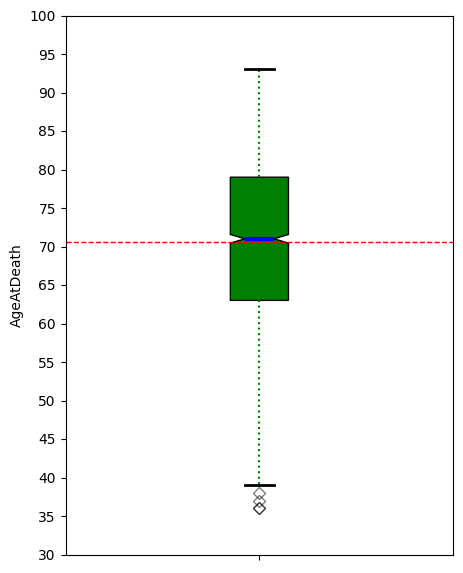

In [675]:
# Boxplot for the 'AgeAtDeath' numeric variable.
fig = plt.figure(figsize =(5, 7))
ax = fig.add_subplot(111)

# Creating axes instance.
bp = ax.boxplot(AgeAtDeath_clean, patch_artist = True,
                notch ='True')

for patch, color in zip(bp['boxes'], 'green'):
    patch.set_facecolor('green')

# Changing color and linewidth of whiskers.
for whisker in bp['whiskers']:
    whisker.set(color ='green',
                linewidth = 1.5,
                linestyle =":")

# Changing color and linewidth of caps.
for cap in bp['caps']:
    cap.set(color ='black',
            linewidth = 2)

# Changing color and linewidth of median.
for median in bp['medians']:
    median.set(color ='blue',
               linewidth = 3)
    
# Changing style of fliers.
for flier in bp['fliers']:
    flier.set(marker ='D',
              alpha = 0.5)
    
# Set axis labels.
ax.set_ylabel('AgeAtDeath')  
ax.set_xticklabels('')

# Set axis limits.
plt.yticks(np.arange(30,101,step=5))

# Display the mean.
plt.axhline(mean_value, color='red', linewidth=1, linestyle='dashed', label=f'Mean: {mean_value: .2f}')

plt.show()

In [676]:
# 'AgeAtDeath' Anderson-Darling Normality Test
result = anderson(AgeAtDeath_clean)
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < result.critical_values[i]:
		print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
	else:
		print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 6.149
15.000: 0.575, data does not look normal (reject H0)
10.000: 0.655, data does not look normal (reject H0)
5.000: 0.785, data does not look normal (reject H0)
2.500: 0.916, data does not look normal (reject H0)
1.000: 1.090, data does not look normal (reject H0)


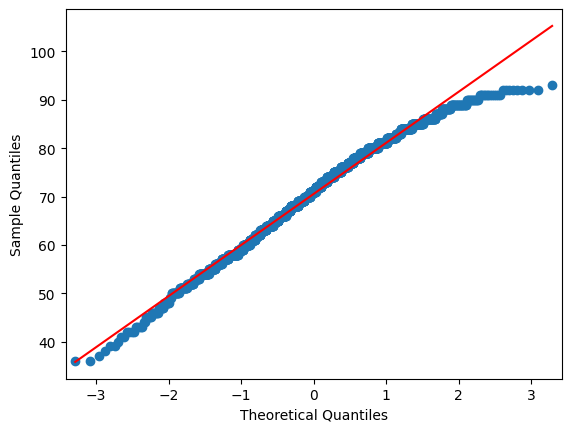

In [677]:
# 'AgeAtDeath' QQ plot
qqplot(pd.array(AgeAtDeath_clean), line='s')
plt.show()

In [679]:
# Remove nan values for the 'Cholesterol' numeric variable.
Cholesterol_list = HEART_df['Cholesterol'].values.tolist()
Cholesterol_clean = [item for item in Cholesterol_list if not(pd.isnull(item)) == True]

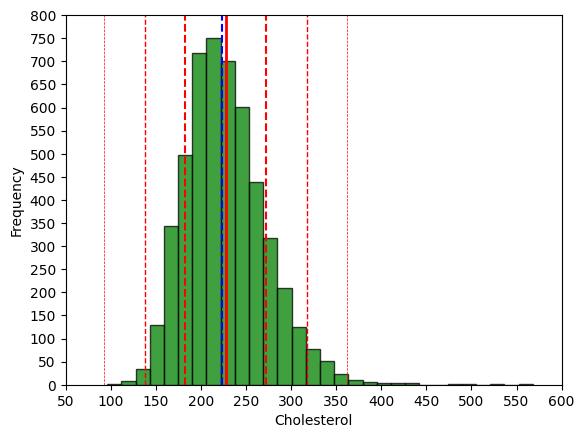

In [680]:
# Histogram for the 'Cholesterol' numerical variable.
plt.hist(Cholesterol_clean, bins = 30, alpha = 0.75, color = 'green', edgecolor = 'black')
plt.xlabel('Cholesterol')
plt.ylabel('Frequency')
plt.xticks(np.arange(50,601,step=50))
plt.yticks(np.arange(0,801,step=50))

mean_value = statistics.mean(Cholesterol_clean)
median_value = statistics.median(Cholesterol_clean)
std_value = statistics.stdev(Cholesterol_clean)

plt.axvline(mean_value, color='red', linewidth=2, label=f'Mean: {mean_value: .2f}')
plt.axvline(median_value, color='blue', linestyle='dashed', linewidth=1.5, label=f'Median: {median_value: .2f}')
plt.axvline(mean_value+std_value, color='red', linestyle='dashed', linewidth=1.5, label=f'1 SD')
plt.axvline(mean_value-std_value, color='red', linestyle='dashed', linewidth=1.5)
plt.axvline(mean_value+2*std_value, color='red', linestyle='dashed', linewidth=1, label=f'2 SD')
plt.axvline(mean_value-2*std_value, color='red', linestyle='dashed', linewidth=1)
plt.axvline(mean_value+3*std_value, color='red', linestyle='dashed', linewidth=0.5, label=f'3 SD')
plt.axvline(mean_value-3*std_value, color='red', linestyle='dashed', linewidth=0.5)

plt.show()

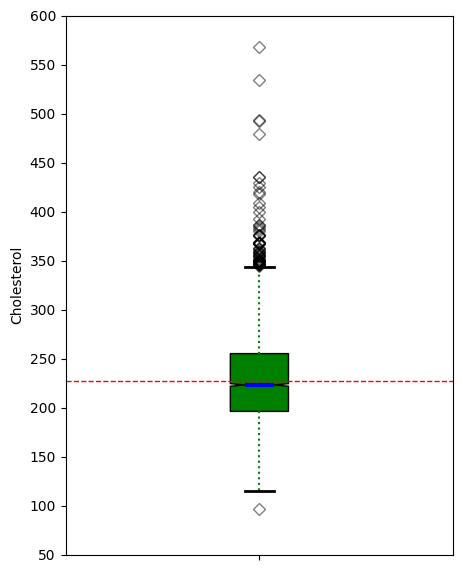

In [681]:
# Boxplot for the 'Cholesterol' numeric variable.
fig = plt.figure(figsize =(5, 7))
ax = fig.add_subplot(111)

# Creating axes instance.
bp = ax.boxplot(Cholesterol_clean, patch_artist = True,
                notch ='True')

for patch, color in zip(bp['boxes'], 'green'):
    patch.set_facecolor('green')

# Changing color and linewidth of whiskers.
for whisker in bp['whiskers']:
    whisker.set(color ='green',
                linewidth = 1.5,
                linestyle =":")

# Changing color and linewidth of caps.
for cap in bp['caps']:
    cap.set(color ='black',
            linewidth = 2)

# Changing color and linewidth of median.
for median in bp['medians']:
    median.set(color ='blue',
               linewidth = 3)
    
# Changing style of fliers.
for flier in bp['fliers']:
    flier.set(marker ='D',
              alpha = 0.5)
    
# Set axis labels.
ax.set_ylabel('Cholesterol')  
ax.set_xticklabels('')

# Set axis limits.
plt.yticks(np.arange(50,601,step=50))

# Display the mean.
plt.axhline(mean_value, color='red', linewidth=1, linestyle='dashed', label=f'Mean: {mean_value: .2f}')

plt.show()

In [682]:
# 'Cholesterol' Anderson-Darling Normality Test
result = anderson(Cholesterol_clean)
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < result.critical_values[i]:
		print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
	else:
		print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 22.508
15.000: 0.576, data does not look normal (reject H0)
10.000: 0.655, data does not look normal (reject H0)
5.000: 0.786, data does not look normal (reject H0)
2.500: 0.917, data does not look normal (reject H0)
1.000: 1.091, data does not look normal (reject H0)


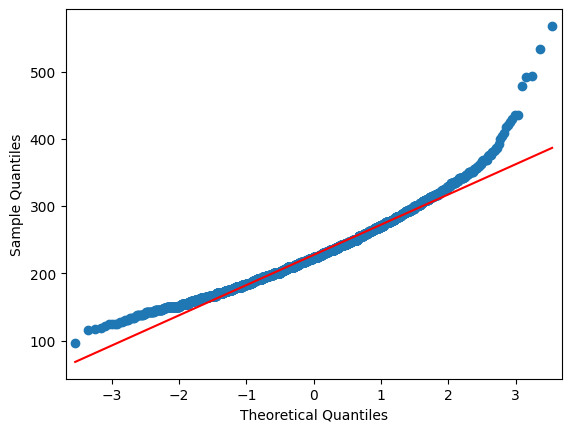

In [683]:
# 'Cholesterol' QQ plot
qqplot(pd.array(Cholesterol_clean), line='s')
plt.show()

In [684]:
# Create dataframe for correlation analysis.
HEART_corr = HEART_df[['AgeCHDdiag','AgeAtStart','Height', 'Weight', 'Diastolic','Systolic', 'MRW', 'Smoking', 'AgeAtDeath','Cholesterol']]

# View summary statistics for males.
HEART_corr.describe().map('{:,.2f}'.format)

AgeCHDdiag AgeAtStart    Height    Weight Diastolic  Systolic       MRW  \
count   1,449.00   5,209.00  5,203.00  5,203.00  5,209.00  5,209.00  5,203.00   
mean       63.30      44.07     64.81    153.09     85.36    136.91    119.96   
std        10.02       8.57      3.58     28.92     12.97     23.74     19.98   
min        32.00      28.00     51.50     67.00     50.00     82.00     67.00   
25%        57.00      37.00     62.25    132.00     76.00    120.00    106.00   
50%        63.00      43.00     64.50    150.00     84.00    132.00    118.00   
75%        70.00      51.00     67.50    172.00     92.00    148.00    131.00   
max        90.00      62.00     76.50    300.00    160.00    300.00    268.00   

        Smoking AgeAtDeath Cholesterol  
count  5,173.00   1,991.00    5,057.00  
mean       9.37      70.54      227.42  
std       12.03      10.56       44.94  
min        0.00      36.00       96.00  
25%        0.00      63.00      196.00  
50%        1.00      71.00      223.00  
75%       20.00      79.00      255.00  
max       60.00      93.00      568.00

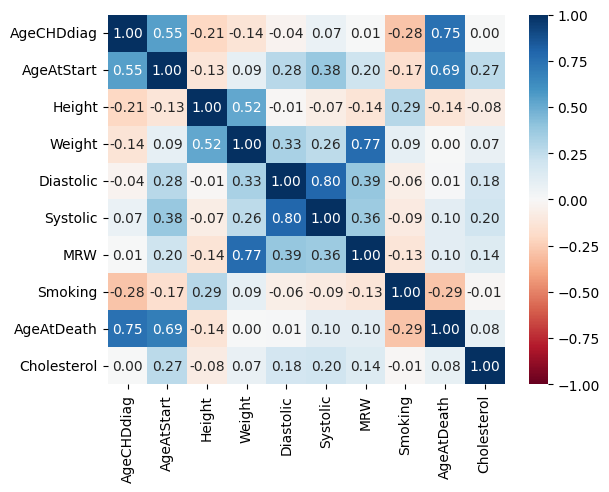

In [685]:
# Generate heatmap for correlation matrix analysis.
corr = HEART_corr.corr()
fig, ax = plt.subplots()
sns.heatmap(corr, annot=True, fmt=".2f", xticklabels=corr.columns, yticklabels=corr.columns, vmin=-1, vmax=1, cmap="RdBu", ax=ax)
plt.show()

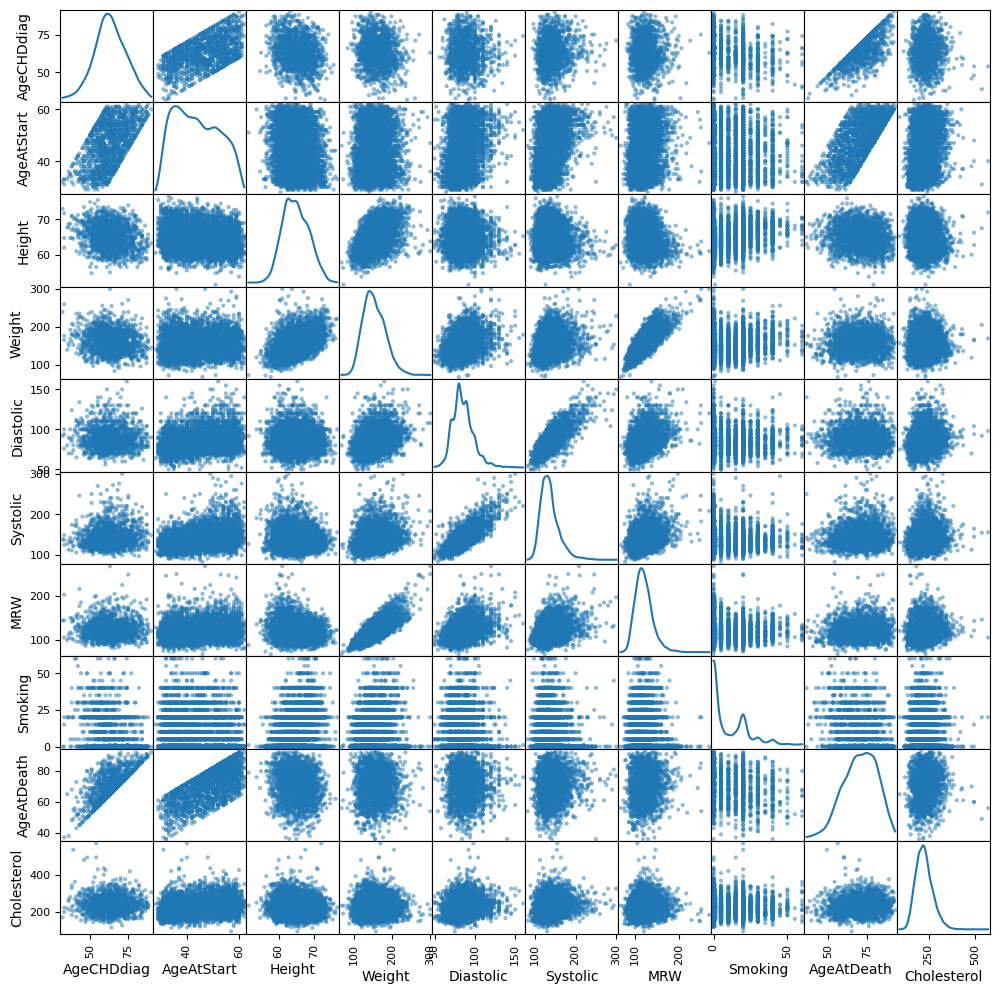

In [686]:
# Generate scatter plot matrix with correlation variables.
scatter_matrix(HEART_corr, diagonal="kde",figsize =(12, 12))
plt.show()

3. Use t-tests to accept or reject the statements listed below. State conclusions using the terminology of hypothesis testing. (25 points)
There is no difference in cholesterol between males and females. 
There is no difference in diastolic blood pressure between males and females. 

In [ ]:
# Create dataframe for t-test by removing reords with nan values in 'Cholesterol'.
HEART_trim = HEART_df
HEART_trim.dropna(subset = ['Cholesterol'], inplace=True)


(5057, 17)

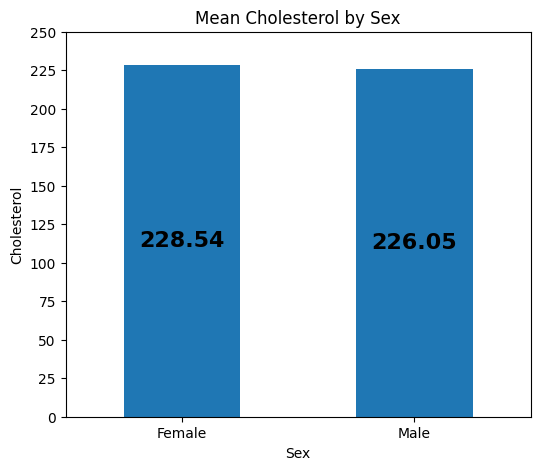

In [707]:
# Regarding there is no difference in cholesterol between males and females. 
# Barchart for the 'Sex' by mean 'Cholesterol'.
dfg = HEART_trim.groupby(['Sex'])['Cholesterol'].mean()
ax = dfg.plot(kind='bar', title='Mean Cholesterol by Sex', ylabel='Cholesterol', xlabel='Sex', rot=0, figsize=(6,5))
ax.bar_label(ax.containers[0], label_type='center', color='black', fontsize=16, fontweight='bold', fmt=lambda dfg: f'{dfg:.2f}')
plt.yticks(np.arange(0,251,step=25))
plt.show()

In [708]:
# Running a Two-Tailed Two-Sample T-Test in Python

# Define two independent samples.
class1_scores = HEART_trim.groupby("Sex").get_group("Female")['Cholesterol'].tolist()
 
class2_scores = HEART_trim.groupby("Sex").get_group("Male")['Cholesterol'].tolist()

# Perform two-sample t-test
t_statistic, p_value = ttest_ind(class1_scores, class2_scores)

# Output the results
print(f"t-statistic: {t_statistic:0,.3f}")
print(f"P-value: {p_value:0,.3f}")

t-statistic: 1.962
P-value: 0.050


Answer for 3.1: Because the above p-value is equal to the defined alpha 0f 0.05 (rejecting H0 the null hypothesis), and the t-statistic is positive, 
we can say the cholesterol for females (class 1) is higher with statistical significance than males (class 2).

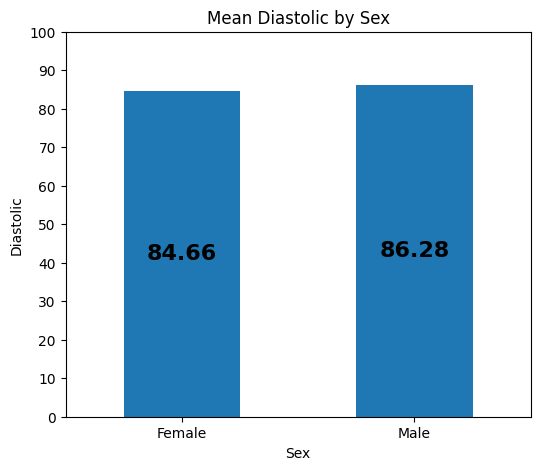

In [710]:
# Barchart for the 'Sex' by mean 'Diastolic'.
dfg = HEART_df.groupby(['Sex'])['Diastolic'].mean()
ax = dfg.plot(kind='bar', title='Mean Diastolic by Sex', ylabel='Diastolic', xlabel='Sex', rot=0, figsize=(6,5))
ax.bar_label(ax.containers[0], label_type='center', color='black', fontsize=16, fontweight='bold', fmt=lambda dfg: f'{dfg:.2f}')
plt.yticks(np.arange(0,101,step=10))
plt.show()

In [711]:
# Running a Two-Tailed Two-Sample T-Test in Python

# Define two independent samples.
class1_scores = HEART_df.groupby("Sex").get_group("Female")['Diastolic'].tolist()
 
class2_scores = HEART_df.groupby("Sex").get_group("Male")['Diastolic'].tolist()

# Perform two-sample t-test
t_statistic, p_value = ttest_ind(class1_scores, class2_scores)

# Output the results
print(f"t-statistic: {t_statistic:0,.3f}")
print(f"P-value: {p_value:0,.3f}")

t-statistic: -4.412
P-value: 0.000


Answer for 3.2: Because the above p-value is less than to the defined alpha 0f 0.05 (rejecting H0 the null hypothesis), and the t-statistic is negative, 
we can say the diastolic for males (class 2) is higher with statistical significance than females (class 1).

4. Create 2 simple linear regression models that predict cholesterol: (20 points)
For the first model, use a continuous variable that exhibits the best correlation with the dependent variable.
For the second model, use a continuous variable that exhibits the next best correlation with the dependent variable.

In [715]:
# Calculate the Total Sum of Squares (SST) for an empty model for Cholesterol.
Y = HEART_trim['Cholesterol'].tolist()
Y_mean = np.mean(Y)
sst = np.sum((Y - Y_mean) ** 2)
print(f"SST = {sst:0,.3f}")

SST = 10,209,081.782


C:\Users\rcc_0\AppData\Local\Temp\ipykernel_23088\2976847426.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Y = lm.params[0] + lm.params[1] * X


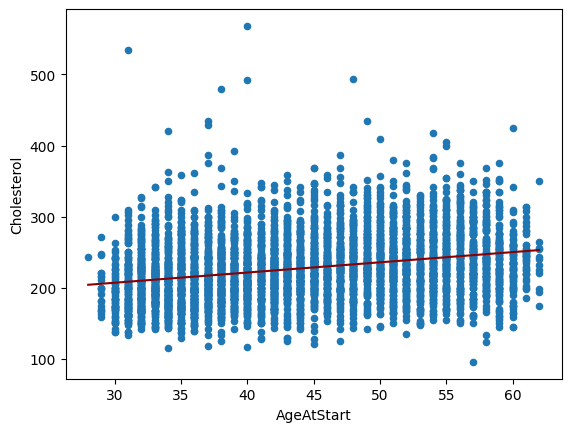

In [ ]:
# 4.1 For the first simple model, use a continuous variable that exhibits the best correlation with the dependent variable.
# Create requested simple model and scatterplot. Used 'Cholesterol' the outcome variable and 'AgeAtStart' as the explanatory variable.
HEART_trim.plot("AgeAtStart", "Cholesterol", kind="scatter")
lm = smf.ols("Cholesterol ~ AgeAtStart", data=HEART_trim).fit()
xmin = HEART_trim.AgeAtStart.min()
xmax = HEART_trim.AgeAtStart.max()
X = np.linspace(xmin, xmax, 100)
# params[0] is the intercept (beta₀) & params[1] is the slope (beta₁)
Y = lm.params[0] + lm.params[1] * X
plt.plot(X, Y, color="darkred")
plt.show()

In [717]:
# Generate OLS Regression results for the simple model.
print(lm.summary())
print('\n')
# Residual Sum of Squares
print(f"RSS = {lm.ssr:0,.3f}")
# Sum of Squares Error
print(f"SSE = {sst-lm.ssr:0,.3f}")

                            OLS Regression Results                            
Dep. Variable:            Cholesterol   R-squared:                       0.075
Model:                            OLS   Adj. R-squared:                  0.075
Method:                 Least Squares   F-statistic:                     408.4
Date:                Sun, 16 Feb 2025   Prob (F-statistic):           2.12e-87
Time:                        16:27:29   Log-Likelihood:                -26222.
No. Observations:                5057   AIC:                         5.245e+04
Df Residuals:                    5055   BIC:                         5.246e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    164.2427      3.185     51.575      0.0

4.1 Explain the tabular and graphical output that is produced. 

Of all of the numeric variables, AgeAtStart had the highest absolute correlation (0.27) with Cholesterol, so it made sense to choose it for the 
explanatory variable in the simple model.  In addition, neither variable passed normality tests, with AgeAtStart having potential multi-modality 
and kurtosis in its distribution.  Although, the fitted regression line in the graphical output seems to reasonably traverse through the data.  

The R-squared value of 0.075 indicates that 7.5% of the variation in the predicted Cholesterol values can be explained by AgeAtStart in this simple 
model.  The Y intercept, beta0, equals 164.2427 at 0 years of AgeAtStart, and the regression line slope, beta1, equals 1.4334 per 1 year of AgeAtStart.
The F-statistic of 408.4 easily exceeds any reasonable threshold.  The p-value is nearly zero and safely under the 0.05 alpha standard (rejecting H0 
the null hypothesis), indicating clearly that the relationship between Cholesterol and AgeAtStart is statistically significant.

C:\Users\rcc_0\AppData\Local\Temp\ipykernel_23088\1606254993.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Y = lm.params[0] + lm.params[1] * X


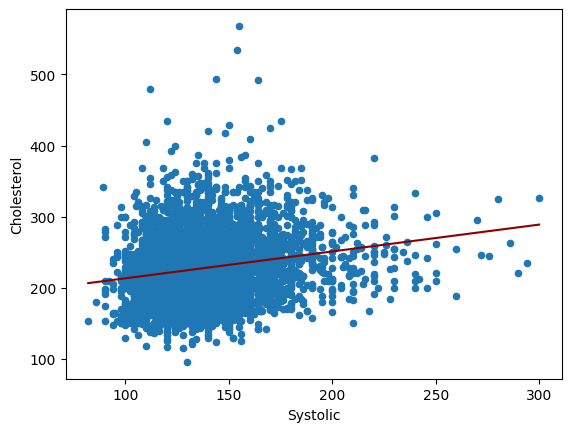

In [718]:
# 4.1 For the first simple model, use a continuous variable that exhibits the second best correlation with the dependent variable.
# Create requested simple model and scatterplot. Used 'Cholesterol' the outcome variable and 'Systolic' as the explanatory variable.
HEART_trim.plot("Systolic", "Cholesterol", kind="scatter")
lm = smf.ols("Cholesterol ~ Systolic", data=HEART_trim).fit()
xmin = HEART_trim.Systolic.min()
xmax = HEART_trim.Systolic.max()
X = np.linspace(xmin, xmax, 100)
# params[0] is the intercept (beta₀) & params[1] is the slope (beta₁)
Y = lm.params[0] + lm.params[1] * X
plt.plot(X, Y, color="darkred")
plt.show()

In [719]:
# Generate OLS Regression results for the simple model.
print(lm.summary())
print('\n')
# Residual Sum of Squares
print(f"RSS = {lm.ssr:0,.3f}")
# Sum of Squares Error
print(f"SSE = {sst-lm.ssr:0,.3f}")

                            OLS Regression Results                            
Dep. Variable:            Cholesterol   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     209.2
Date:                Sun, 16 Feb 2025   Prob (F-statistic):           1.72e-46
Time:                        17:13:39   Log-Likelihood:                -26316.
No. Observations:                5057   AIC:                         5.264e+04
Df Residuals:                    5055   BIC:                         5.265e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    175.7667      3.624     48.496      0.0

4.2 Explain the tabular and graphical output that is produced. 

As required, Systolic had the second highest absolute correlation (0.20) with Cholesterol, so it made sense to choose it for the explanatory variable 
in the simple model.  In addition, neither variable passed normality tests, but Cholesterol and Systolic shared a similarly right skewed distribution.
The fitted regression line in the graphical output seems to reasonably traverse through the data.  

The R-squared value of 0.040 indicates that 4% of the variation in the predicted Cholesterol values can be explained by Systolic in this simple 
model.  The Y intercept, beta0, equals 175.7667 at 0 value of Systolic, and the regression line slope, beta1, equals 0.3771 per 1 value of Systolic.
The F-statistic of 209.2 easily exceeds any reasonable threshold.  The p-value is nearly zero and safely under the 0.05 alpha standard (rejecting H0 
the null hypothesis), indicating clearly that the relationship between Cholesterol and Systolic is statistically significant.

4 Explain and support the difference between the models from the previous two steps.

The low R squared values, extremely low Log-Likelihood values, and very high AIC/BIC values indicate that neither of these simple models would be
a good predictor of cholesterol. Although, both AgeAtStart and Systolic demonstrated statistical significance with their p-values, t-values, and F 
statistics to Cholesterol, and could belong to MLR model that could explain more variation.  By way of comparison, AgeAtStart simple model explained 
about 88.1% more variation the Systolic simple model.  

When looking at the AgeAtStart distribution, there is probably a transformation that could be used to achieve normality, but I was not able to put
my finger on it.  Cholesterol had 152 missing values, so I chose to drop the records associated with them.  If AgeAtStart and/or Systolic had a 
significant correlation with Cholesterol, I would have tried impute the missing values based on one or both of them.  Will use the reduced dataframe
with the MLR model in Question 5, given that none of the continuous variables have a significant correlation with Cholesterol.

5. Create a multiple regression model that uses all of the continuous variables. (30 points)
Explain and support the results of the model.
Compare the performance of the multiple regression model with the best bilinear regression model from question 4 (the bilinear model). 

In [723]:
# Generate number of missing values.
HEART_trim.isna().sum()

Status               0
DeathCause        3135
AgeCHDdiag        3649
Sex                  0
AgeAtStart           0
Height               6
Weight               6
Diastolic            0
Systolic             0
MRW                  6
Smoking              8
AgeAtDeath        3135
Cholesterol          0
Chol_Status          0
BP_Status            0
Weight_Status        6
Smoking_Status       8
dtype: int64

Note:
Will remove AgeCHDdiag and AgeAtDeath from the MLR model, due to the extremely large number of missing values associated with each.
Will impute the missing values for Height, Weight, MRW, and Smoking with their respective median values.

In [724]:
# Performed necessary imputations.
HEART_trim.fillna(HEART_trim['Height'].median(), inplace=True)
HEART_trim.fillna(HEART_trim['Weight'].median(), inplace=True)
HEART_trim.fillna(HEART_trim['MRW'].median(), inplace=True)
HEART_trim.fillna(HEART_trim['Smoking'].median(), inplace=True)

In [725]:
# 5 A multiple regression model using Cholesterol and all of the designated continuous variables. 
lm = smf.ols(formula='Cholesterol ~ AgeAtStart + Height + Weight + Diastolic + Systolic + MRW + Smoking', data=HEART_trim).fit()
print(lm.params)

Intercept     289.593442
AgeAtStart      1.206918
Height         -2.506843
Weight          0.359344
Diastolic       0.249216
Systolic        0.073467
MRW            -0.341667
Smoking         0.186225
dtype: float64


In [726]:
# Generate OLS Regression results for the initial multiple linear regression model.
print(lm.summary())
print('\n', '='*20, '\n')
# Residual Sum of Squares
print(f"RSS = {lm.ssr:0,.3f}")
# Sum of Squares Error
print(f"SSE = {sst-lm.ssr:0,.3f}")

                            OLS Regression Results                            
Dep. Variable:            Cholesterol   R-squared:                       0.095
Model:                            OLS   Adj. R-squared:                  0.094
Method:                 Least Squares   F-statistic:                     75.72
Date:                Sun, 16 Feb 2025   Prob (F-statistic):          9.63e-105
Time:                        18:36:23   Log-Likelihood:                -26166.
No. Observations:                5057   AIC:                         5.235e+04
Df Residuals:                    5049   BIC:                         5.240e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    289.5934     53.077      5.456      0.0

In [730]:
# Generate the absolute critical t-statistic.
t_critical = abs(scipy.stats.t.ppf(q=.05/2,df=7))
print(f'{t_critical:.3f}')

2.365


4.2 Explain and support the results of the model.

The R-squared value of 0.095 indicates that 9.5% of the variation in the predicted Cholesterol values can be attributed to this multiple linear regression model.  The Y 
intercept, beta0, equals a 289.5934 base value.  AgeAtStart, beta1, equals 1.2069 per 1 year of AgeAtStart, Height, beta2, equals -2.5068 per 1 inch of Height, Weight, 
beta3, equals 0.03593 per 1 lbs of Weight, Diastolic, beta4, equals 0.2492 per 1 unit of Diastolic, Systolic, beta5, equals 0.0735 per 1 unit of Systolic, MRW, beta6,
equals -0.3417 per 1 unit of MRW, and Smoking, beta7, equals 0.1862 per 1 cigarette smoked per day.  The F-statistic of 75.72 exceeds any reasonable threshold.  Regarding 
AgeAtStart, Height, Weight, Diastolic, and Smoking, the p-value is less than the 0.05 alpha standard (rejecting H0 the null hypothesis), indicating clearly that the 
relationship between Cholesterol and those explanatory variables are statistically significant.  Regarding Systolic and MRW, the p-value is greater than the 0.05 alpha 
standard (accepting H0 the null hypothesis), indicating that the relationship between Cholesterol and those explanatory variables are not statistically significant.

MRW has a 0.77 correlation with Weight, and Systolic has a 0.80 correlation with Diastolic. Can easily see removing these two variables from the MLR model.  As I previously
stated, the AgeAtStart variable could use some type of transformation to achieve better normality, and possibly Diastolic as well.

Compare the performance of the multiple regression model with the best bilinear regression model from question 4 (the bilinear model). 

With Cholesterol having a SST of 10,209,081.782, the simple model using the AgeAtStart variable reduced it 763,185.8 to a SSR of 9,445,895.982, which amounts to an approximate 
7.5% reduction, the simple model using the Systolic variable reduced it 405,714.456 to a SSR of 9,803,367.326, which amounts to an approximate 4% reduction.  The multiple 
linear regression model using AgeAtStart, Height, Weight, Diastolic, Systolic, MRW, and Smoking variables reduced it 969,938.406 to a SSR of 9,239,143.375, which amounts to an 
approximate 9.5% reduction. Adding six more variables, or degrees of freedom, yielded only a 2% gain in reduction.  Could improve some, if the two heavily correlated variables 
are removed, and some variable transformations are sought.  A couple of the categorical variables could possibly be used, but I had trouble imagining where they would be any 
more informative than their numerical counterparts.  As with the simple models, the low R squared value, extremely low Log-Likelihood value, and very high AIC/BIC values are an 
indicator that this MLR model, and probably any MLR model from this dataset would not be a good predictor of cholesterol.